# Churn Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
#import shap
warnings.filterwarnings('ignore')
import os

## Load Data

In [2]:
sales2022 = pd.read_csv(os.path.join('data','jan_apr_2022.csv'))
sales2023_2024 = pd.read_csv(os.path.join('data','2022_2024.csv'))
item = pd.read_csv(os.path.join('data','item.csv'))
city = pd.read_csv(os.path.join('data','city.csv'))
customer = pd.read_csv(os.path.join('data','customer.csv'))
reward = pd.read_csv(os.path.join('data','reward.csv'))

In [3]:
sales2022.head()

Invoice No. Invoice Date  Quantity Unit      Amount   
0  38143 - 38144     28-01-22      12.0  LSN  270,000.00  \
1     44468 - 74     21-01-22       1.0  PAK  270,000.00   
2  38143 - 38144     28-01-22      12.0  LSN  840,000.00   
3  39599 - 39600     29-01-22       3.0  LSN  165,000.00   
4  40519 - 40536     22-01-22       3.0  LSN  165,000.00   

                         Item Description   Item No. Customer Code   
0                  ANTING BOLA 2 DOVE PJG   ATG-242C     SMS-00004  \
1  ANTING BULAT POLOS KAR 12 PSG (10 KAR)  ATG-249A1     JBA-00044   
2                  ANTING DAUN MATA JURAI   ATG-235B     SMS-00004   
3         ANTING JURAI BULAT KRISTAL MATA   ATG-247E     SMU-00011   
4         ANTING JURAI KUPU2 KRISTAL MATA   ATG-247D     JBA-00044   

  Customer Name  
0     TOKO RUDI  
1  CUCU FARIDAH  
2     TOKO RUDI  
3         SANNY  
4  CUCU FARIDAH

In [4]:
sales2023_2024.head()

Canceled Sales Employee Name  Document Number Posting Date  Due Date   
0        N              Farhan        220002380     13-05-22  27-05-22  \
1        N              Farhan        220002380     13-05-22  27-05-22   
2        N              Farhan        220002380     13-05-22  27-05-22   
3        N              Farhan        220002380     13-05-22  27-05-22   
4        N              Farhan        220002380     13-05-22  27-05-22   

  Group Name Customer/Vendor Code Customer/Vendor Name Payment Terms Code   
0        C11            JKT-00163               PLANET            14 Days  \
1        C11            JKT-00163               PLANET            14 Days   
2        C11            JKT-00163               PLANET            14 Days   
3        C11            JKT-00163               PLANET            14 Days   
4        C11            JKT-00163               PLANET            14 Days   

    Item No.              Item/Service Description  Quantity Unit   
0  SLM-2924C  SLIME TABUNG TUTUP BONEKA ( 12 PCS )      48.0  BOX  \
1  SLM-2922E       SLIME 3W BEAR STYROFOAM (6 PCS)      72.0  BOX   
2  SLM-2924E           SLIME W TUTUP BEBEK (6 PCS)      72.0  BOX   
3  SLM-2924D  SLIME GRADASI W LITTLE TIGER (12PCS)      48.0  BOX   
4  MMT-2581A                    PENUTUP MATA MOTIF     200.0  LSN   

  Price after Discount      Row Total  
0            75,000.00   3,600,000.00  
1            60,000.00   4,320,000.00  
2            55,000.00   3,960,000.00  
3            80,000.00   3,840,000.00  
4            55,000.00  11,000,000.00

In [5]:
item.head()

Item No.                Item Description In Stock Items per Purchasing Unit   
0     006b               BANDO BONEKA LINE        0                         1  \
1     038C         GIWANG BUNGA GLITER BOX        0                        25   
2   1105b1  BANDO BESI SET + LIDI + TIPTOP        0                       100   
3   134-55    BUBBLE ELEKTRIK KAMERA BUNNY        0                        60   
4   134-62     BUBBLE ELEKTRIK KAMERA DUCK        0                         1   

       Sub Item           Kategori Inventory UoM Active Default Warehouse  
0  BANDO BONEKA   AKSESORIS RAMBUT           LSN     No               NaN  
1        GIWANG          AKSESORIS           PAK     No               NaN  
2    BANDO BESI   AKSESORIS RAMBUT           LSN     No           WHK25-1  
3        MAINAN  AKSESORIES CAMPUR           PCS     No               NaN  
4        MAINAN  AKSESORIES CAMPUR           PCS     No               NaN

In [6]:
city.head()

BP Code Ship-to City Ship-to County Ship-to-Province
0  ACH-00001   BANDA ACEH           ACEH             ACEH
1  ACH-00002   BANDA ACEH           ACEH             ACEH
2  ACH-00003   BANDA ACEH           ACEH             ACEH
3  ACH-00004         ACEH            NaN             ACEH
4  ACH-00005         ACEH           ACEH             ACEH

In [7]:
customer.head()

BP Code               BP Name Shipping Type Group Code   BP Type Active   
0  ACH-00001          INDRA (ACEH)           KSI         C0  Customer    Yes  \
1  ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer    Yes   
2  ACH-00003                ZAZIRA    WIRA AGUNG         C4  Customer    Yes   
3  ACH-00004  TOKO BINTANG PERMATA           KSI          C  Customer    Yes   
4  ACH-00005                 IQBAL           KSI         C8  Customer    Yes   

  Payment Terms Code      Price List No.   Credit Limit Sales Employee Code   
0             0 Days  Harga Jual - Lusin           0.00     Shifa Anggraeni  \
1            14 Days  Harga Jual - Lusin  30,000,000.00        Opik Hidayat   
2             0 Days  Harga Jual - Lusin           0.00     Shifa Anggraeni   
3            14 Days  Harga Jual - Lusin  20,000,000.00            Saepudin   
4             0 Days  Harga Jual - Lusin           0.00                Dina   

  Creation Date Churn  Return Barang Total Return Barang  Potongan Penjualan   
0      03-05-22     Y              0                0.00                   0  \
1      03-05-22     N              1           51,000.00                   0   
2      03-05-22     N              1          330,000.00                   0   
3      03-05-22     N              0                0.00                   0   
4      03-05-22     N              0                0.00                   0   

  Total Potongan Penjualan  
0                     0.00  
1                     0.00  
2                     0.00  
3                     0.00  
4                     0.00

In [8]:
sales2022['Amount'] = sales2022['Amount'].str.replace(',', '').astype(float)
sales2023_2024['Price after Discount'] = sales2023_2024['Price after Discount'].str.replace(',', '').astype(float)
sales2023_2024['Row Total'] = sales2023_2024['Row Total'].str.replace(',', '').astype(float)
sales2023_2024['Posting Date'] = pd.to_datetime(sales2023_2024['Posting Date'], format='%d-%m-%y')
sales2023_2024['Due Date'] = pd.to_datetime(sales2023_2024['Due Date'], format='%d-%m-%y')

In [9]:
sales2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72505 entries, 0 to 72504
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Invoice No.       72505 non-null  object 
 1   Invoice Date      72505 non-null  object 
 2   Quantity          72505 non-null  float64
 3   Unit              72505 non-null  object 
 4   Amount            72505 non-null  float64
 5   Item Description  72505 non-null  object 
 6   Item No.          72505 non-null  object 
 7   Customer Code     72505 non-null  object 
 8   Customer Name     72505 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.0+ MB


In [10]:
sales2023_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642596 entries, 0 to 642595
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Canceled                  642596 non-null  object        
 1   Sales Employee Name       642596 non-null  object        
 2   Document Number           642596 non-null  int64         
 3   Posting Date              642596 non-null  datetime64[ns]
 4   Due Date                  642596 non-null  datetime64[ns]
 5   Group Name                642592 non-null  object        
 6   Customer/Vendor Code      642592 non-null  object        
 7   Customer/Vendor Name      642592 non-null  object        
 8   Payment Terms Code        642596 non-null  object        
 9   Item No.                  642218 non-null  object        
 10  Item/Service Description  642593 non-null  object        
 11  Quantity                  642596 non-null  float64       
 12  Un

In [11]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   BP Code                   1737 non-null   object
 1   BP Name                   1737 non-null   object
 2   Shipping Type             1431 non-null   object
 3   Group Code                1737 non-null   object
 4   BP Type                   1737 non-null   object
 5   Active                    1737 non-null   object
 6   Payment Terms Code        1737 non-null   object
 7   Price List No.            1737 non-null   object
 8   Credit Limit              1737 non-null   object
 9   Sales Employee Code       1737 non-null   object
 10  Creation Date             1737 non-null   object
 11  Churn                     1737 non-null   object
 12  Return Barang             1737 non-null   int64 
 13  Total Return Barang       1737 non-null   object
 14  Potongan Penjualan      

In [12]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17489 entries, 0 to 17488
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item No.                   17489 non-null  object
 1   Item Description           17489 non-null  object
 2   In Stock                   17489 non-null  object
 3   Items per Purchasing Unit  17489 non-null  object
 4   Sub Item                   17475 non-null  object
 5   Kategori                   17475 non-null  object
 6   Inventory UoM              17477 non-null  object
 7   Active                     17489 non-null  object
 8   Default Warehouse          9679 non-null   object
dtypes: object(9)
memory usage: 1.2+ MB


In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BP Code           1737 non-null   object
 1   Ship-to City      1690 non-null   object
 2   Ship-to County    1387 non-null   object
 3   Ship-to-Province  1737 non-null   object
dtypes: object(4)
memory usage: 54.4+ KB


In [14]:
reward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BP Code         327 non-null    object
 1   reward_2022     327 non-null    int64 
 2   reward_2023_p1  327 non-null    int64 
 3   reward_2023_p2  327 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.3+ KB


In [15]:
customer['Credit Limit'] = customer['Credit Limit'].str.replace(',', '').astype(float)
customer['Total Return Barang'] = customer['Total Return Barang'].str.replace(',', '').astype(float)
customer['Total Potongan Penjualan'] = customer['Total Potongan Penjualan'].str.replace(',', '').astype(float)

In [16]:
sales2022.head()

Invoice No. Invoice Date  Quantity Unit    Amount   
0  38143 - 38144     28-01-22      12.0  LSN  270000.0  \
1     44468 - 74     21-01-22       1.0  PAK  270000.0   
2  38143 - 38144     28-01-22      12.0  LSN  840000.0   
3  39599 - 39600     29-01-22       3.0  LSN  165000.0   
4  40519 - 40536     22-01-22       3.0  LSN  165000.0   

                         Item Description   Item No. Customer Code   
0                  ANTING BOLA 2 DOVE PJG   ATG-242C     SMS-00004  \
1  ANTING BULAT POLOS KAR 12 PSG (10 KAR)  ATG-249A1     JBA-00044   
2                  ANTING DAUN MATA JURAI   ATG-235B     SMS-00004   
3         ANTING JURAI BULAT KRISTAL MATA   ATG-247E     SMU-00011   
4         ANTING JURAI KUPU2 KRISTAL MATA   ATG-247D     JBA-00044   

  Customer Name  
0     TOKO RUDI  
1  CUCU FARIDAH  
2     TOKO RUDI  
3         SANNY  
4  CUCU FARIDAH

In [17]:
agg_2022 = sales2022.groupby('Customer Code').agg({'Amount':'sum',
                                                   'Invoice No.':'nunique'}).reset_index()

agg_2022 = agg_2022.rename(columns={'Amount':'Amount 2022',
                                    'Invoice No.':'Total Transaction 2022'})

In [18]:
agg_rest = sales2023_2024.groupby('Customer/Vendor Code').agg({'Row Total':'sum',
                                                               'Document Number':'nunique'}).reset_index()

agg_rest = agg_rest.rename(columns={'Customer/Vendor Code':'Customer Code',
                         'Row Total':'Amount 2023',
                         'Document Number':'Total Transaction 2023'})

In [19]:
aggs = pd.merge(agg_rest, agg_2022, on='Customer Code', how='outer')

In [20]:
aggs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer Code           1561 non-null   object 
 1   Amount 2023             1490 non-null   float64
 2   Total Transaction 2023  1490 non-null   float64
 3   Amount 2022             516 non-null    float64
 4   Total Transaction 2022  516 non-null    float64
dtypes: float64(4), object(1)
memory usage: 61.1+ KB


In [21]:
sum_missing = aggs.isna().sum()
percent_missing = round(aggs.isnull().sum() * 100 / len(aggs),2)
missing_value_df = pd.DataFrame({'column_name': aggs.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

column_name  sum_missing  percent_missing
0           Customer Code            0             0.00
1             Amount 2023           71             4.55
2  Total Transaction 2023           71             4.55
3             Amount 2022         1045            66.94
4  Total Transaction 2022         1045            66.94

In [22]:
aggs.fillna(0, inplace=True)

In [23]:
aggs['Total Amount'] = aggs['Amount 2022'] + aggs['Amount 2023']

In [24]:
aggs.sample(10)

Customer Code   Amount 2023  Total Transaction 2023  Amount 2022   
457      JKT-00078  8.174200e+07                    83.0          0.0  \
63         B-00235  5.960000e+05                     3.0          0.0   
425      JKT-00045  4.550400e+07                    46.0          0.0   
1047     KBA-00058  8.530000e+06                     2.0          0.0   
483      JKT-00105  2.781286e+07                    98.0          0.0   
989      K02-00058  7.846050e+07                    14.0    1152000.0   
1352     SMU-00002  2.890042e+09                   516.0  797096224.0   
1100     KTH-00003  8.000200e+07                    10.0   44002000.0   
550      JKT-00178  2.624850e+07                    17.0          0.0   
321      JBA-00139  9.825000e+05                     2.0          0.0   

      Total Transaction 2022  Total Amount  
457                      0.0  8.174200e+07  
63                       0.0  5.960000e+05  
425                      0.0  4.550400e+07  
1047                     0.0  8.530000e+06  
483                      0.0  2.781286e+07  
989                      1.0  7.961250e+07  
1352                    99.0  3.687138e+09  
1100                     3.0  1.240040e+08  
550                      0.0  2.624850e+07  
321                      0.0  9.825000e+05

In [25]:
sales2022

Invoice No. Invoice Date  Quantity Unit    Amount   
0      38143 - 38144     28-01-22      12.0  LSN  270000.0  \
1         44468 - 74     21-01-22       1.0  PAK  270000.0   
2      38143 - 38144     28-01-22      12.0  LSN  840000.0   
3      39599 - 39600     29-01-22       3.0  LSN  165000.0   
4      40519 - 40536     22-01-22       3.0  LSN  165000.0   
...              ...          ...       ...  ...       ...   
72500          59467     30-04-22       1.0  PCS       0.0   
72501          59471     30-04-22       1.0  PCS       0.0   
72502          59472     30-04-22       1.0  PCS       0.0   
72503          59473     30-04-22       1.0  PCS       0.0   
72504  38561 - 38562     01-04-22       1.0  LSN   65000.0   

                             Item Description   Item No. Customer Code   
0                      ANTING BOLA 2 DOVE PJG   ATG-242C     SMS-00004  \
1      ANTING BULAT POLOS KAR 12 PSG (10 KAR)  ATG-249A1     JBA-00044   
2                      ANTING DAUN MATA JURAI   ATG-235B     SMS-00004   
3             ANTING JURAI BULAT KRISTAL MATA   ATG-247E     SMU-00011   
4             ANTING JURAI KUPU2 KRISTAL MATA   ATG-247D     JBA-00044   
...                                       ...        ...           ...   
72500                                  TUMBIR    PARCEL7     KSE-00022   
72501                                  TUMBIR    PARCEL7     SMB-00012   
72502                                  TUMBIR    PARCEL7     RIU-00010   
72503                                  TUMBIR    PARCEL7     JTH-00017   
72504                           ZODIAK PERAHU   CPR-018A     JBA-00020   

      Customer Name  
0         TOKO RUDI  
1      CUCU FARIDAH  
2         TOKO RUDI  
3             SANNY  
4      CUCU FARIDAH  
...             ...  
72500        H.ANAH  
72501    INDAH SARI  
72502         AMORA  
72503    CEMARA ACC  
72504      YOU & ME  

[72505 rows x 9 columns]

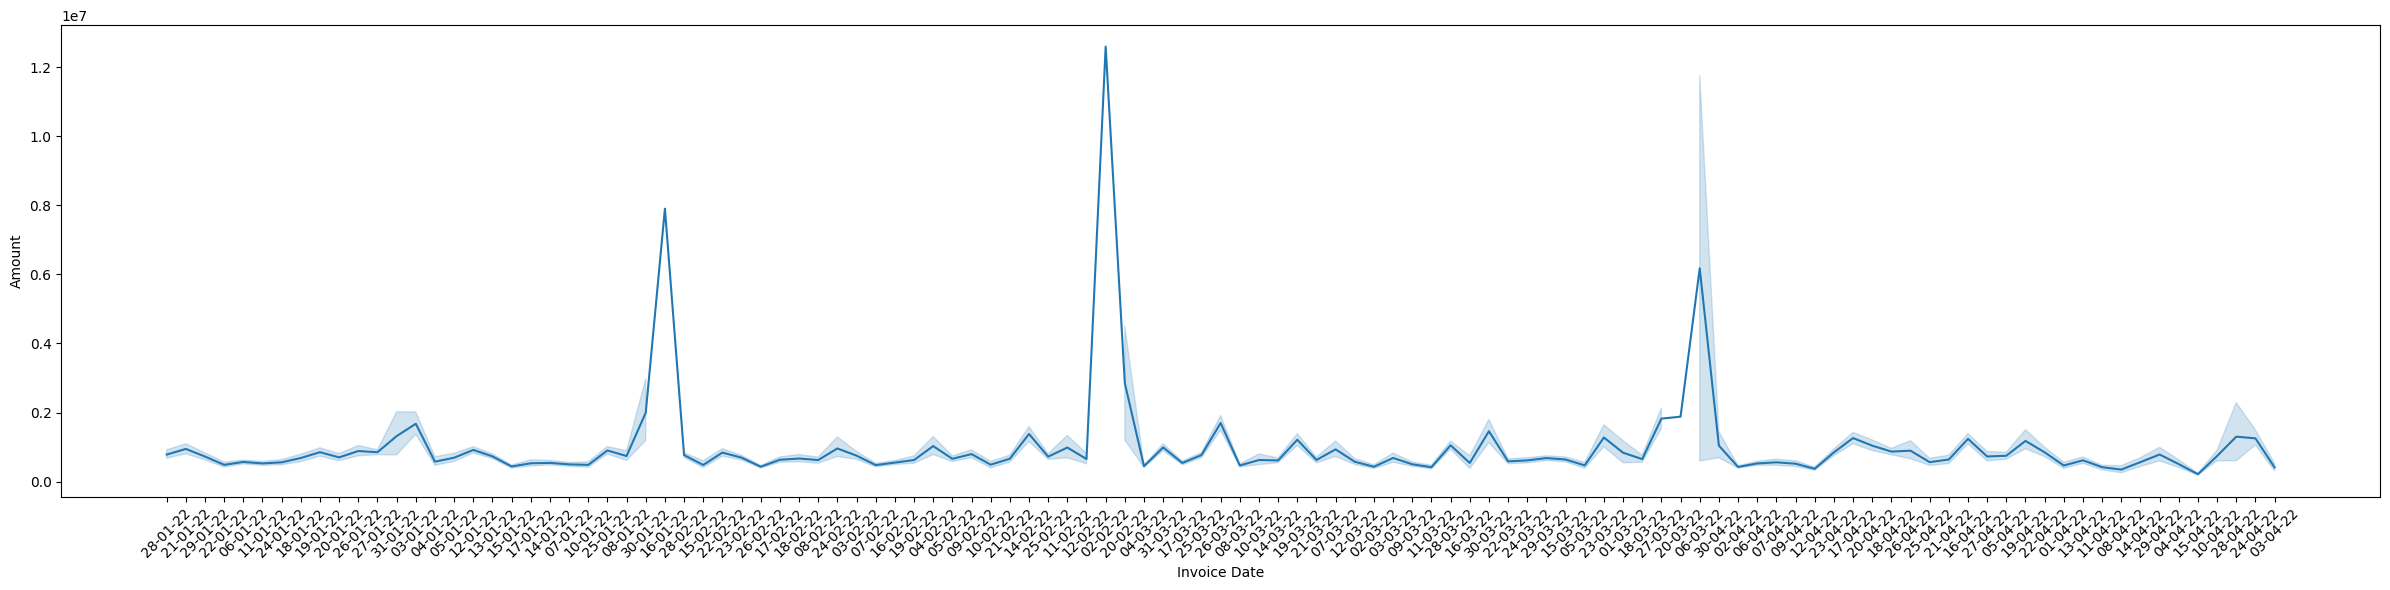

In [26]:
plt.figure(figsize=(24,6))
sns.lineplot(data=sales2022, x='Invoice Date', y='Amount')
plt.xlabel('Invoice Date')
plt.xticks(rotation = 45)
plt.tight_layout()

In [27]:
sales2023_2024.head(1)

Canceled Sales Employee Name  Document Number Posting Date   Due Date   
0        N              Farhan        220002380   2022-05-13 2022-05-27  \

  Group Name Customer/Vendor Code Customer/Vendor Name Payment Terms Code   
0        C11            JKT-00163               PLANET            14 Days  \

    Item No.              Item/Service Description  Quantity Unit   
0  SLM-2924C  SLIME TABUNG TUTUP BONEKA ( 12 PCS )      48.0  BOX  \

   Price after Discount  Row Total  
0               75000.0  3600000.0

In [28]:
item_2022 = sales2022[['Customer Code','Item No.']]
item_2023 = sales2023_2024[['Customer/Vendor Code','Item No.']]

item_2023 =item_2023.rename(columns={'Customer/Vendor Code':'Customer Code'})

In [29]:
item_k = item[['Item No.','Kategori','Sub Item']]

In [30]:
item_u = pd.concat([item_2022, item_2023], ignore_index=True)

In [31]:
item_m = pd.merge(item_u, item_k, on='Item No.', how='left')

In [32]:
item_m

Customer Code      Item No.           Kategori         Sub Item
0          SMS-00004      ATG-242C          AKSESORIS           ANTING
1          JBA-00044     ATG-249A1          AKSESORIS           GIWANG
2          SMS-00004      ATG-235B          AKSESORIS           ANTING
3          SMU-00011      ATG-247E          AKSESORIS     GIWANG JURAI
4          JBA-00044      ATG-247D          AKSESORIS     GIWANG JURAI
...              ...           ...                ...              ...
715096     JKT-00233  M-K06A-265P1        MARKETPLACE  PCS MARKETPLACE
715097     JKT-00233   M-K06B-181B        MARKETPLACE  PCS MARKETPLACE
715098     JKT-00233  M-K06G-321D1        MARKETPLACE  PCS MARKETPLACE
715099     JKT-00233  M-K06H-326F2        MARKETPLACE  PCS MARKETPLACE
715100     JBA-00163    KSK-2535H3  AKSESORIES CAMPUR  KAOS KAKI POUCH

[715101 rows x 4 columns]

In [33]:
item_uni = item_m.groupby('Customer Code').agg({'Item No.':'nunique'}).reset_index()

item_uni = item_uni.rename(columns={'Item No.':'Total Unique Item'})

In [34]:
item_uni

Customer Code  Total Unique Item
0        ACH-00001                 71
1        ACH-00002                724
2        ACH-00003                290
3        ACH-00004                250
4        ACH-00005                147
...            ...                ...
1556     YGY-00016               1741
1557     YGY-00017                323
1558     YGY-00018                327
1559     YGY-00019                252
1560     YGY-00020                 32

[1561 rows x 2 columns]

Untuk mengetahui berapa banyak jenis item yg pernah dibeli tiap customer

In [35]:
# Group by Customer Code and Kategori, count the occurrences, and find the top category
top_categories = item_m.groupby(['Customer Code', 'Kategori']).size().reset_index(name='kategori_count')
top_categories = top_categories.sort_values(by=['Customer Code', 'kategori_count'], ascending=[True, False])
top_categories = top_categories.groupby('Customer Code').first().reset_index()

In [36]:
top_categories

Customer Code                 Kategori  kategori_count
0        ACH-00001        AKSESORIES CAMPUR              23
1        ACH-00002             TAS & DOMPET             258
2        ACH-00003        AKSESORIES CAMPUR             115
3        ACH-00004             TAS & DOMPET             153
4        ACH-00005             TAS & DOMPET              75
...            ...                      ...             ...
1550     YGY-00016         AKSESORIS RAMBUT             647
1551     YGY-00017         AKSESORIS RAMBUT             117
1552     YGY-00018         AKSESORIS RAMBUT             165
1553     YGY-00019         AKSESORIS RAMBUT             156
1554     YGY-00020  AKSESORIS RAMBUT KAMINO              17

[1555 rows x 3 columns]

In [37]:
top_cate = top_categories[['Customer Code','Kategori','kategori_count']]

top_cate =top_cate.rename(columns={'Kategori':'Top Category'})

In [38]:
item_all = pd.merge(item_uni, top_cate, on='Customer Code', how='left')

In [39]:
item_all = item_all[~(item_all['Top Category'].isna())]

In [40]:
item_all

Customer Code  Total Unique Item             Top Category  kategori_count
0        ACH-00001                 71        AKSESORIES CAMPUR            23.0
1        ACH-00002                724             TAS & DOMPET           258.0
2        ACH-00003                290        AKSESORIES CAMPUR           115.0
3        ACH-00004                250             TAS & DOMPET           153.0
4        ACH-00005                147             TAS & DOMPET            75.0
...            ...                ...                      ...             ...
1556     YGY-00016               1741         AKSESORIS RAMBUT           647.0
1557     YGY-00017                323         AKSESORIS RAMBUT           117.0
1558     YGY-00018                327         AKSESORIS RAMBUT           165.0
1559     YGY-00019                252         AKSESORIS RAMBUT           156.0
1560     YGY-00020                 32  AKSESORIS RAMBUT KAMINO            17.0

[1555 rows x 4 columns]

In [41]:
aggs['Total Transaction'] = aggs['Total Transaction 2022'] + aggs['Total Transaction 2023']

In [42]:
aggs_n = aggs[['Customer Code','Total Amount','Total Transaction']]

In [43]:
aggs_all = pd.merge(aggs_n, item_all, on= 'Customer Code', how='left')

In [44]:
aggs_all[aggs_all['Top Category'].isna()]

aggs_all = aggs_all.rename(columns={'Customer Code':'BP Code'})

In [45]:
aggs_all

BP Code  Total Amount  Total Transaction  Total Unique Item   
0     ACH-00001    26743500.0                6.0               71.0  \
1     ACH-00002   300811175.0               97.0              724.0   
2     ACH-00003    81977262.0               16.0              290.0   
3     ACH-00004    71799000.0               35.0              250.0   
4     ACH-00005   109386000.0               23.0              147.0   
...         ...           ...                ...                ...   
1556  KSE-00016    98820000.0               14.0               51.0   
1557  KTI-00013    83696496.0               15.0              264.0   
1558  KUT-00001     3133200.0                2.0               16.0   
1559  LPG-00017    19518000.0                7.0               29.0   
1560  SMB-00017   167696000.0               29.0              119.0   

           Top Category  kategori_count  
0     AKSESORIES CAMPUR            23.0  
1          TAS & DOMPET           258.0  
2     AKSESORIES CAMPUR           115.0  
3          TAS & DOMPET           153.0  
4          TAS & DOMPET            75.0  
...                 ...             ...  
1556       TAS & DOMPET            39.0  
1557   AKSESORIS RAMBUT            71.0  
1558       ALAT MAKE UP             5.0  
1559  AKSESORIES CAMPUR            16.0  
1560  AKSESORIES CAMPUR            65.0  

[1561 rows x 6 columns]

menjadi feature baru yang mungkin penting

In [46]:
customer_add = pd.merge(customer, aggs_all, on='BP Code', how='inner')

In [47]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BP Code                   1528 non-null   object 
 1   BP Name                   1528 non-null   object 
 2   Shipping Type             1311 non-null   object 
 3   Group Code                1528 non-null   object 
 4   BP Type                   1528 non-null   object 
 5   Active                    1528 non-null   object 
 6   Payment Terms Code        1528 non-null   object 
 7   Price List No.            1528 non-null   object 
 8   Credit Limit              1528 non-null   float64
 9   Sales Employee Code       1528 non-null   object 
 10  Creation Date             1528 non-null   object 
 11  Churn                     1528 non-null   object 
 12  Return Barang             1528 non-null   int64  
 13  Total Return Barang       1528 non-null   float64
 14  Potongan

In [48]:
city

BP Code                 Ship-to City Ship-to County Ship-to-Province
0     ACH-00001                   BANDA ACEH           ACEH             ACEH
1     ACH-00002                   BANDA ACEH           ACEH             ACEH
2     ACH-00003                   BANDA ACEH           ACEH             ACEH
3     ACH-00004                         ACEH            NaN             ACEH
4     ACH-00005                         ACEH           ACEH             ACEH
...         ...                          ...            ...              ...
1732  YGY-00016                     KOTAGEDE     YOGYAKARTA    DI YOGYAKARTA
1733  YGY-00017                   YOGYAKARTA     YOGYAKARTA    DI YOGYAKARTA
1734  YGY-00018                       BANTUL  DI YOGYAKARTA    DI YOGYAKARTA
1735  YGY-00019                   YOGYAKARTA     YOGYAKARTA    DI YOGYAKARTA
1736  YGY-00020  MERGANGSAN, KOTA YOGYAKARTA     YOGYAKARTA    DI YOGYAKARTA

[1737 rows x 4 columns]

In [49]:
province = city[['BP Code', 'Ship-to-Province']]

In [50]:
province['Ship-to-Province'].value_counts()

Ship-to-Province
DKI JAKARTA                  357
JAWA BARAT                   262
JAWA TIMUR                   187
JAWA TENGAH                  179
BANTEN                        76
KALIMANTAN BARAT              61
LAMPUNG                       59
SUMATERA UTARA                58
SUMATERA BARAT                54
KALIMANTAN SELATAN            49
SUMATERA SELATAN              45
SULAWESI SELATAN              43
KALIMANTAN TIMUR              40
RIAU                          27
BALI                          22
DI YOGYAKARTA                 22
KALIMANTAN TENGAH             20
JAMBI                         19
ACEH                          18
SULAWESI UTARA                18
SULAWESI TENGAH               16
BENGKULU                      15
SULAWESI TENGGARA             13
PAPUA                         12
NUSA TENGGARA BARAT           10
KEPULAUAN BANGKA BELITUNG      8
NUSA TENGGARA TIMUR            8
PAPUA BARAT                    8
GORONTALO                      8
KALIMANTAN UTARA          

In [51]:
customer_add = pd.merge(customer_add,province, on= 'BP Code', how='left')

In [52]:
pd.set_option('display.max_columns', 100)
customer_add.sample(5)

BP Code            BP Name Shipping Type Group Code   BP Type Active   
1004  KSE-00032   RIFQI ACCESORIES   LINTAS JAWA        C10  Customer    Yes  \
1489   C8-00033  BP MAHAYUN (AGUS)    KURIR TOKO         C8  Customer     No   
67    BTN-00019        TOKO MUKLIS           NaN         C0  Customer    Yes   
1428    B-00081      ESUN (KOHSUN)           NaN     BLANKS  Customer     No   
1208  SMB-00022       ANUGERAH ACC  CV HSE CARGO         C2  Customer    Yes   

     Payment Terms Code      Price List No.  Credit Limit   
1004             0 Days  Harga Jual - Lusin           0.0  \
1489             0 Days  Harga Jual - Lusin           0.0   
67               0 Days  Harga Jual - Lusin           0.0   
1428             0 Days  Harga Jual - Lusin           0.0   
1208            30 Days  Harga Jual - Lusin    80000000.0   

      Sales Employee Code Creation Date Churn  Return Barang   
1004         Leppi Dianti      23-09-23     N              0  \
1489                Fazri      03-05-22     Y              0   
67                   Yani      07-03-23     Y              0   
1428  -No Sales Employee-      03-05-22     Y              0   
1208         Opik Hidayat      03-05-22     N              0   

      Total Return Barang  Potongan Penjualan  Total Potongan Penjualan   
1004                  0.0                   0                       0.0  \
1489                  0.0                   0                       0.0   
67                    0.0                   0                       0.0   
1428                  0.0                   0                       0.0   
1208                  0.0                   0                       0.0   

      Total Amount  Total Transaction  Total Unique Item      Top Category   
1004  1.092300e+07                4.0               33.0  AKSESORIS RAMBUT  \
1489  6.125000e+06                3.0               22.0             ROCHE   
67    2.153400e+07                8.0               79.0  AKSESORIS RAMBUT   
1428  6.439000e+06                1.0               12.0  AKSESORIS RAMBUT   
1208  1.389786e+09              158.0              681.0             ROCHE   

      kategori_count    Ship-to-Province  
1004            19.0  KALIMANTAN SELATAN  
1489            24.0         DKI JAKARTA  
67              32.0              BANTEN  
1428             7.0         JAWA TENGAH  
1208           458.0      SUMATERA BARAT

In [53]:
customer_add['Ship-to-Province'].unique()

array(['ACEH', 'BENGKULU', 'BALI', 'BANTEN', 'DKI JAKARTA', 'GORONTALO',
       'JAWA BARAT', 'JAMBI', 'JAWA TENGAH', 'JAWA TIMUR',
       'KALIMANTAN BARAT', 'JAKARTA PUSAT', 'KEPULAUAN BANGKA BELITUNG',
       'KEPULAUAN RIAU', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH',
       'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'LAMPUNG', 'MALUKU',
       'MALUKU UTARA', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR',
       'PAPUA BARAT', 'PAPUA', 'PAPUA TENGAH', 'RIAU', 'SULAWESI BARAT',
       'SUMATERA BARAT', 'SUMATERA SELATAN', 'SUMATERA UTARA',
       'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'SULAWESI TENGAH',
       'SULAWESI UTARA', 'DI YOGYAKARTA', 'SULAWESI UATARA'], dtype=object)

In [54]:
customer_add = pd.merge(customer_add, reward, on= 'BP Code', how='left')

In [55]:
reward

BP Code  reward_2022  reward_2023_p1  reward_2023_p2
0    ACH-00002            0               0               1
1    BKL-00002            1               1               1
2    BKL-00005            1               0               1
3    BLI-00003            1               0               1
4    BLI-00004            1               1               1
..         ...          ...             ...             ...
322  YGY-00012            1               1               0
323  YGY-00013            1               1               0
324  YGY-00014            1               0               1
325  YGY-00016            1               1               1
326  YGY-00019            0               0               1

[327 rows x 4 columns]

In [56]:
customer_add['reward_2022'].fillna(0, inplace=True)
customer_add['reward_2023_p1'].fillna(0, inplace=True)
customer_add['reward_2023_p2'].fillna(0, inplace=True)

In [57]:
customer_add.head()

BP Code               BP Name Shipping Type Group Code   BP Type Active   
0  ACH-00001          INDRA (ACEH)           KSI         C0  Customer    Yes  \
1  ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer    Yes   
2  ACH-00003                ZAZIRA    WIRA AGUNG         C4  Customer    Yes   
3  ACH-00004  TOKO BINTANG PERMATA           KSI          C  Customer    Yes   
4  ACH-00005                 IQBAL           KSI         C8  Customer    Yes   

  Payment Terms Code      Price List No.  Credit Limit Sales Employee Code   
0             0 Days  Harga Jual - Lusin           0.0     Shifa Anggraeni  \
1            14 Days  Harga Jual - Lusin    30000000.0        Opik Hidayat   
2             0 Days  Harga Jual - Lusin           0.0     Shifa Anggraeni   
3            14 Days  Harga Jual - Lusin    20000000.0            Saepudin   
4             0 Days  Harga Jual - Lusin           0.0                Dina   

  Creation Date Churn  Return Barang  Total Return Barang  Potongan Penjualan   
0      03-05-22     Y              0                  0.0                   0  \
1      03-05-22     N              1              51000.0                   0   
2      03-05-22     N              1             330000.0                   0   
3      03-05-22     N              0                  0.0                   0   
4      03-05-22     N              0                  0.0                   0   

   Total Potongan Penjualan  Total Amount  Total Transaction   
0                       0.0    26743500.0                6.0  \
1                       0.0   300811175.0               97.0   
2                       0.0    81977262.0               16.0   
3                       0.0    71799000.0               35.0   
4                       0.0   109386000.0               23.0   

   Total Unique Item       Top Category  kategori_count Ship-to-Province   
0               71.0  AKSESORIES CAMPUR            23.0             ACEH  \
1              724.0       TAS & DOMPET           258.0             ACEH   
2              290.0  AKSESORIES CAMPUR           115.0             ACEH   
3              250.0       TAS & DOMPET           153.0             ACEH   
4              147.0       TAS & DOMPET            75.0             ACEH   

   reward_2022  reward_2023_p1  reward_2023_p2  
0          0.0             0.0             0.0  
1          0.0             0.0             1.0  
2          0.0             0.0             0.0  
3          0.0             0.0             0.0  
4          0.0             0.0             0.0

In [58]:
sales2022['Invoice Date'] = pd.to_datetime(sales2022['Invoice Date'])

In [59]:
sales2022

Invoice No. Invoice Date  Quantity Unit    Amount   
0      38143 - 38144   2022-01-28      12.0  LSN  270000.0  \
1         44468 - 74   2022-01-21       1.0  PAK  270000.0   
2      38143 - 38144   2022-01-28      12.0  LSN  840000.0   
3      39599 - 39600   2022-01-29       3.0  LSN  165000.0   
4      40519 - 40536   2022-01-22       3.0  LSN  165000.0   
...              ...          ...       ...  ...       ...   
72500          59467   2022-04-30       1.0  PCS       0.0   
72501          59471   2022-04-30       1.0  PCS       0.0   
72502          59472   2022-04-30       1.0  PCS       0.0   
72503          59473   2022-04-30       1.0  PCS       0.0   
72504  38561 - 38562   2022-01-04       1.0  LSN   65000.0   

                             Item Description   Item No. Customer Code   
0                      ANTING BOLA 2 DOVE PJG   ATG-242C     SMS-00004  \
1      ANTING BULAT POLOS KAR 12 PSG (10 KAR)  ATG-249A1     JBA-00044   
2                      ANTING DAUN MATA JURAI   ATG-235B     SMS-00004   
3             ANTING JURAI BULAT KRISTAL MATA   ATG-247E     SMU-00011   
4             ANTING JURAI KUPU2 KRISTAL MATA   ATG-247D     JBA-00044   
...                                       ...        ...           ...   
72500                                  TUMBIR    PARCEL7     KSE-00022   
72501                                  TUMBIR    PARCEL7     SMB-00012   
72502                                  TUMBIR    PARCEL7     RIU-00010   
72503                                  TUMBIR    PARCEL7     JTH-00017   
72504                           ZODIAK PERAHU   CPR-018A     JBA-00020   

      Customer Name  
0         TOKO RUDI  
1      CUCU FARIDAH  
2         TOKO RUDI  
3             SANNY  
4      CUCU FARIDAH  
...             ...  
72500        H.ANAH  
72501    INDAH SARI  
72502         AMORA  
72503    CEMARA ACC  
72504      YOU & ME  

[72505 rows x 9 columns]

In [60]:
sales2022['YearMonth'] = sales2022['Invoice Date'].dt.to_period('M')
months_per_customer = sales2022.groupby('Customer Code')['YearMonth'].nunique().reset_index()

# Rename the column
months_per_customer.rename(columns={'YearMonth': 'Number of Months 2022'}, inplace=True)

In [61]:
months_per_customer #Bulan unik customer bertransaksi 

Customer Code  Number of Months 2022
0       ACH-00001                      2
1       ACH-00002                      8
2       ACH-00003                      2
3       ACH-00004                      4
4       ACH-00005                      2
..            ...                    ...
511     YGY-00012                      2
512     YGY-00013                      6
513     YGY-00014                      7
514     YGY-00015                      1
515     YGY-00016                      8

[516 rows x 2 columns]

In [62]:
sales2023_2024.head()

Canceled Sales Employee Name  Document Number Posting Date   Due Date   
0        N              Farhan        220002380   2022-05-13 2022-05-27  \
1        N              Farhan        220002380   2022-05-13 2022-05-27   
2        N              Farhan        220002380   2022-05-13 2022-05-27   
3        N              Farhan        220002380   2022-05-13 2022-05-27   
4        N              Farhan        220002380   2022-05-13 2022-05-27   

  Group Name Customer/Vendor Code Customer/Vendor Name Payment Terms Code   
0        C11            JKT-00163               PLANET            14 Days  \
1        C11            JKT-00163               PLANET            14 Days   
2        C11            JKT-00163               PLANET            14 Days   
3        C11            JKT-00163               PLANET            14 Days   
4        C11            JKT-00163               PLANET            14 Days   

    Item No.              Item/Service Description  Quantity Unit   
0  SLM-2924C  SLIME TABUNG TUTUP BONEKA ( 12 PCS )      48.0  BOX  \
1  SLM-2922E       SLIME 3W BEAR STYROFOAM (6 PCS)      72.0  BOX   
2  SLM-2924E           SLIME W TUTUP BEBEK (6 PCS)      72.0  BOX   
3  SLM-2924D  SLIME GRADASI W LITTLE TIGER (12PCS)      48.0  BOX   
4  MMT-2581A                    PENUTUP MATA MOTIF     200.0  LSN   

   Price after Discount   Row Total  
0               75000.0   3600000.0  
1               60000.0   4320000.0  
2               55000.0   3960000.0  
3               80000.0   3840000.0  
4               55000.0  11000000.0

In [63]:
sales2023_2024['Posting Date'] = pd.to_datetime(sales2023_2024['Posting Date'])
sales2023_2024['YearMonth'] = sales2023_2024['Posting Date'].dt.to_period('M')
months_per_customer_1 = sales2023_2024.groupby('Customer/Vendor Code')['YearMonth'].nunique().reset_index()
months_per_customer_1.rename(columns={'YearMonth': 'Number of Months 2023/24',
                                      'Customer/Vendor Code':'Customer Code'}, inplace=True)

In [64]:
months_per_customer = pd.merge(months_per_customer,months_per_customer_1, on='Customer Code',how='outer')
months_per_customer.fillna(0, inplace=True)

In [65]:
months_per_customer['Number of Months'] = months_per_customer['Number of Months 2022'] + months_per_customer['Number of Months 2023/24']

In [66]:
months_per_cust = months_per_customer[['Customer Code','Number of Months']]

In [67]:
months_per_cust #total bulan unik dr 2022-2023

Customer Code  Number of Months
0        ACH-00001               4.0
1        ACH-00002              25.0
2        ACH-00003              11.0
3        ACH-00004              15.0
4        ACH-00005              13.0
...            ...               ...
1556     YGY-00008               8.0
1557     YGY-00017               7.0
1558     YGY-00018               9.0
1559     YGY-00019               4.0
1560     YGY-00020               1.0

[1561 rows x 2 columns]

In [68]:
months_per_cust.rename(columns={'Customer Code':'BP Code'}, inplace=True)

In [69]:
customer_add = pd.merge(customer_add, months_per_cust, on='BP Code', how='left')

In [70]:
sales2022

Invoice No. Invoice Date  Quantity Unit    Amount   
0      38143 - 38144   2022-01-28      12.0  LSN  270000.0  \
1         44468 - 74   2022-01-21       1.0  PAK  270000.0   
2      38143 - 38144   2022-01-28      12.0  LSN  840000.0   
3      39599 - 39600   2022-01-29       3.0  LSN  165000.0   
4      40519 - 40536   2022-01-22       3.0  LSN  165000.0   
...              ...          ...       ...  ...       ...   
72500          59467   2022-04-30       1.0  PCS       0.0   
72501          59471   2022-04-30       1.0  PCS       0.0   
72502          59472   2022-04-30       1.0  PCS       0.0   
72503          59473   2022-04-30       1.0  PCS       0.0   
72504  38561 - 38562   2022-01-04       1.0  LSN   65000.0   

                             Item Description   Item No. Customer Code   
0                      ANTING BOLA 2 DOVE PJG   ATG-242C     SMS-00004  \
1      ANTING BULAT POLOS KAR 12 PSG (10 KAR)  ATG-249A1     JBA-00044   
2                      ANTING DAUN MATA JURAI   ATG-235B     SMS-00004   
3             ANTING JURAI BULAT KRISTAL MATA   ATG-247E     SMU-00011   
4             ANTING JURAI KUPU2 KRISTAL MATA   ATG-247D     JBA-00044   
...                                       ...        ...           ...   
72500                                  TUMBIR    PARCEL7     KSE-00022   
72501                                  TUMBIR    PARCEL7     SMB-00012   
72502                                  TUMBIR    PARCEL7     RIU-00010   
72503                                  TUMBIR    PARCEL7     JTH-00017   
72504                           ZODIAK PERAHU   CPR-018A     JBA-00020   

      Customer Name YearMonth  
0         TOKO RUDI   2022-01  
1      CUCU FARIDAH   2022-01  
2         TOKO RUDI   2022-01  
3             SANNY   2022-01  
4      CUCU FARIDAH   2022-01  
...             ...       ...  
72500        H.ANAH   2022-04  
72501    INDAH SARI   2022-04  
72502         AMORA   2022-04  
72503    CEMARA ACC   2022-04  
72504      YOU & ME   2022-01  

[72505 rows x 10 columns]

In [71]:
sales2022['Invoice Date'] = pd.to_datetime(sales2022['Invoice Date'])

# Group transactions by customer and find first and last sales dates
first_last_sales_dates = sales2022.groupby('Customer Code')['Invoice Date'].agg(['min', 'max']).reset_index()

# Rename the columns
first_last_sales_dates.rename(columns={'min': 'First Sales Date 2022', 'max': 'Last Sales Date 2022'}, inplace=True)

In [72]:
first_last_sales_dates

Customer Code First Sales Date 2022 Last Sales Date 2022
0       ACH-00001            2022-01-22           2022-02-15
1       ACH-00002            2022-01-24           2022-12-04
2       ACH-00003            2022-02-19           2022-12-02
3       ACH-00004            2022-01-22           2022-04-18
4       ACH-00005            2022-02-28           2022-05-04
..            ...                   ...                  ...
511     YGY-00012            2022-01-04           2022-07-02
512     YGY-00013            2022-01-15           2022-11-03
513     YGY-00014            2022-01-29           2022-12-03
514     YGY-00015            2022-04-26           2022-04-26
515     YGY-00016            2022-01-13           2022-12-03

[516 rows x 3 columns]

In [73]:
sales2023_2024['Posting Date'] = pd.to_datetime(sales2023_2024['Posting Date'])

# Group transactions by customer and find first and last sales dates
first_last_sales_dates_1 = sales2023_2024.groupby('Customer/Vendor Code')['Posting Date'].agg(['min', 'max']).reset_index()

# Rename the columns
first_last_sales_dates_1.rename(columns={'min': 'First Sales Date 2023/24', 'max': 'Last Sales Date 2023/24',
                                         'Customer/Vendor Code':'Customer Code'}, inplace=True)

In [74]:
first_last_sales_dates_1

Customer Code First Sales Date 2023/24 Last Sales Date 2023/24
0        ACH-00001               2022-05-14              2022-06-02
1        ACH-00002               2022-05-19              2024-03-02
2        ACH-00003               2022-06-02              2024-01-05
3        ACH-00004               2022-05-24              2024-03-12
4        ACH-00005               2022-06-07              2024-02-20
...            ...                      ...                     ...
1485     YGY-00016               2022-05-24              2024-03-30
1486     YGY-00017               2023-04-14              2024-03-06
1487     YGY-00018               2023-07-05              2024-03-19
1488     YGY-00019               2023-10-13              2024-03-04
1489     YGY-00020               2024-02-29              2024-02-29

[1490 rows x 3 columns]

In [75]:
first_last_dates = pd.merge(first_last_sales_dates_1,first_last_sales_dates, on='Customer Code', how='outer')

In [76]:
first_last_dates['First Sales Date'] = first_last_dates[['First Sales Date 2023/24', 'First Sales Date 2022']].min(axis=1)
first_last_dates['Last Sales Date'] = first_last_dates[['Last Sales Date 2023/24', 'Last Sales Date 2022']].max(axis=1)

# Drop unnecessary columns
first_last_dates.drop(['First Sales Date 2023/24', 'Last Sales Date 2023/24', 'First Sales Date 2022', 'Last Sales Date 2022'], axis=1, inplace=True)

In [77]:
first_last_dates.rename(columns={'Customer Code':'BP Code'}, inplace=True)

In [78]:
first_last_dates

BP Code First Sales Date Last Sales Date
0     ACH-00001       2022-01-22      2022-06-02
1     ACH-00002       2022-01-24      2024-03-02
2     ACH-00003       2022-02-19      2024-01-05
3     ACH-00004       2022-01-22      2024-03-12
4     ACH-00005       2022-02-28      2024-02-20
...         ...              ...             ...
1556  KSE-00016       2022-02-14      2022-08-02
1557  KTI-00013       2022-01-25      2022-09-02
1558  KUT-00001       2022-02-22      2022-09-04
1559  LPG-00017       2022-04-20      2022-06-04
1560  SMB-00017       2022-01-04      2022-12-01

[1561 rows x 3 columns]

In [79]:
customer_add = pd.merge(customer_add, first_last_dates, on='BP Code', how='left')

In [80]:
customer_add

BP Code               BP Name Shipping Type Group Code   BP Type   
0     ACH-00001          INDRA (ACEH)           KSI         C0  Customer  \
1     ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer   
2     ACH-00003                ZAZIRA    WIRA AGUNG         C4  Customer   
3     ACH-00004  TOKO BINTANG PERMATA           KSI          C  Customer   
4     ACH-00005                 IQBAL           KSI         C8  Customer   
...         ...                   ...           ...        ...       ...   
1523  K03-00018             JKT ACONG    KURIR TOKO        K03  Customer   
1524  K03-00033         TOKO SUCI ACC     IPN CARGO        K03  Customer   
1525  K03-00035              TOKO GIO      PANORAMA        K03  Customer   
1526  K03-00038         TOKO FITA ACC     IPN CARGO        K03  Customer   
1527  KSE-00016     SETIA BANJARMASIN            ZR         C3  Customer   

     Active Payment Terms Code      Price List No.  Credit Limit   
0       Yes             0 Days  Harga Jual - Lusin           0.0  \
1       Yes            14 Days  Harga Jual - Lusin    30000000.0   
2       Yes             0 Days  Harga Jual - Lusin           0.0   
3       Yes            14 Days  Harga Jual - Lusin    20000000.0   
4       Yes             0 Days  Harga Jual - Lusin           0.0   
...     ...                ...                 ...           ...   
1523     No             0 Days  Harga Jual - Lusin           0.0   
1524     No             7 Days  Harga Jual - Lusin           0.0   
1525     No             7 Days  Harga Jual - Lusin           0.0   
1526     No             0 Days  Harga Jual - Lusin           0.0   
1527     No             0 Days  Harga Jual - Lusin           0.0   

     Sales Employee Code Creation Date Churn  Return Barang   
0        Shifa Anggraeni      03-05-22     Y              0  \
1           Opik Hidayat      03-05-22     N              1   
2        Shifa Anggraeni      03-05-22     N              1   
3               Saepudin      03-05-22     N              0   
4                   Dina      03-05-22     N              0   
...                  ...           ...   ...            ...   
1523               Sania      03-05-22     Y              0   
1524               Sania      03-05-22     Y              0   
1525               Sania      03-05-22     Y              0   
1526               Sania      03-05-22     Y              0   
1527             Febiola      03-05-22     Y              0   

      Total Return Barang  Potongan Penjualan  Total Potongan Penjualan   
0                     0.0                   0                       0.0  \
1                 51000.0                   0                       0.0   
2                330000.0                   0                       0.0   
3                     0.0                   0                       0.0   
4                     0.0                   0                       0.0   
...                   ...                 ...                       ...   
1523                  0.0                   0                       0.0   
1524                  0.0                   0                       0.0   
1525                  0.0                   0                       0.0   
1526                  0.0                   0                       0.0   
1527                  0.0                   0                       0.0   

      Total Amount  Total Transaction  Total Unique Item       Top Category   
0       26743500.0                6.0               71.0  AKSESORIES CAMPUR  \
1      300811175.0               97.0              724.0       TAS & DOMPET   
2       81977262.0               16.0              290.0  AKSESORIES CAMPUR   
3       71799000.0               35.0              250.0       TAS & DOMPET   
4      109386000.0               23.0              147.0       TAS & DOMPET   
...            ...                ...                ...                ...   
1523     2083500.0                2.0                2.0  AKSESORIE

In [81]:
create_date = sales2022.groupby('Customer Code').agg({'Invoice Date':'min'}).reset_index()

create_date = create_date.rename(columns={'Invoice Date':'New Creation Date',
                                          'Customer Code':'BP Code'})

In [82]:
create_date

BP Code New Creation Date
0    ACH-00001        2022-01-22
1    ACH-00002        2022-01-24
2    ACH-00003        2022-02-19
3    ACH-00004        2022-01-22
4    ACH-00005        2022-02-28
..         ...               ...
511  YGY-00012        2022-01-04
512  YGY-00013        2022-01-15
513  YGY-00014        2022-01-29
514  YGY-00015        2022-04-26
515  YGY-00016        2022-01-13

[516 rows x 2 columns]

In [83]:
customer_add = pd.merge(customer_add, create_date, on='BP Code', how='left')
customer_add['New Creation Date'].fillna(customer_add['Creation Date'], inplace=True)

In [84]:
customer_add

BP Code               BP Name Shipping Type Group Code   BP Type   
0     ACH-00001          INDRA (ACEH)           KSI         C0  Customer  \
1     ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer   
2     ACH-00003                ZAZIRA    WIRA AGUNG         C4  Customer   
3     ACH-00004  TOKO BINTANG PERMATA           KSI          C  Customer   
4     ACH-00005                 IQBAL           KSI         C8  Customer   
...         ...                   ...           ...        ...       ...   
1523  K03-00018             JKT ACONG    KURIR TOKO        K03  Customer   
1524  K03-00033         TOKO SUCI ACC     IPN CARGO        K03  Customer   
1525  K03-00035              TOKO GIO      PANORAMA        K03  Customer   
1526  K03-00038         TOKO FITA ACC     IPN CARGO        K03  Customer   
1527  KSE-00016     SETIA BANJARMASIN            ZR         C3  Customer   

     Active Payment Terms Code      Price List No.  Credit Limit   
0       Yes             0 Days  Harga Jual - Lusin           0.0  \
1       Yes            14 Days  Harga Jual - Lusin    30000000.0   
2       Yes             0 Days  Harga Jual - Lusin           0.0   
3       Yes            14 Days  Harga Jual - Lusin    20000000.0   
4       Yes             0 Days  Harga Jual - Lusin           0.0   
...     ...                ...                 ...           ...   
1523     No             0 Days  Harga Jual - Lusin           0.0   
1524     No             7 Days  Harga Jual - Lusin           0.0   
1525     No             7 Days  Harga Jual - Lusin           0.0   
1526     No             0 Days  Harga Jual - Lusin           0.0   
1527     No             0 Days  Harga Jual - Lusin           0.0   

     Sales Employee Code Creation Date Churn  Return Barang   
0        Shifa Anggraeni      03-05-22     Y              0  \
1           Opik Hidayat      03-05-22     N              1   
2        Shifa Anggraeni      03-05-22     N              1   
3               Saepudin      03-05-22     N              0   
4                   Dina      03-05-22     N              0   
...                  ...           ...   ...            ...   
1523               Sania      03-05-22     Y              0   
1524               Sania      03-05-22     Y              0   
1525               Sania      03-05-22     Y              0   
1526               Sania      03-05-22     Y              0   
1527             Febiola      03-05-22     Y              0   

      Total Return Barang  Potongan Penjualan  Total Potongan Penjualan   
0                     0.0                   0                       0.0  \
1                 51000.0                   0                       0.0   
2                330000.0                   0                       0.0   
3                     0.0                   0                       0.0   
4                     0.0                   0                       0.0   
...                   ...                 ...                       ...   
1523                  0.0                   0                       0.0   
1524                  0.0                   0                       0.0   
1525                  0.0                   0                       0.0   
1526                  0.0                   0                       0.0   
1527                  0.0                   0                       0.0   

      Total Amount  Total Transaction  Total Unique Item       Top Category   
0       26743500.0                6.0               71.0  AKSESORIES CAMPUR  \
1      300811175.0               97.0              724.0       TAS & DOMPET   
2       81977262.0               16.0              290.0  AKSESORIES CAMPUR   
3       71799000.0               35.0              250.0       TAS & DOMPET   
4      109386000.0               23.0              147.0       TAS & DOMPET   
...            ...                ...                ...                ...   
1523     2083500.0                2.0                2.0  AKSESORIE

In [85]:
top_20_shipping_types = customer['Shipping Type'].value_counts().head(20)

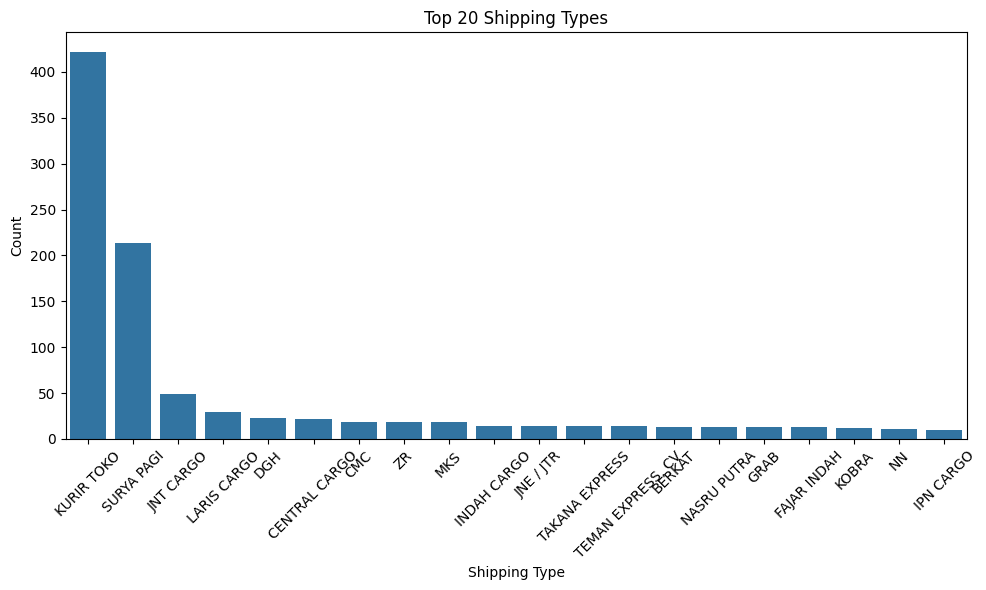

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_20_shipping_types.index, y=top_20_shipping_types.values)
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.title('Top 20 Shipping Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
shipping_counts = customer['Shipping Type'].value_counts()
low_count_shipping_types = shipping_counts[shipping_counts < 10].index
customer1 = customer.copy()
customer1.loc[customer1['Shipping Type'].isin(low_count_shipping_types), 'Shipping Type'] = 'Others'
customer1.head()

BP Code               BP Name Shipping Type Group Code   BP Type Active   
0  ACH-00001          INDRA (ACEH)        Others         C0  Customer    Yes  \
1  ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer    Yes   
2  ACH-00003                ZAZIRA        Others         C4  Customer    Yes   
3  ACH-00004  TOKO BINTANG PERMATA        Others          C  Customer    Yes   
4  ACH-00005                 IQBAL        Others         C8  Customer    Yes   

  Payment Terms Code      Price List No.  Credit Limit Sales Employee Code   
0             0 Days  Harga Jual - Lusin           0.0     Shifa Anggraeni  \
1            14 Days  Harga Jual - Lusin    30000000.0        Opik Hidayat   
2             0 Days  Harga Jual - Lusin           0.0     Shifa Anggraeni   
3            14 Days  Harga Jual - Lusin    20000000.0            Saepudin   
4             0 Days  Harga Jual - Lusin           0.0                Dina   

  Creation Date Churn  Return Barang  Total Return Barang  Potongan Penjualan   
0      03-05-22     Y              0                  0.0                   0  \
1      03-05-22     N              1              51000.0                   0   
2      03-05-22     N              1             330000.0                   0   
3      03-05-22     N              0                  0.0                   0   
4      03-05-22     N              0                  0.0                   0   

   Total Potongan Penjualan  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0

In [88]:
top_20_shipping_types = customer1['Shipping Type'].value_counts().head(20)

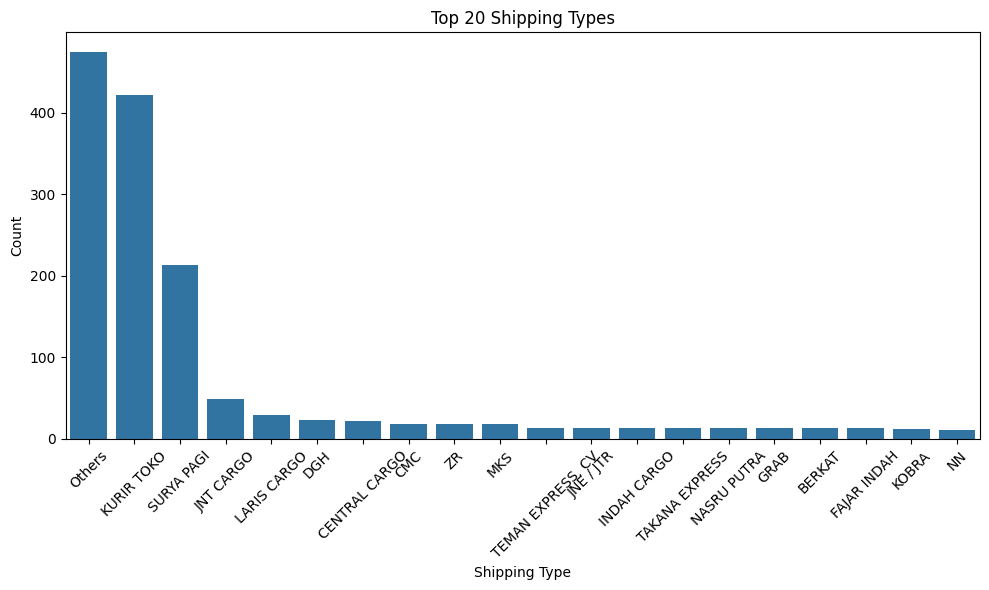

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_20_shipping_types.index, y=top_20_shipping_types.values)
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.title('Top 20 Shipping Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
print(customer_add.columns.tolist())

['BP Code', 'BP Name', 'Shipping Type', 'Group Code', 'BP Type', 'Active', 'Payment Terms Code', 'Price List No.', 'Credit Limit', 'Sales Employee Code', 'Creation Date', 'Churn', 'Return Barang', 'Total Return Barang', 'Potongan Penjualan', 'Total Potongan Penjualan', 'Total Amount', 'Total Transaction', 'Total Unique Item', 'Top Category', 'kategori_count', 'Ship-to-Province', 'reward_2022', 'reward_2023_p1', 'reward_2023_p2', 'Number of Months', 'First Sales Date', 'Last Sales Date', 'New Creation Date']


In [91]:
pd.set_option('display.max_columns', None)

In [92]:
customer_add.head()

BP Code               BP Name Shipping Type Group Code   BP Type Active   
0  ACH-00001          INDRA (ACEH)           KSI         C0  Customer    Yes  \
1  ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer    Yes   
2  ACH-00003                ZAZIRA    WIRA AGUNG         C4  Customer    Yes   
3  ACH-00004  TOKO BINTANG PERMATA           KSI          C  Customer    Yes   
4  ACH-00005                 IQBAL           KSI         C8  Customer    Yes   

  Payment Terms Code      Price List No.  Credit Limit Sales Employee Code   
0             0 Days  Harga Jual - Lusin           0.0     Shifa Anggraeni  \
1            14 Days  Harga Jual - Lusin    30000000.0        Opik Hidayat   
2             0 Days  Harga Jual - Lusin           0.0     Shifa Anggraeni   
3            14 Days  Harga Jual - Lusin    20000000.0            Saepudin   
4             0 Days  Harga Jual - Lusin           0.0                Dina   

  Creation Date Churn  Return Barang  Total Return Barang  Potongan Penjualan   
0      03-05-22     Y              0                  0.0                   0  \
1      03-05-22     N              1              51000.0                   0   
2      03-05-22     N              1             330000.0                   0   
3      03-05-22     N              0                  0.0                   0   
4      03-05-22     N              0                  0.0                   0   

   Total Potongan Penjualan  Total Amount  Total Transaction   
0                       0.0    26743500.0                6.0  \
1                       0.0   300811175.0               97.0   
2                       0.0    81977262.0               16.0   
3                       0.0    71799000.0               35.0   
4                       0.0   109386000.0               23.0   

   Total Unique Item       Top Category  kategori_count Ship-to-Province   
0               71.0  AKSESORIES CAMPUR            23.0             ACEH  \
1              724.0       TAS & DOMPET           258.0             ACEH   
2              290.0  AKSESORIES CAMPUR           115.0             ACEH   
3              250.0       TAS & DOMPET           153.0             ACEH   
4              147.0       TAS & DOMPET            75.0             ACEH   

   reward_2022  reward_2023_p1  reward_2023_p2  Number of Months   
0          0.0             0.0             0.0               4.0  \
1          0.0             0.0             1.0              25.0   
2          0.0             0.0             0.0              11.0   
3          0.0             0.0             0.0              15.0   
4          0.0             0.0             0.0              13.0   

  First Sales Date Last Sales Date New Creation Date  
0       2022-01-22      2022-06-02        2022-01-22  
1       2022-01-24      2024-03-02        2022-01-24  
2       2022-02-19      2024-01-05        2022-02-19  
3       2022-01-22      2024-03-12        2022-01-22  
4       2022-02-28      2024-02-20        2022-02-28

In [93]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   BP Code                   1528 non-null   object        
 1   BP Name                   1528 non-null   object        
 2   Shipping Type             1311 non-null   object        
 3   Group Code                1528 non-null   object        
 4   BP Type                   1528 non-null   object        
 5   Active                    1528 non-null   object        
 6   Payment Terms Code        1528 non-null   object        
 7   Price List No.            1528 non-null   object        
 8   Credit Limit              1528 non-null   float64       
 9   Sales Employee Code       1528 non-null   object        
 10  Creation Date             1528 non-null   object        
 11  Churn                     1528 non-null   object        
 12  Return Barang       

In [94]:
customer_add[customer_add['Ship-to-Province']=='KEPULAUAN BANGKA BELITUNG']

BP Code                       BP Name  Shipping Type Group Code   
968  KBB-00001               TOKO PLANET ACC    555 EXPRESS         C8  \
969  KBB-00002                       RAINBOW      SPX DARAT         C0   
970  KBB-00003                   ASOKA(YANI)    ICA EXPRESS         C6   
971  KBB-00004                     DAMALO.ID  CENTRAL CARGO         C0   
972  KBB-00005                         ASOKA           LAJU         C0   
973  KBB-00008  D.N.S BEAUTY AND ACCESSORIES      JNT CARGO          C   

      BP Type Active Payment Terms Code      Price List No.  Credit Limit   
968  Customer    Yes             7 Days  Harga Jual - Lusin    30000000.0  \
969  Customer    Yes             0 Days  Harga Jual - Lusin           0.0   
970  Customer    Yes            14 Days  Harga Jual - Lusin    50000000.0   
971  Customer    Yes             0 Days  Harga Jual - Lusin           0.0   
972  Customer    Yes             0 Days  Harga Jual - Lusin           0.0   
973  Customer    Yes             0 Days  Harga Jual - Lusin           0.0   

    Sales Employee Code Creation Date Churn  Return Barang   
968                Dina      03-05-22     N              0  \
969        Opik Hidayat      03-05-22     Y              0   
970               Rizki      03-05-22     N              1   
971                Dina      08-09-22     Y              0   
972         Sadarmawati      03-05-22     Y              0   
973            Saepudin      12-03-24     N              0   

     Total Return Barang  Potongan Penjualan  Total Potongan Penjualan   
968                  0.0                   0                       0.0  \
969                  0.0                   0                       0.0   
970             279000.0                   0                       0.0   
971                  0.0                   0                       0.0   
972                  0.0                   0                       0.0   
973                  0.0                   0                       0.0   

     Total Amount  Total Transaction  Total Unique Item   
968   415420800.0               82.0              418.0  \
969    41748700.0               12.0              430.0   
970   586073700.0              107.0              302.0   
971     4425000.0                7.0               16.0   
972   521187500.0               44.0              829.0   
973     2938000.0                1.0               13.0   

                Top Category  kategori_count           Ship-to-Province   
968        AKSESORIES CAMPUR           182.0  KEPULAUAN BANGKA BELITUNG  \
969         AKSESORIS RAMBUT           202.0  KEPULAUAN BANGKA BELITUNG   
970         AKSESORIS RAMBUT           233.0  KEPULAUAN BANGKA BELITUNG   
971         AKSESORIS RAMBUT             7.0  KEPULAUAN BANGKA BELITUNG   
972         AKSESORIS RAMBUT           343.0  KEPULAUAN BANGKA BELITUNG   
973  AKSESORIS RAMBUT KAMINO            13.0  KEPULAUAN BANGKA BELITUNG   

     reward_2022  reward_2023_p1  reward_2023_p2  Number of Months   
968          0.0             0.0             0.0              18.0  \
969          0.0             0.0             0.0               7.0   
970          1.0             0.0             1.0              22.0   
971          0.0             0.0             0.0               2.0   
972          1.0             1.0             1.0              19.0   
973          0.0             0.0             0.0               1.0   

    First Sales Date Last Sales Date New Creation Date  
968       2022-03-29      2024-03-26        2022-03-29  
969       2022-06-22      2024-03-14        2022-03-05  
970       2022-01-25      2024-03-26        2022-01-25  
971       2022-09-10      2022-10-01        2022-08-09  
972       2022-01-17      2024-03-23        2022-01-17  
973       2024-03-09      2024-03-09        2024-12-03

In [95]:
print(customer_add['BP Name'].unique())

['INDRA (ACEH)' 'NUSA INDAH' 'ZAZIRA' ... 'TOKO GIO' 'TOKO FITA ACC'
 'SETIA BANJARMASIN']


In [96]:
customer_add[customer_add['Active']=='Yes']

BP Code               BP Name  Shipping Type Group Code   BP Type   
0     ACH-00001          INDRA (ACEH)            KSI         C0  Customer  \
1     ACH-00002            NUSA INDAH    LARIS CARGO         C2  Customer   
2     ACH-00003                ZAZIRA     WIRA AGUNG         C4  Customer   
3     ACH-00004  TOKO BINTANG PERMATA            KSI          C  Customer   
4     ACH-00005                 IQBAL            KSI         C8  Customer   
...         ...                   ...            ...        ...       ...   
1403  YGY-00018       TOKO AILA JOGJA  CENTRAL CARGO         C5  Customer   
1404  YGY-00019       BABY CARE JOGJA  CENTRAL CARGO         C9  Customer   
1405  YGY-00020   JELITA COSMETIC. CV     SURYA PAGI          C  Customer   
1471    B-00107                   SMS     KURIR TOKO     BLANKS  Customer   
1495   C9-00062          FAMILY FANCY            NaN     BLANKS  Customer   

     Active Payment Terms Code      Price List No.  Credit Limit   
0       Yes             0 Days  Harga Jual - Lusin           0.0  \
1       Yes            14 Days  Harga Jual - Lusin    30000000.0   
2       Yes             0 Days  Harga Jual - Lusin           0.0   
3       Yes            14 Days  Harga Jual - Lusin    20000000.0   
4       Yes             0 Days  Harga Jual - Lusin           0.0   
...     ...                ...                 ...           ...   
1403    Yes             0 Days  Harga Jual - Lusin           0.0   
1404    Yes             0 Days  Harga Jual - Lusin           0.0   
1405    Yes             0 Days  Harga Jual - Lusin           0.0   
1471    Yes             0 Days  Harga Jual - Lusin           0.0   
1495    Yes             0 Days  Harga Jual - Lusin           0.0   

      Sales Employee Code Creation Date Churn  Return Barang   
0         Shifa Anggraeni      03-05-22     Y              0  \
1            Opik Hidayat      03-05-22     N              1   
2         Shifa Anggraeni      03-05-22     N              1   
3                Saepudin      03-05-22     N              0   
4                    Dina      03-05-22     N              0   
...                   ...           ...   ...            ...   
1403          Sadarmawati      23-06-23     N              0   
1404                  Ine      09-10-23     N              7   
1405             Saepudin      28-02-24     N              0   
1471  -No Sales Employee-      03-05-22     N             84   
1495                 Dina      03-05-22     Y            160   

      Total Return Barang  Potongan Penjualan  Total Potongan Penjualan   
0                     0.0                   0                       0.0  \
1                 51000.0                   0                       0.0   
2                330000.0                   0                       0.0   
3                     0.0                   0                       0.0   
4                     0.0                   0                       0.0   
...                   ...                 ...                       ...   
1403                  0.0                   0                       0.0   
1404            2035250.0                   0                       0.0   
1405                  0.0                   0                       0.0   
1471           20022025.0                   0                       0.0   
1495          180818000.0                   0                       0.0   

      Total Amount  Total Transaction  Total Unique Item   
0       26743500.0                6.0               71.0  \
1      300811175.0               97.0              724.0   
2       81977262.0               16.0              290.0   
3       71799000.0               35.0              250.0   
4      109386000.0               23.0              147.0   
...            ...                ...                ...   
1403    37848540.0               27.0              327.0   
1404    60829445.0                6.0              252.0   
1405     9204500.0                1.0               32.0

# EDA of All Merge Data

In [97]:
df_eda = customer_add.copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   BP Code                   1528 non-null   object        
 1   BP Name                   1528 non-null   object        
 2   Shipping Type             1311 non-null   object        
 3   Group Code                1528 non-null   object        
 4   BP Type                   1528 non-null   object        
 5   Active                    1528 non-null   object        
 6   Payment Terms Code        1528 non-null   object        
 7   Price List No.            1528 non-null   object        
 8   Credit Limit              1528 non-null   float64       
 9   Sales Employee Code       1528 non-null   object        
 10  Creation Date             1528 non-null   object        
 11  Churn                     1528 non-null   object        
 12  Return Barang       

In [98]:
category = df_eda.select_dtypes(include='object').columns.tolist()
numeric = df_eda.select_dtypes(include='number').columns.tolist()

Univariate analysis

In [99]:
# Statistik Deskriptif Data Numerik
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eda[numeric].describe().T

count         mean          std  min        25%   
Credit Limit             1528.00  15193062.83  63471489.85 0.00       0.00  \
Return Barang            1528.00         1.94         7.91 0.00       0.00   
Total Return Barang      1528.00   1537646.03  10896306.46 0.00       0.00   
Potongan Penjualan       1528.00         0.09         0.68 0.00       0.00   
Total Potongan Penjualan 1528.00     33704.12    398709.25 0.00       0.00   
Total Amount             1528.00 236641278.95 724766057.65 0.00 6447250.00   
Total Transaction        1528.00        41.84        87.44 1.00       2.00   
Total Unique Item        1527.00       271.34       468.11 1.00      24.00   
kategori_count           1527.00       138.44       236.32 1.00      15.00   
reward_2022              1528.00         0.13         0.34 0.00       0.00   
reward_2023_p1           1528.00         0.06         0.24 0.00       0.00   
reward_2023_p2           1528.00         0.14         0.35 0.00       0.00   
Number of Months         1528.00         8.96         9.30 1.00       1.00   

                                 50%          75%            max  
Credit Limit                    0.00         0.00  1000000000.00  
Return Barang                   0.00         1.00         160.00  
Total Return Barang             0.00    110729.00   327925333.00  
Potongan Penjualan              0.00         0.00          14.00  
Total Potongan Penjualan        0.00         0.00    13230000.00  
Total Amount             34706702.50 176890875.00 13298252250.00  
Total Transaction               9.00        42.00        1383.00  
Total Unique Item              83.00       292.50        3834.00  
kategori_count                 46.00       159.50        2969.00  
reward_2022                     0.00         0.00           1.00  
reward_2023_p1                  0.00         0.00           1.00  
reward_2023_p2                  0.00         0.00           1.00  
Number of Months                5.00        15.00          35.00

In [100]:
# Statistik Deskriptif Data Kategorik
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eda[category].describe().T

count unique                  top  freq
BP Code              1528   1528            ACH-00001     1
BP Name              1528   1527          KASIH MURAH     2
Shipping Type        1311    219           KURIR TOKO   387
Group Code           1528     28                    C   298
BP Type              1528      1             Customer  1528
Active               1528      2                  Yes  1408
Payment Terms Code   1528      8               0 Days  1210
Price List No.       1528      3   Harga Jual - Lusin  1526
Sales Employee Code  1528     32  -No Sales Employee-   175
Creation Date        1528    293             03-05-22   684
Churn                1528      2                    N  1192
Top Category         1527     12     AKSESORIS RAMBUT   615
Ship-to-Province     1528     37          DKI JAKARTA   321

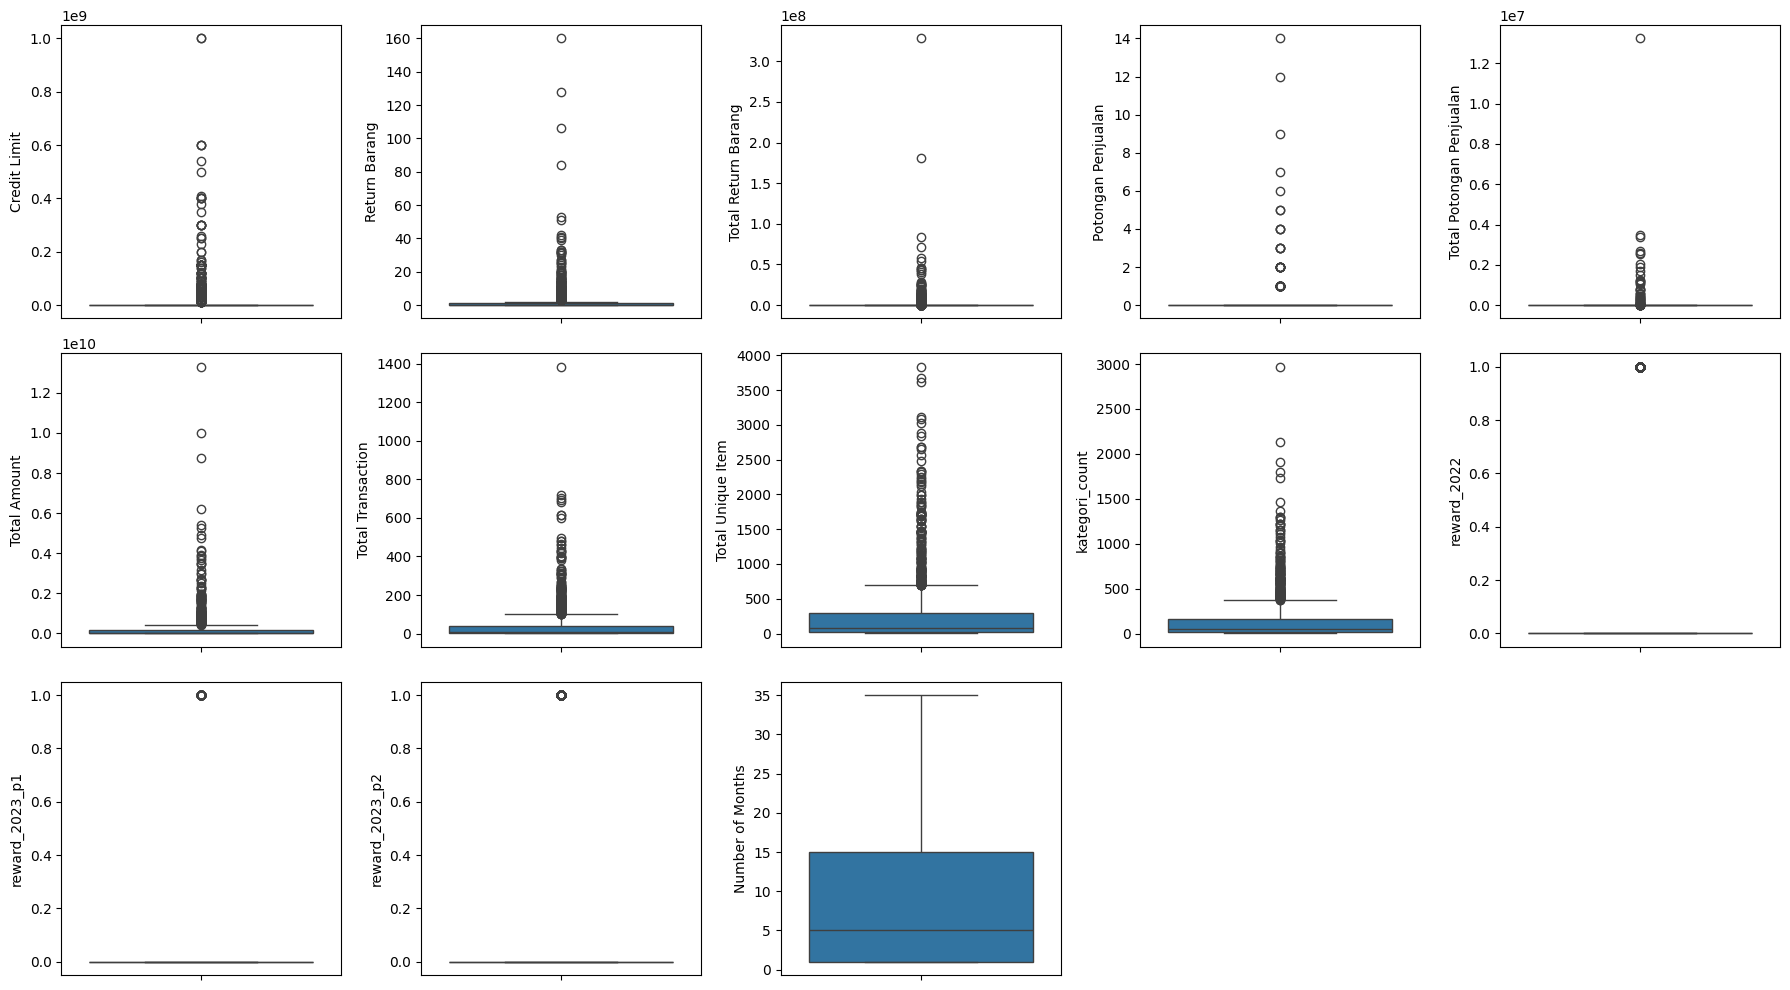

In [101]:
# EDA Menggunakan Boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(numeric)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = df_eda[numeric[i]], orient='v')
    plt.tight_layout()

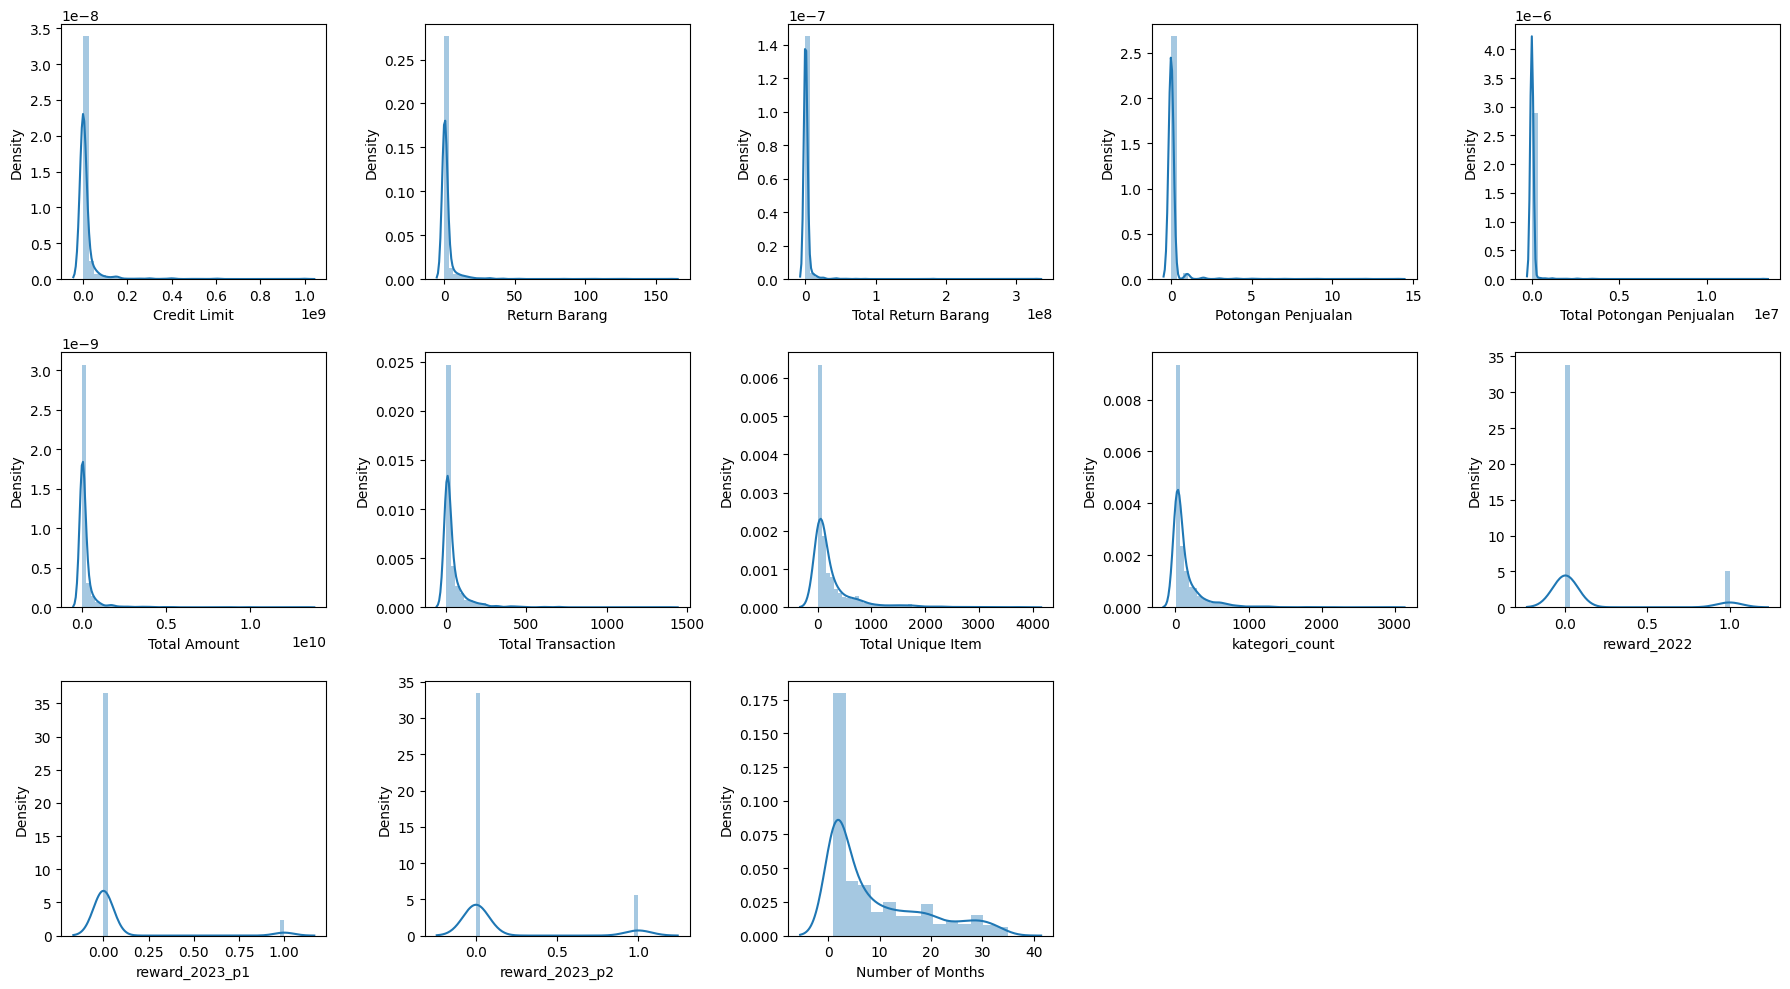

In [102]:
# EDA Menggunakan Histogram dan KDE plot
plt.figure(figsize=(18, 10))
for i in range(0, len(numeric)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df_eda[numeric[i]])
    plt.tight_layout()

In [103]:
# Data Churn pada Dataset
df_eda['Churn'].value_counts()

Churn
N    1192
Y     336
Name: count, dtype: int64

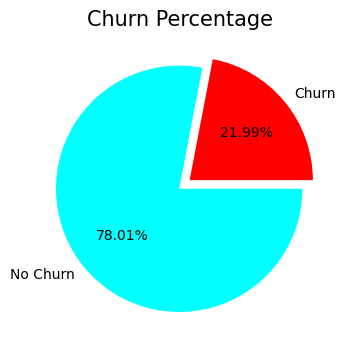

In [104]:
# EDA Churn Menggunakan Pie Chart (Percentage)
data_churn = df_eda['Churn'].value_counts()['Y']
data_no_churn = df_eda['Churn'].value_counts()['N']

plt.figure(figsize=(8, 4))
data = [data_churn, data_no_churn]
explode = [0.1, 0.01]
labels = ['Churn', 'No Churn']
colors = ['red', 'cyan']

plt.pie(data, labels=labels, colors=colors, autopct='%0.2f%%', explode=explode)
plt.title('Churn Percentage', fontsize=15)
plt.show()

Multivariate Analysis

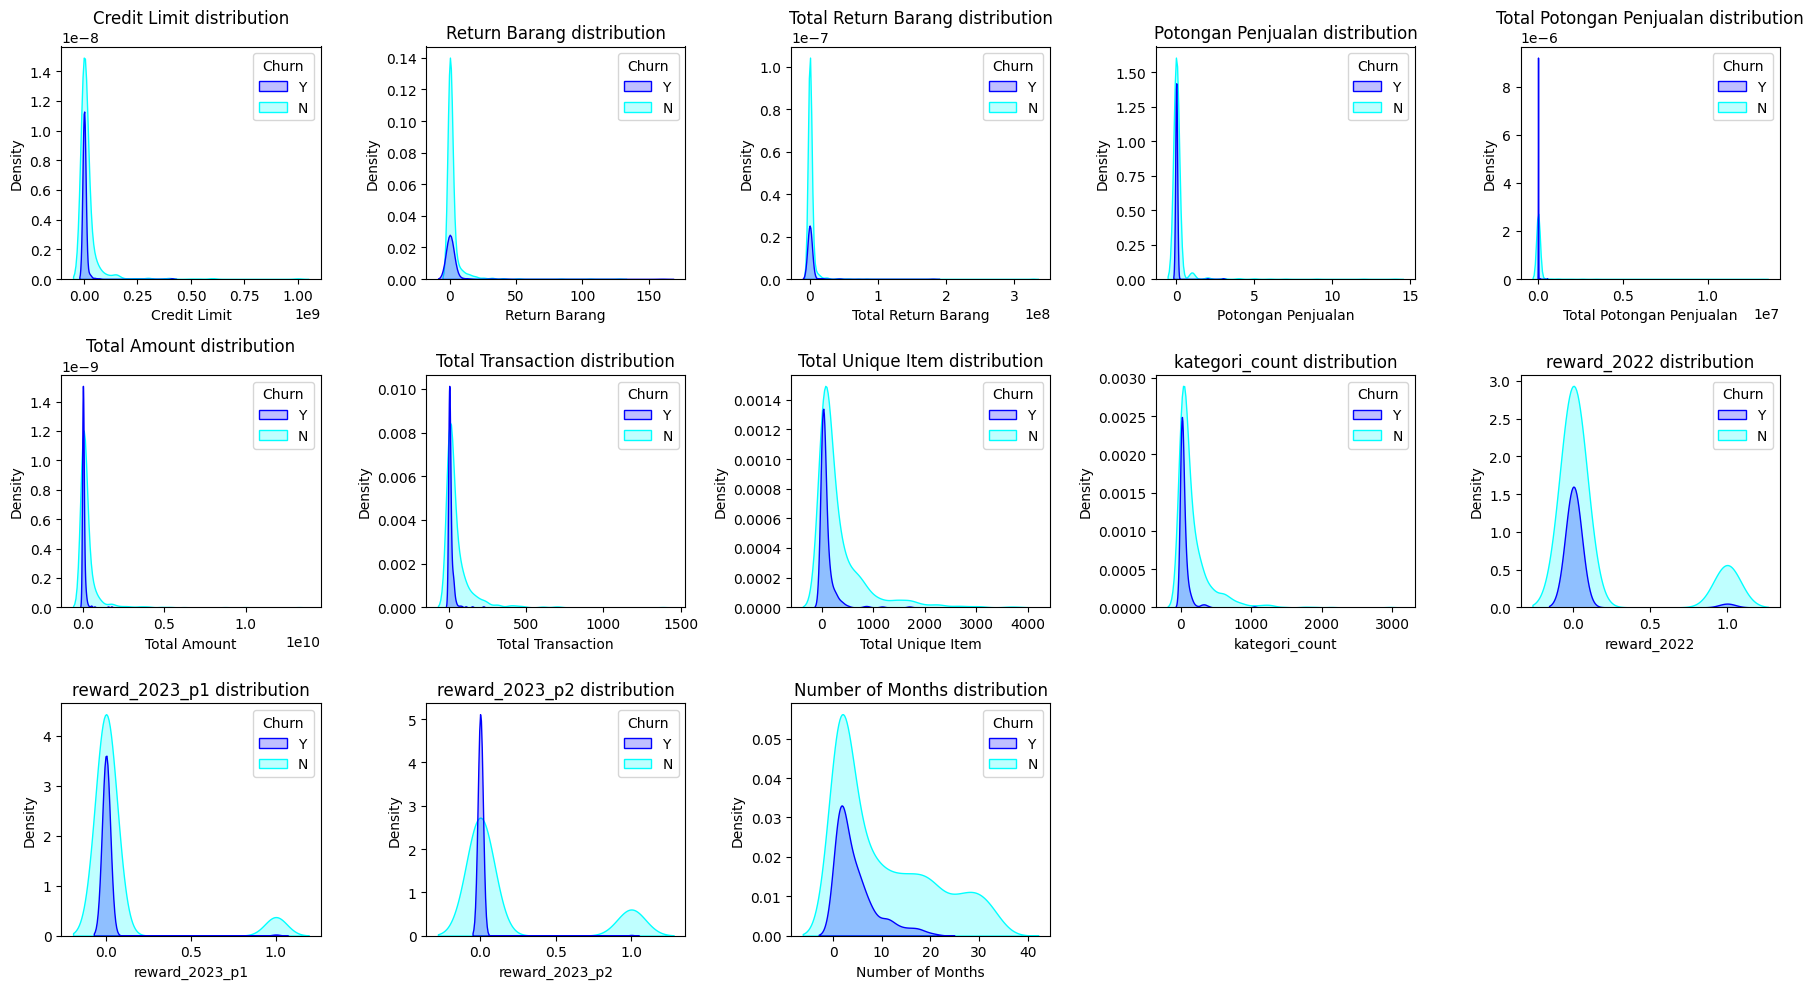

In [105]:
# EDA dengan KDE plot untuk churn
plt.figure(figsize=(18, 10))
for i in range(0, len(numeric)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(df_eda, x=df_eda[numeric[i]], hue=df_eda['Churn'], palette = ['blue', 'cyan'],
                fill=True).set(title=f'{numeric[i]} distribution')
    plt.tight_layout()

<Axes: >

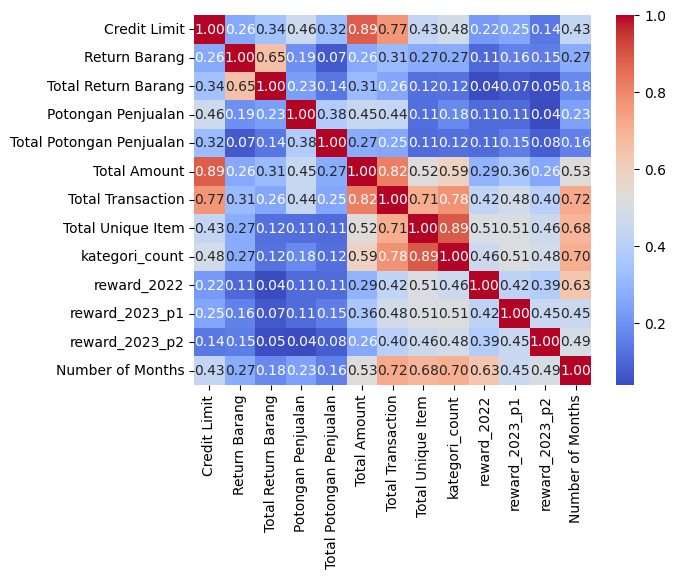

In [106]:
# EDA Menggunakan Correlation Heatmap
correlation = df_eda[numeric].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')

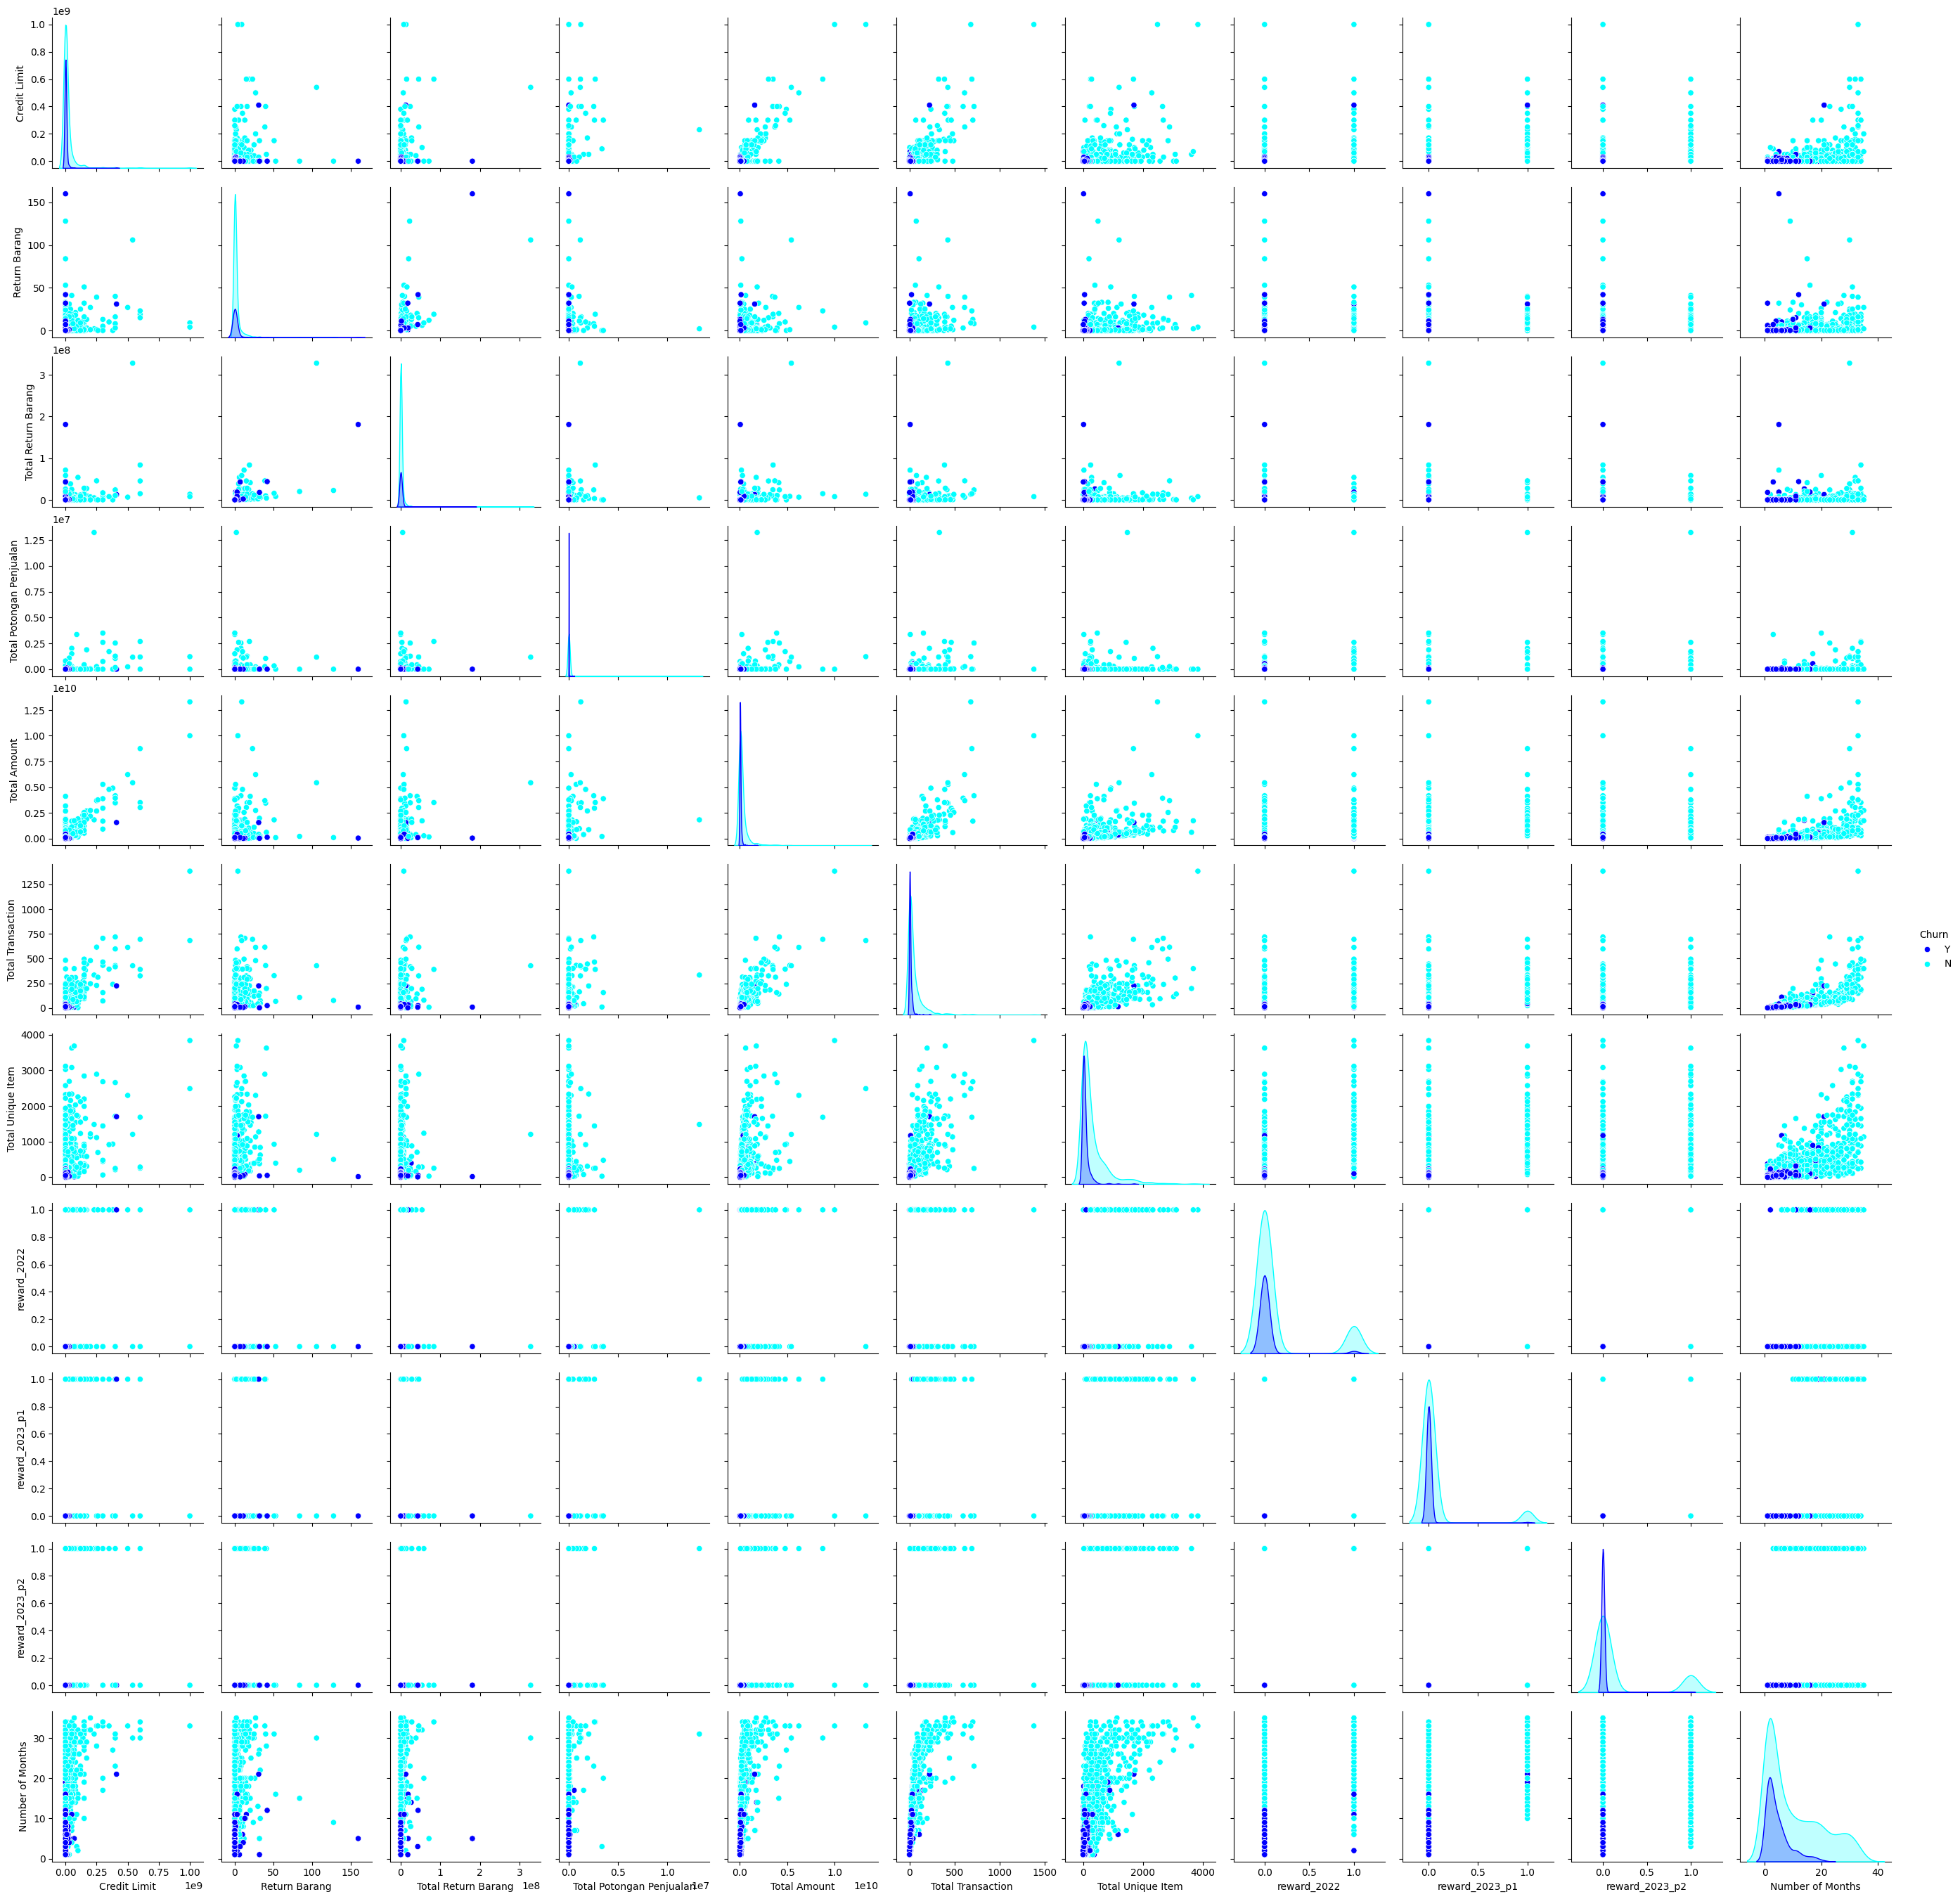

In [107]:
# EDA Menggunakan Pairplot
sns.pairplot(df_eda[['Credit Limit', 'Return Barang', 'Total Return Barang', 'Total Potongan Penjualan', 'Total Amount',
                 'Total Transaction',  'Total Unique Item','Top Category',
                 'Ship-to-Province', 'reward_2022', 'reward_2023_p1', 'reward_2023_p2', 'Number of Months', 'Churn']],
             hue = 'Churn', palette=['blue', 'cyan'])

Descriptive analysis`

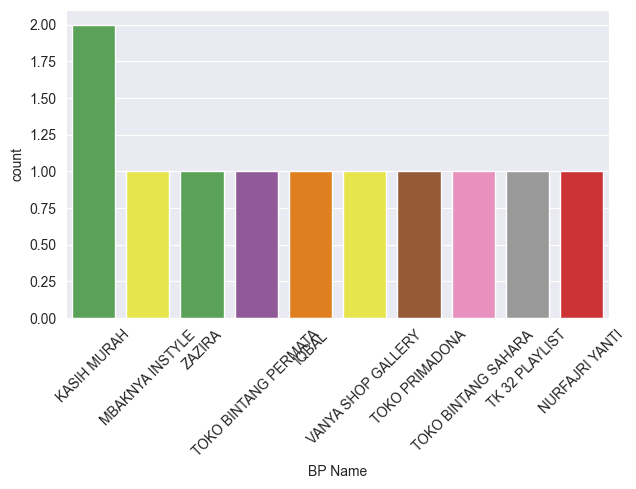

In [108]:
plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')

group_name_counts = df_eda['BP Name'].value_counts()
group_order = group_name_counts.sort_values(ascending=False).index[:10]
sns.countplot(x='BP Name', hue='BP Name', data=df_eda, palette='Set1', order=group_order, legend=False)
plt.xticks(rotation=45)
plt.show()

Tree Map Shipping Type

In [109]:
df_eda_shippingtype_plot =df_eda['Shipping Type'].value_counts().reset_index()
df_eda_shippingtype_plot.columns = ['mode', 'count']
df_eda_shippingtype_plot

fig = px.treemap(df_eda_shippingtype_plot, path = ['mode'],
                 values = 'count',
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

Tree Map Ship To Province

In [110]:
df_eda_shippingprovince_plot =df_eda['Ship-to-Province'].value_counts().reset_index()
df_eda_shippingprovince_plot.columns = ['mode', 'count']
df_eda_shippingprovince_plot

fig = px.treemap(df_eda_shippingprovince_plot, path = ['mode'],
                 values = 'count',
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

Active Customer Comparation

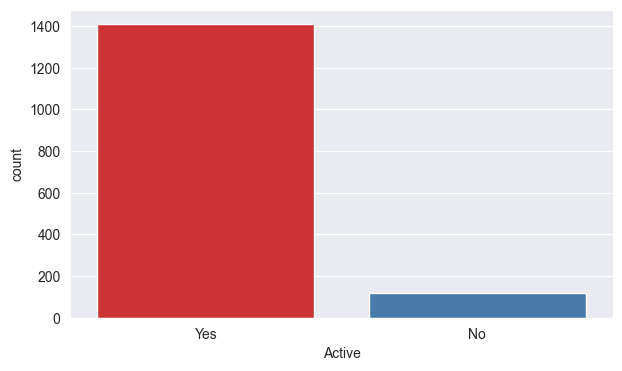

In [111]:
plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')

status_active_customer_counts = df_eda['Active'].value_counts()
active_order = status_active_customer_counts.sort_values(ascending=False).index
sns.countplot(x='Active', hue='Active', data=df_eda, palette='Set1', order=active_order, legend=False)
plt.show()

Price List Comparation

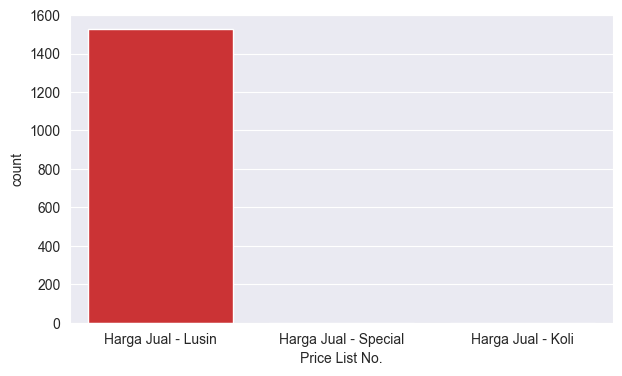

In [112]:
plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')

price_list_no_counts = df_eda['Price List No.'].value_counts()
price_list_no_order = price_list_no_counts.sort_values(ascending=False).index
sns.countplot(x='Price List No.', hue='Price List No.', data=df_eda, palette='Set1', order=price_list_no_order, legend=False)
plt.show()

Churn Comparation

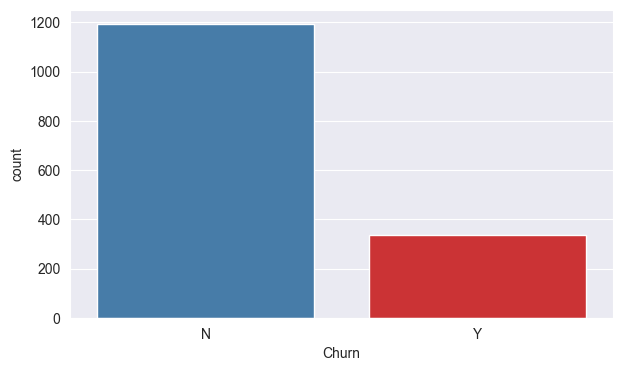

In [113]:
plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')

churn_counts = df_eda['Churn'].value_counts()
churn_order = churn_counts.sort_values(ascending=False).index
sns.countplot(x='Churn', hue='Churn', data=df_eda, palette='Set1', order=churn_order, legend=False)
plt.show()

Cohort Analysis

In [114]:
df_eda.columns

Index(['BP Code', 'BP Name', 'Shipping Type', 'Group Code', 'BP Type',
       'Active', 'Payment Terms Code', 'Price List No.', 'Credit Limit',
       'Sales Employee Code', 'Creation Date', 'Churn', 'Return Barang',
       'Total Return Barang', 'Potongan Penjualan', 'Total Potongan Penjualan',
       'Total Amount', 'Total Transaction', 'Total Unique Item',
       'Top Category', 'kategori_count', 'Ship-to-Province', 'reward_2022',
       'reward_2023_p1', 'reward_2023_p2', 'Number of Months',
       'First Sales Date', 'Last Sales Date', 'New Creation Date'],
      dtype='object')

In [115]:
sales2023_2024.columns

Index(['Canceled', 'Sales Employee Name', 'Document Number', 'Posting Date',
       'Due Date', 'Group Name', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'Payment Terms Code', 'Item No.',
       'Item/Service Description', 'Quantity', 'Unit', 'Price after Discount',
       'Row Total', 'YearMonth'],
      dtype='object')

In [116]:
sales2023_2024['Posting Date'].value_counts().sort_index()

Posting Date
2022-05-09     11
2022-05-10      5
2022-05-12     23
2022-05-13    298
2022-05-14    406
             ... 
2024-03-27    724
2024-03-28    809
2024-03-29    115
2024-03-30    732
2024-03-31    101
Name: count, Length: 640, dtype: int64

<Axes: xlabel='Posting Date', ylabel='Count'>

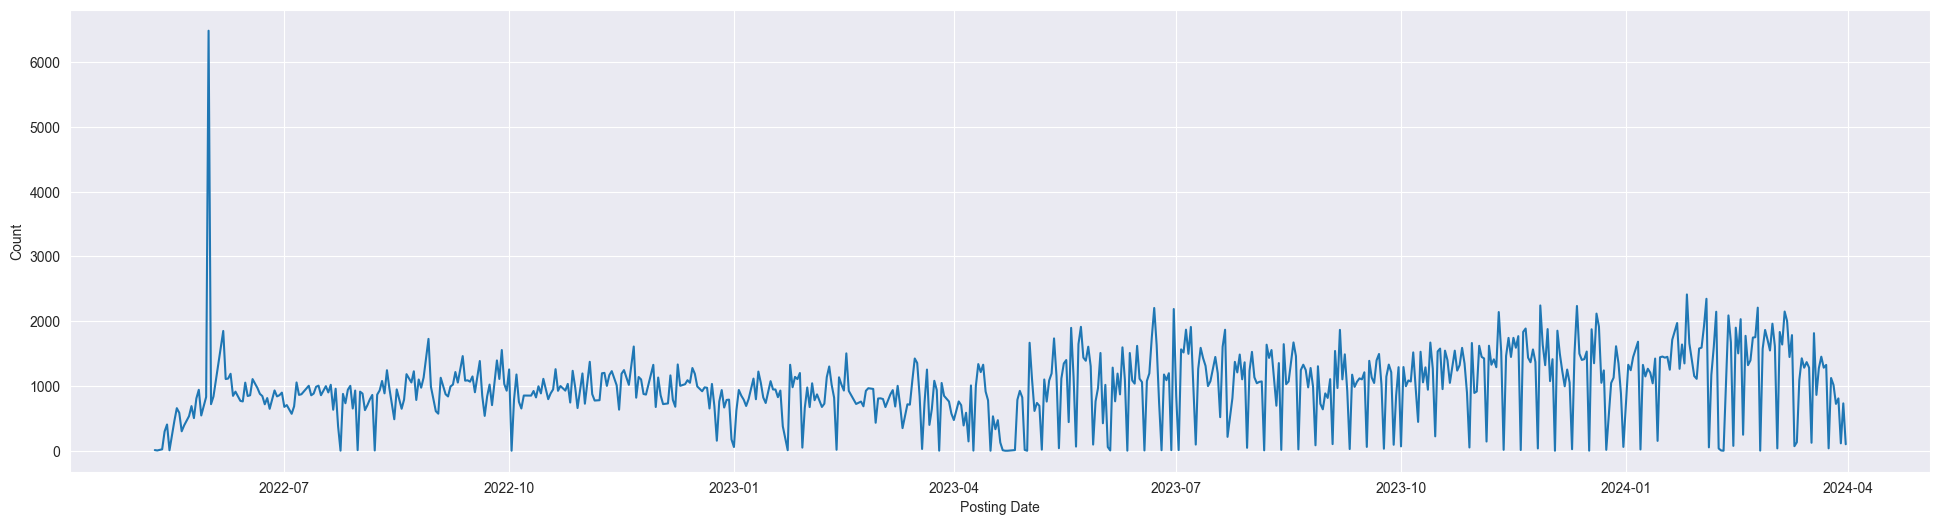

In [117]:
cust_per_date1 = sales2023_2024['Posting Date'].value_counts().sort_index().reset_index()
cust_per_date1.columns = ['Posting Date', 'Count']
plt.figure(figsize=(24,6))
sns.lineplot(data=cust_per_date1, x='Posting Date', y='Count')

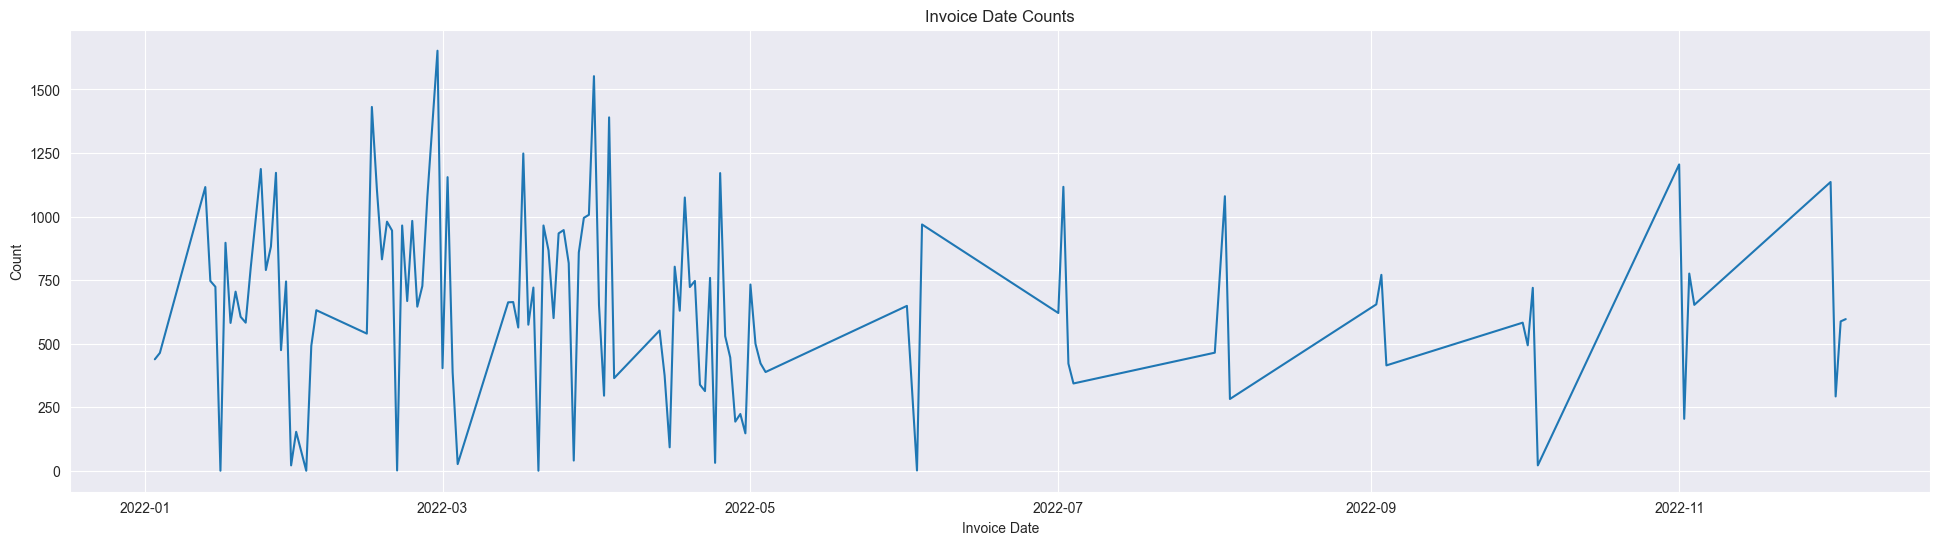

In [118]:
cust_per_date2 = sales2022['Invoice Date'].value_counts().sort_index().reset_index()
cust_per_date2.columns = ['Invoice Date', 'Count']

# Plot the data
plt.figure(figsize=(24, 6))
sns.lineplot(data=cust_per_date2, x='Invoice Date', y='Count')
plt.title('Invoice Date Counts')
plt.show()

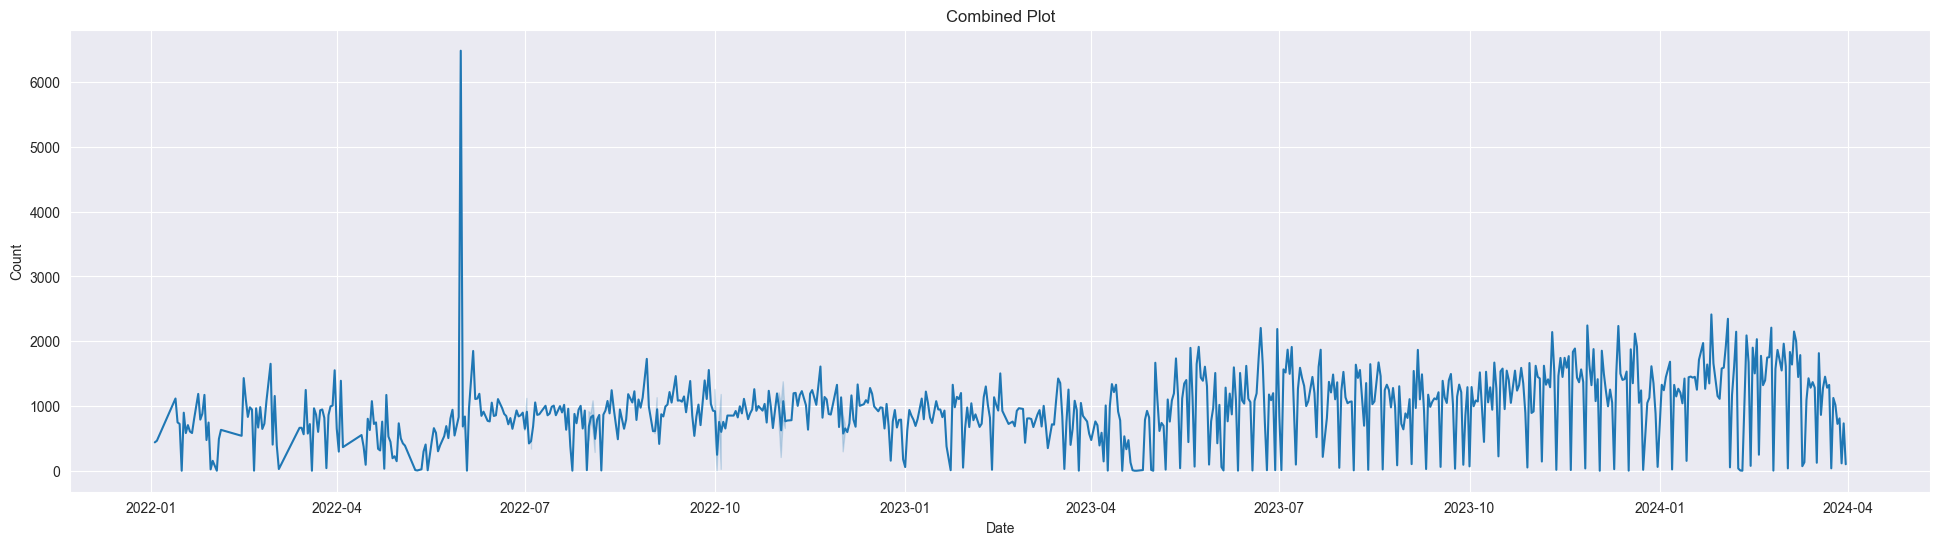

In [119]:
# Rename the 'Posting Date' column to 'Date' in sales2023_2024

cust_per_date1.rename(columns={'Posting Date': 'Date'}, inplace=True)

# Rename the 'Invoice Date' column to 'Date' in cust_per_date
cust_per_date2.rename(columns={'Invoice Date': 'Date'}, inplace=True)

frames = [cust_per_date1, cust_per_date2]
merged_df = pd.concat(frames)
# Plot the 'Row Total' lineplot
plt.figure(figsize=(24, 6))
sns.lineplot(data=merged_df, x='Date', y='Count')

# Plot the 'Count' lineplot
#sns.lineplot(data=merged_df, x='Date', y='Count', label='Count')

plt.title('Combined Plot')
plt.show()

In [120]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    751 non-null    datetime64[ns]
 1   Count   751 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.6 KB


In [121]:
# # Assuming df is your DataFrame and it has columns 'user_id', 'date', and 'app_launched'
# # Convert 'date' to datetime format
# merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# # Create a cohort based on the first date each user launched the app
# merged_df['cohort'] = merged_df.groupby('Count')['Date'].transform('min')

# # Calculate the number of days since the first app launch for each user
# merged_df['days_since_launch'] = (merged_df['Date'] - merged_df['cohort']).dt.days

# # Create a pivot table with cohorts as rows, days since launch as columns, and the sum of 'app_launched' as values
# pivot = pd.pivot_table(merged_df, values='app_launched', index=merged_df['cohort'].dt.date, columns='days_since_launch', aggfunc=np.sum)

# # Calculate the percentage of active users for each day after launch
# percentage_active_users = pivot.divide(pivot[0], axis=0) * 100

In [122]:
cols_to_drop = [
    'BP Code',
    'BP Name',
    'Creation Date',
    'BP Type',
    'Price List No.',
    'Sales Employee Code'
]

In [123]:
# Step 1: Get the top 20 shipping types
top_20_shipping_types = customer_add['Shipping Type'].value_counts().nlargest().index

# Step 3: Assign 'Others' to non-top 20 types
customer_add.loc[~customer_add['Shipping Type'].isin(top_20_shipping_types), 'Shipping Type'] = 'Others'

# Now 'Categorized Shipping Type' contains the desired categories
print(customer_add['Shipping Type'].head())

0         Others
1    LARIS CARGO
2         Others
3         Others
4         Others
Name: Shipping Type, dtype: object


<Axes: ylabel='Frequency'>

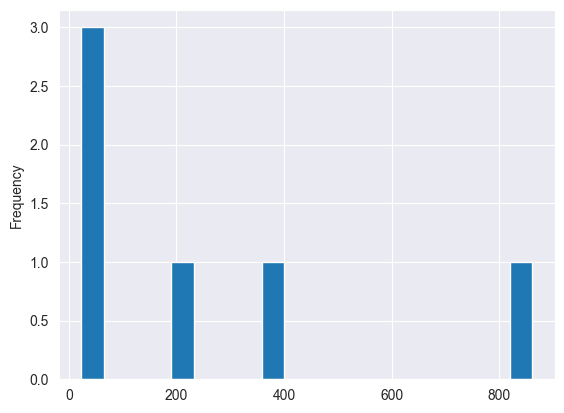

In [124]:
customer_add['Shipping Type'].value_counts().plot(kind='hist', bins=20)

In [125]:
customer_add['Shipping Type'].unique()

array(['Others', 'LARIS CARGO', 'KURIR TOKO', 'JNT CARGO', 'SURYA PAGI',
       'DGH'], dtype=object)

group name & active masih bisa diencode utk jadi feature tambahan

In [126]:
cust_data = customer_add.drop(cols_to_drop, axis=1)

In [127]:
cust_data = cust_data.rename(columns={'New Creation Date':'Creation Date',
                                      'Payment Terms Code':'Payments'}) 

In [128]:
old_column_names = list(cust_data.columns)
column_name_mapping = {}

for old_name in old_column_names:
    new_name = old_name.lower().replace(' ', '_').replace('-', '_')
    column_name_mapping[old_name] = new_name

# Rename the columns using the mapping
cust_data.rename(columns=column_name_mapping, inplace=True)

In [129]:
cust_data['payments'] = cust_data['payments'].str.replace(' Days', '').replace('COD',1)

In [130]:
cust_data['payments'].value_counts()

payments
0     1210
30     162
14      79
7       39
1       26
21       7
45       3
60       2
Name: count, dtype: int64

In [131]:
cust_data

shipping_type group_code active payments  credit_limit churn   
0           Others         C0    Yes        0          0.00     Y  \
1      LARIS CARGO         C2    Yes       14   30000000.00     N   
2           Others         C4    Yes        0          0.00     N   
3           Others          C    Yes       14   20000000.00     N   
4           Others         C8    Yes        0          0.00     N   
...            ...        ...    ...      ...           ...   ...   
1523    KURIR TOKO        K03     No        0          0.00     Y   
1524        Others        K03     No        7          0.00     Y   
1525        Others        K03     No        7          0.00     Y   
1526        Others        K03     No        0          0.00     Y   
1527        Others         C3     No        0          0.00     Y   

      return_barang  total_return_barang  potongan_penjualan   
0                 0                 0.00                   0  \
1                 1             51000.00                   0   
2                 1            330000.00                   0   
3                 0                 0.00                   0   
4                 0                 0.00                   0   
...             ...                  ...                 ...   
1523              0                 0.00                   0   
1524              0                 0.00                   0   
1525              0                 0.00                   0   
1526              0                 0.00                   0   
1527              0                 0.00                   0   

      total_potongan_penjualan  total_amount  total_transaction   
0                         0.00   26743500.00               6.00  \
1                         0.00  300811175.00              97.00   
2                         0.00   81977262.00              16.00   
3                         0.00   71799000.00              35.00   
4                         0.00  109386000.00              23.00   
...                        ...           ...                ...   
1523                      0.00    2083500.00               2.00   
1524                      0.00   39127000.00               4.00   
1525                      0.00    2175000.00               1.00   
1526                      0.00          0.00               5.00   
1527                      0.00   98820000.00              14.00   

      total_unique_item       top_category  kategori_count   
0                 71.00  AKSESORIES CAMPUR           23.00  \
1                724.00       TAS & DOMPET          258.00   
2                290.00  AKSESORIES CAMPUR          115.00   
3                250.00       TAS & DOMPET          153.00   
4                147.00       TAS & DOMPET           75.00   
...                 ...                ...             ...   
1523               2.00  AKSESORIES CAMPUR            2.00   
1524              37.00  AKSESORIES CAMPUR           13.00   
1525               1.00       ALAT MAKE UP            1.00   
1526              26.00   AKSESORIS RAMBUT           32.00   
1527              51.00       TAS & DOMPET           39.00   

        ship_to_province  reward_2022  reward_2023_p1  reward_2023_p2   
0                   ACEH         0.00            0.00            0.00  \
1                   ACEH         0.00            0.00            1.00   
2                   ACEH         0.00            0.00            0.00   
3                   ACEH         0.00            0.00            0.00   
4                   ACEH         0.00            0.00            0.00   
...                  ...          ...             ...             ...   
1523         DKI JAKARTA         0.00            0.00            0.00   
1524      SUMATERA BARAT         0.00            0.00            0.00   
1525      SUMATERA BARAT         0.00            0.00            0.00   
1526      SUMATERA BARAT         0.00            0.00            0.00   
1527  KALIMANTAN SELATAN         0.00            0.00 

In [132]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   shipping_type             1528 non-null   object        
 1   group_code                1528 non-null   object        
 2   active                    1528 non-null   object        
 3   payments                  1528 non-null   object        
 4   credit_limit              1528 non-null   float64       
 5   churn                     1528 non-null   object        
 6   return_barang             1528 non-null   int64         
 7   total_return_barang       1528 non-null   float64       
 8   potongan_penjualan        1528 non-null   int64         
 9   total_potongan_penjualan  1528 non-null   float64       
 10  total_amount              1528 non-null   float64       
 11  total_transaction         1528 non-null   float64       
 12  total_unique_item   

In [133]:
# Convert date columns to datetime format
cust_data['creation_date'] = pd.to_datetime(cust_data['creation_date'])
cust_data['first_sales_date'] = pd.to_datetime(cust_data['first_sales_date'])
cust_data['last_sales_date'] = pd.to_datetime(cust_data['last_sales_date'])

In [134]:
# Define a function to compare creation_date with first_sales_date
def revise_creation_date(row):
    if row['creation_date'] > row['first_sales_date']:
        return row['first_sales_date']
    else:
        return row['creation_date']

# Apply the function to revise creation_date
cust_data['creation_date'] = cust_data.apply(revise_creation_date, axis=1)

In [135]:
cust_data

shipping_type group_code active payments  credit_limit churn   
0           Others         C0    Yes        0          0.00     Y  \
1      LARIS CARGO         C2    Yes       14   30000000.00     N   
2           Others         C4    Yes        0          0.00     N   
3           Others          C    Yes       14   20000000.00     N   
4           Others         C8    Yes        0          0.00     N   
...            ...        ...    ...      ...           ...   ...   
1523    KURIR TOKO        K03     No        0          0.00     Y   
1524        Others        K03     No        7          0.00     Y   
1525        Others        K03     No        7          0.00     Y   
1526        Others        K03     No        0          0.00     Y   
1527        Others         C3     No        0          0.00     Y   

      return_barang  total_return_barang  potongan_penjualan   
0                 0                 0.00                   0  \
1                 1             51000.00                   0   
2                 1            330000.00                   0   
3                 0                 0.00                   0   
4                 0                 0.00                   0   
...             ...                  ...                 ...   
1523              0                 0.00                   0   
1524              0                 0.00                   0   
1525              0                 0.00                   0   
1526              0                 0.00                   0   
1527              0                 0.00                   0   

      total_potongan_penjualan  total_amount  total_transaction   
0                         0.00   26743500.00               6.00  \
1                         0.00  300811175.00              97.00   
2                         0.00   81977262.00              16.00   
3                         0.00   71799000.00              35.00   
4                         0.00  109386000.00              23.00   
...                        ...           ...                ...   
1523                      0.00    2083500.00               2.00   
1524                      0.00   39127000.00               4.00   
1525                      0.00    2175000.00               1.00   
1526                      0.00          0.00               5.00   
1527                      0.00   98820000.00              14.00   

      total_unique_item       top_category  kategori_count   
0                 71.00  AKSESORIES CAMPUR           23.00  \
1                724.00       TAS & DOMPET          258.00   
2                290.00  AKSESORIES CAMPUR          115.00   
3                250.00       TAS & DOMPET          153.00   
4                147.00       TAS & DOMPET           75.00   
...                 ...                ...             ...   
1523               2.00  AKSESORIES CAMPUR            2.00   
1524              37.00  AKSESORIES CAMPUR           13.00   
1525               1.00       ALAT MAKE UP            1.00   
1526              26.00   AKSESORIS RAMBUT           32.00   
1527              51.00       TAS & DOMPET           39.00   

        ship_to_province  reward_2022  reward_2023_p1  reward_2023_p2   
0                   ACEH         0.00            0.00            0.00  \
1                   ACEH         0.00            0.00            1.00   
2                   ACEH         0.00            0.00            0.00   
3                   ACEH         0.00            0.00            0.00   
4                   ACEH         0.00            0.00            0.00   
...                  ...          ...             ...             ...   
1523         DKI JAKARTA         0.00            0.00            0.00   
1524      SUMATERA BARAT         0.00            0.00            0.00   
1525      SUMATERA BARAT         0.00            0.00            0.00   
1526      SUMATERA BARAT         0.00            0.00            0.00   
1527  KALIMANTAN SELATAN         0.00            0.00 

In [136]:
# Calculate create_to_first_sales (days/30) and round to 2 decimal places
cust_data['create_to_first_sales'] = round((cust_data['first_sales_date'] - cust_data['creation_date']).dt.days / 30, 2)

# Calculate recency (days/30) and round to 2 decimal places
reference_date = pd.to_datetime('2024-03-31')
#cust_data['recency'] = round((reference_date - cust_data['last_sales_date']).dt.days / 30, 2)

# Calculate tenure (days/30) and round to 2 decimal places
cust_data['tenure'] = round((reference_date - cust_data['creation_date']).dt.days / 30, 2)

In [137]:
cust_data.drop(columns=['first_sales_date', 'last_sales_date', 'creation_date'], inplace=True)

In [138]:
cust_data.drop(['active','group_code'], axis=1)

shipping_type payments  credit_limit churn  return_barang   
0           Others        0          0.00     Y              0  \
1      LARIS CARGO       14   30000000.00     N              1   
2           Others        0          0.00     N              1   
3           Others       14   20000000.00     N              0   
4           Others        0          0.00     N              0   
...            ...      ...           ...   ...            ...   
1523    KURIR TOKO        0          0.00     Y              0   
1524        Others        7          0.00     Y              0   
1525        Others        7          0.00     Y              0   
1526        Others        0          0.00     Y              0   
1527        Others        0          0.00     Y              0   

      total_return_barang  potongan_penjualan  total_potongan_penjualan   
0                    0.00                   0                      0.00  \
1                51000.00                   0                      0.00   
2               330000.00                   0                      0.00   
3                    0.00                   0                      0.00   
4                    0.00                   0                      0.00   
...                   ...                 ...                       ...   
1523                 0.00                   0                      0.00   
1524                 0.00                   0                      0.00   
1525                 0.00                   0                      0.00   
1526                 0.00                   0                      0.00   
1527                 0.00                   0                      0.00   

      total_amount  total_transaction  total_unique_item       top_category   
0      26743500.00               6.00              71.00  AKSESORIES CAMPUR  \
1     300811175.00              97.00             724.00       TAS & DOMPET   
2      81977262.00              16.00             290.00  AKSESORIES CAMPUR   
3      71799000.00              35.00             250.00       TAS & DOMPET   
4     109386000.00              23.00             147.00       TAS & DOMPET   
...            ...                ...                ...                ...   
1523    2083500.00               2.00               2.00  AKSESORIES CAMPUR   
1524   39127000.00               4.00              37.00  AKSESORIES CAMPUR   
1525    2175000.00               1.00               1.00       ALAT MAKE UP   
1526          0.00               5.00              26.00   AKSESORIS RAMBUT   
1527   98820000.00              14.00              51.00       TAS & DOMPET   

      kategori_count    ship_to_province  reward_2022  reward_2023_p1   
0              23.00                ACEH         0.00            0.00  \
1             258.00                ACEH         0.00            0.00   
2             115.00                ACEH         0.00            0.00   
3             153.00                ACEH         0.00            0.00   
4              75.00                ACEH         0.00            0.00   
...              ...                 ...          ...             ...   
1523            2.00         DKI JAKARTA         0.00            0.00   
1524           13.00      SUMATERA BARAT         0.00            0.00   
1525            1.00      SUMATERA BARAT         0.00            0.00   
1526           32.00      SUMATERA BARAT         0.00            0.00   
1527           39.00  KALIMANTAN SELATAN         0.00            0.00   

      reward_2023_p2  number_of_months  create_to_first_sales  tenure  
0               0.00              4.00                   0.00   26.63  
1               1.00             25.00                   0.00   26.57  
2               0.00             11.00                   0.00   25.70  
3               0.00             15.00                   0.00   26.63  
4               0.00             13.00                   0.00   25.40  
...              ...               ...               

In [139]:
cust_data['avg_amount'] = round(cust_data['total_amount'] / cust_data['number_of_months'], 2)

In [140]:
cust_data.drop(columns=['total_amount','group_code','active'], inplace=True)

Remove Outlier 

In [141]:
def remove_outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
 
    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df[col] >= upper)[0]
    lower_array = np.where(df[col] <= lower)[0]
 
    # Removing the outliers
    df[col].drop(index=upper_array, inplace=True)
    df[col].drop(index=lower_array, inplace=True)

In [142]:
column = ['credit_limit', 'return_barang',
       'total_return_barang', 'potongan_penjualan', 'total_potongan_penjualan',
       'total_transaction', 'total_unique_item', 
       'kategori_count',
       'avg_amount']
for col in column:
    remove_outlier(cust_data,col)

In [143]:
cust_data

shipping_type payments  credit_limit churn  return_barang   
0           Others        0          0.00     Y              0  \
1      LARIS CARGO       14   30000000.00     N              1   
2           Others        0          0.00     N              1   
3           Others       14   20000000.00     N              0   
4           Others        0          0.00     N              0   
...            ...      ...           ...   ...            ...   
1523    KURIR TOKO        0          0.00     Y              0   
1524        Others        7          0.00     Y              0   
1525        Others        7          0.00     Y              0   
1526        Others        0          0.00     Y              0   
1527        Others        0          0.00     Y              0   

      total_return_barang  potongan_penjualan  total_potongan_penjualan   
0                    0.00                   0                      0.00  \
1                51000.00                   0                      0.00   
2               330000.00                   0                      0.00   
3                    0.00                   0                      0.00   
4                    0.00                   0                      0.00   
...                   ...                 ...                       ...   
1523                 0.00                   0                      0.00   
1524                 0.00                   0                      0.00   
1525                 0.00                   0                      0.00   
1526                 0.00                   0                      0.00   
1527                 0.00                   0                      0.00   

      total_transaction  total_unique_item       top_category  kategori_count   
0                  6.00              71.00  AKSESORIES CAMPUR           23.00  \
1                 97.00             724.00       TAS & DOMPET          258.00   
2                 16.00             290.00  AKSESORIES CAMPUR          115.00   
3                 35.00             250.00       TAS & DOMPET          153.00   
4                 23.00             147.00       TAS & DOMPET           75.00   
...                 ...                ...                ...             ...   
1523               2.00               2.00  AKSESORIES CAMPUR            2.00   
1524               4.00              37.00  AKSESORIES CAMPUR           13.00   
1525               1.00               1.00       ALAT MAKE UP            1.00   
1526               5.00              26.00   AKSESORIS RAMBUT           32.00   
1527              14.00              51.00       TAS & DOMPET           39.00   

        ship_to_province  reward_2022  reward_2023_p1  reward_2023_p2   
0                   ACEH         0.00            0.00            0.00  \
1                   ACEH         0.00            0.00            1.00   
2                   ACEH         0.00            0.00            0.00   
3                   ACEH         0.00            0.00            0.00   
4                   ACEH         0.00            0.00            0.00   
...                  ...          ...             ...             ...   
1523         DKI JAKARTA         0.00            0.00            0.00   
1524      SUMATERA BARAT         0.00            0.00            0.00   
1525      SUMATERA BARAT         0.00            0.00            0.00   
1526      SUMATERA BARAT         0.00            0.00            0.00   
1527  KALIMANTAN SELATAN         0.00            0.00            0.00   

      number_of_months  create_to_first_sales  tenure  avg_amount  
0                 4.00                   0.00   26.63  6685875.00  
1                25.00                   0.00   26.57 12032447.00  
2                11.00                   0.00   25.70  7452478.36  
3                15.00                   0.00   26.63  4786600.00  
4                13.00                   0.00   25.40  8414307.69  
...                ...                    ...     ...

In [144]:
cust_data_churn = cust_data[cust_data['churn']=='y']
cust_data_churn['avg_amount'].mean()

nan

In [145]:
cust_data_no_churn = cust_data[cust_data['churn']=='n']
cust_data_no_churn['avg_amount'].mean()

nan

In [146]:
cust_data['churn'] = cust_data['churn'].replace('Y', 1).replace('N', 0)

hasil encoding feature churn & active

In [147]:
cust_data

shipping_type payments  credit_limit  churn  return_barang   
0           Others        0          0.00      1              0  \
1      LARIS CARGO       14   30000000.00      0              1   
2           Others        0          0.00      0              1   
3           Others       14   20000000.00      0              0   
4           Others        0          0.00      0              0   
...            ...      ...           ...    ...            ...   
1523    KURIR TOKO        0          0.00      1              0   
1524        Others        7          0.00      1              0   
1525        Others        7          0.00      1              0   
1526        Others        0          0.00      1              0   
1527        Others        0          0.00      1              0   

      total_return_barang  potongan_penjualan  total_potongan_penjualan   
0                    0.00                   0                      0.00  \
1                51000.00                   0                      0.00   
2               330000.00                   0                      0.00   
3                    0.00                   0                      0.00   
4                    0.00                   0                      0.00   
...                   ...                 ...                       ...   
1523                 0.00                   0                      0.00   
1524                 0.00                   0                      0.00   
1525                 0.00                   0                      0.00   
1526                 0.00                   0                      0.00   
1527                 0.00                   0                      0.00   

      total_transaction  total_unique_item       top_category  kategori_count   
0                  6.00              71.00  AKSESORIES CAMPUR           23.00  \
1                 97.00             724.00       TAS & DOMPET          258.00   
2                 16.00             290.00  AKSESORIES CAMPUR          115.00   
3                 35.00             250.00       TAS & DOMPET          153.00   
4                 23.00             147.00       TAS & DOMPET           75.00   
...                 ...                ...                ...             ...   
1523               2.00               2.00  AKSESORIES CAMPUR            2.00   
1524               4.00              37.00  AKSESORIES CAMPUR           13.00   
1525               1.00               1.00       ALAT MAKE UP            1.00   
1526               5.00              26.00   AKSESORIS RAMBUT           32.00   
1527              14.00              51.00       TAS & DOMPET           39.00   

        ship_to_province  reward_2022  reward_2023_p1  reward_2023_p2   
0                   ACEH         0.00            0.00            0.00  \
1                   ACEH         0.00            0.00            1.00   
2                   ACEH         0.00            0.00            0.00   
3                   ACEH         0.00            0.00            0.00   
4                   ACEH         0.00            0.00            0.00   
...                  ...          ...             ...             ...   
1523         DKI JAKARTA         0.00            0.00            0.00   
1524      SUMATERA BARAT         0.00            0.00            0.00   
1525      SUMATERA BARAT         0.00            0.00            0.00   
1526      SUMATERA BARAT         0.00            0.00            0.00   
1527  KALIMANTAN SELATAN         0.00            0.00            0.00   

      number_of_months  create_to_first_sales  tenure  avg_amount  
0                 4.00                   0.00   26.63  6685875.00  
1                25.00                   0.00   26.57 12032447.00  
2                11.00                   0.00   25.70  7452478.36  
3                15.00                   0.00   26.63  4786600.00  
4                13.00                   0.00   25.40  8414307.69  
...                ...                   

In [148]:
hot=['top_category','ship_to_province','shipping_type']
   
# One-hot encoding
for cat in hot:
    onehots = pd.get_dummies(cust_data[cat], prefix=cat)
    cust_data = cust_data.join(onehots)

# Drop original columns
encode_data = cust_data.drop(columns=hot).copy()

# Fill NaN values with 0
encode_data.fillna(0, inplace=True)

# Convert to integer
encode_data = encode_data.astype(float)

Hasil encode top category, ship to province

In [149]:
encode_data

payments  credit_limit  churn  return_barang  total_return_barang   
0         0.00          0.00   1.00           0.00                 0.00  \
1        14.00   30000000.00   0.00           1.00             51000.00   
2         0.00          0.00   0.00           1.00            330000.00   
3        14.00   20000000.00   0.00           0.00                 0.00   
4         0.00          0.00   0.00           0.00                 0.00   
...        ...           ...    ...            ...                  ...   
1523      0.00          0.00   1.00           0.00                 0.00   
1524      7.00          0.00   1.00           0.00                 0.00   
1525      7.00          0.00   1.00           0.00                 0.00   
1526      0.00          0.00   1.00           0.00                 0.00   
1527      0.00          0.00   1.00           0.00                 0.00   

      potongan_penjualan  total_potongan_penjualan  total_transaction   
0                   0.00                      0.00               6.00  \
1                   0.00                      0.00              97.00   
2                   0.00                      0.00              16.00   
3                   0.00                      0.00              35.00   
4                   0.00                      0.00              23.00   
...                  ...                       ...                ...   
1523                0.00                      0.00               2.00   
1524                0.00                      0.00               4.00   
1525                0.00                      0.00               1.00   
1526                0.00                      0.00               5.00   
1527                0.00                      0.00              14.00   

      total_unique_item  kategori_count  reward_2022  reward_2023_p1   
0                 71.00           23.00         0.00            0.00  \
1                724.00          258.00         0.00            0.00   
2                290.00          115.00         0.00            0.00   
3                250.00          153.00         0.00            0.00   
4                147.00           75.00         0.00            0.00   
...                 ...             ...          ...             ...   
1523               2.00            2.00         0.00            0.00   
1524              37.00           13.00         0.00            0.00   
1525               1.00            1.00         0.00            0.00   
1526              26.00           32.00         0.00            0.00   
1527              51.00           39.00         0.00            0.00   

      reward_2023_p2  number_of_months  create_to_first_sales  tenure   
0               0.00              4.00                   0.00   26.63  \
1               1.00             25.00                   0.00   26.57   
2               0.00             11.00                   0.00   25.70   
3               0.00             15.00                   0.00   26.63   
4               0.00             13.00                   0.00   25.40   
...              ...               ...                    ...     ...   
1523            0.00              2.00                   0.00   19.17   
1524            0.00              3.00                   0.00   26.93   
1525            0.00              1.00                   0.00   25.60   
1526            0.00              3.00                   0.00   26.47   
1527            0.00              4.00                   0.00   25.87   

      avg_amount  top_category_AKSESORIES CAMPUR  top_category_AKSESORIS   
0     6685875.00                            1.00                    0.00  \
1    12032447.00                            0.00                    0.00   
2     7452478.36                            1.00                    0.00   
3     4786600.00                            0.00                    0.00   
4     8414307.69                            0.00                    0.00   
...          ...              

In [150]:
old_column_names_en = list(encode_data.columns)
column_name_mapping_en = {}

for old_name in old_column_names_en:
    new_name = old_name.replace(' ', '_').replace('-', '_')
    column_name_mapping_en[old_name] = new_name

# Rename the columns using the mapping
encode_data.rename(columns=column_name_mapping_en, inplace=True)

In [151]:
encode_data

payments  credit_limit  churn  return_barang  total_return_barang   
0         0.00          0.00   1.00           0.00                 0.00  \
1        14.00   30000000.00   0.00           1.00             51000.00   
2         0.00          0.00   0.00           1.00            330000.00   
3        14.00   20000000.00   0.00           0.00                 0.00   
4         0.00          0.00   0.00           0.00                 0.00   
...        ...           ...    ...            ...                  ...   
1523      0.00          0.00   1.00           0.00                 0.00   
1524      7.00          0.00   1.00           0.00                 0.00   
1525      7.00          0.00   1.00           0.00                 0.00   
1526      0.00          0.00   1.00           0.00                 0.00   
1527      0.00          0.00   1.00           0.00                 0.00   

      potongan_penjualan  total_potongan_penjualan  total_transaction   
0                   0.00                      0.00               6.00  \
1                   0.00                      0.00              97.00   
2                   0.00                      0.00              16.00   
3                   0.00                      0.00              35.00   
4                   0.00                      0.00              23.00   
...                  ...                       ...                ...   
1523                0.00                      0.00               2.00   
1524                0.00                      0.00               4.00   
1525                0.00                      0.00               1.00   
1526                0.00                      0.00               5.00   
1527                0.00                      0.00              14.00   

      total_unique_item  kategori_count  reward_2022  reward_2023_p1   
0                 71.00           23.00         0.00            0.00  \
1                724.00          258.00         0.00            0.00   
2                290.00          115.00         0.00            0.00   
3                250.00          153.00         0.00            0.00   
4                147.00           75.00         0.00            0.00   
...                 ...             ...          ...             ...   
1523               2.00            2.00         0.00            0.00   
1524              37.00           13.00         0.00            0.00   
1525               1.00            1.00         0.00            0.00   
1526              26.00           32.00         0.00            0.00   
1527              51.00           39.00         0.00            0.00   

      reward_2023_p2  number_of_months  create_to_first_sales  tenure   
0               0.00              4.00                   0.00   26.63  \
1               1.00             25.00                   0.00   26.57   
2               0.00             11.00                   0.00   25.70   
3               0.00             15.00                   0.00   26.63   
4               0.00             13.00                   0.00   25.40   
...              ...               ...                    ...     ...   
1523            0.00              2.00                   0.00   19.17   
1524            0.00              3.00                   0.00   26.93   
1525            0.00              1.00                   0.00   25.60   
1526            0.00              3.00                   0.00   26.47   
1527            0.00              4.00                   0.00   25.87   

      avg_amount  top_category_AKSESORIES_CAMPUR  top_category_AKSESORIS   
0     6685875.00                            1.00                    0.00  \
1    12032447.00                            0.00                    0.00   
2     7452478.36                            1.00                    0.00   
3     4786600.00                            0.00                    0.00   
4     8414307.69                            0.00                    0.00   
...          ...              

In [152]:
hm = encode_data.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='ice',
                template='plotly_dark',width=900,height=900)
fig.show()

In [153]:
corr_matrix = encode_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [154]:
to_drop_hicorr

['total_transaction',
 'total_unique_item',
 'kategori_count',
 'number_of_months',
 'avg_amount']

In [155]:
churn_model = encode_data.copy()

## Model

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X = churn_model.drop('churn', axis=1)
y = churn_model['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
X_train.shape, X_test.shape

((1222, 71), (306, 71))

In [159]:
from sklearn.preprocessing import RobustScaler

In [160]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [161]:
X_train_scaled

payments  credit_limit  return_barang  total_return_barang   
0         0.00          0.00           0.00                 0.00  \
1         0.00          0.00           0.00                 0.00   
2        30.00  150000000.00           2.00                17.05   
3         0.00          0.00           0.00                 0.00   
4         0.00          0.00           0.00                 0.00   
...        ...           ...            ...                  ...   
1217     30.00   20000000.00           0.00                 0.00   
1218     30.00  120000000.00          25.00                96.94   
1219      0.00          0.00           0.00                 0.00   
1220      0.00          0.00           0.00                 0.00   
1221     30.00   50000000.00           1.00                39.60   

      potongan_penjualan  total_potongan_penjualan  total_transaction   
0                   0.00                      0.00              -0.13  \
1                   0.00                      0.00              -0.21   
2                   0.00                      0.00               2.48   
3                   0.00                      0.00              -0.18   
4                   0.00                      0.00              -0.21   
...                  ...                       ...                ...   
1217                0.00                      0.00               1.04   
1218                0.00                      0.00               3.99   
1219                0.00                      0.00              -0.11   
1220                0.00                      0.00              -0.18   
1221                0.00                      0.00               2.70   

      total_unique_item  kategori_count  reward_2022  reward_2023_p1   
0                 -0.23           -0.26         0.00            0.00  \
1                  0.07            0.16         0.00            0.00   
2                  0.90            0.93         0.00            1.00   
3                 -0.09           -0.11         0.00            0.00   
4                 -0.25           -0.25         0.00            0.00   
...                 ...             ...          ...             ...   
1217               1.36            0.68         0.00            0.00   
1218               1.10            4.33         1.00            1.00   
1219              -0.11            0.05         0.00            0.00   
1220              -0.13           -0.19         0.00            0.00   
1221               2.66            1.89         1.00            0.00   

      reward_2023_p2  number_of_months  create_to_first_sales  tenure   
0               0.00             -0.14                   0.00   -0.05  \
1               0.00             -0.29                   0.00   -0.83   
2               1.00              0.71                  15.57    0.29   
3               0.00             -0.21                   0.04   -0.84   
4               0.00             -0.29                  13.81    0.29   
...              ...               ...                    ...     ...   
1217            0.00              0.93                   0.00    0.37   
1218            1.00              1.86                   0.00    0.37   
1219            0.00              0.00                   0.24   -0.58   
1220            0.00             -0.21                  11.53    0.29   
1221            0.00              1.71                   0.00    0.38   

      avg_amount  top_category_AKSESORIES_CAMPUR  top_category_AKSESORIS   
0          -0.37                            0.00                    0.00  \
1           0.10                            0.00                    0.00   
2           3.32                            0.00                    0.00   
3           0.07                            0.00                    0.00   
4          -0.32                            1.00                    0.00   
...          ...                             ...                     ...   
1217        0.53                      

In [162]:
full_scaled = pd.concat([X_train_scaled, y_train], axis=1)
full_scaled

payments  credit_limit  return_barang  total_return_barang   
0         0.00          0.00           0.00                 0.00  \
1         0.00          0.00           0.00                 0.00   
2        30.00  150000000.00           2.00                17.05   
3         0.00          0.00           0.00                 0.00   
4         0.00          0.00           0.00                 0.00   
...        ...           ...            ...                  ...   
1396       NaN           NaN            NaN                  NaN   
1482       NaN           NaN            NaN                  NaN   
1238       NaN           NaN            NaN                  NaN   
1294       NaN           NaN            NaN                  NaN   
1459       NaN           NaN            NaN                  NaN   

      potongan_penjualan  total_potongan_penjualan  total_transaction   
0                   0.00                      0.00              -0.13  \
1                   0.00                      0.00              -0.21   
2                   0.00                      0.00               2.48   
3                   0.00                      0.00              -0.18   
4                   0.00                      0.00              -0.21   
...                  ...                       ...                ...   
1396                 NaN                       NaN                NaN   
1482                 NaN                       NaN                NaN   
1238                 NaN                       NaN                NaN   
1294                 NaN                       NaN                NaN   
1459                 NaN                       NaN                NaN   

      total_unique_item  kategori_count  reward_2022  reward_2023_p1   
0                 -0.23           -0.26         0.00            0.00  \
1                  0.07            0.16         0.00            0.00   
2                  0.90            0.93         0.00            1.00   
3                 -0.09           -0.11         0.00            0.00   
4                 -0.25           -0.25         0.00            0.00   
...                 ...             ...          ...             ...   
1396                NaN             NaN          NaN             NaN   
1482                NaN             NaN          NaN             NaN   
1238                NaN             NaN          NaN             NaN   
1294                NaN             NaN          NaN             NaN   
1459                NaN             NaN          NaN             NaN   

      reward_2023_p2  number_of_months  create_to_first_sales  tenure   
0               0.00             -0.14                   0.00   -0.05  \
1               0.00             -0.29                   0.00   -0.83   
2               1.00              0.71                  15.57    0.29   
3               0.00             -0.21                   0.04   -0.84   
4               0.00             -0.29                  13.81    0.29   
...              ...               ...                    ...     ...   
1396             NaN               NaN                    NaN     NaN   
1482             NaN               NaN                    NaN     NaN   
1238             NaN               NaN                    NaN     NaN   
1294             NaN               NaN                    NaN     NaN   
1459             NaN               NaN                    NaN     NaN   

      avg_amount  top_category_AKSESORIES_CAMPUR  top_category_AKSESORIS   
0          -0.37                            0.00                    0.00  \
1           0.10                            0.00                    0.00   
2           3.32                            0.00                    0.00   
3           0.07                            0.00                    0.00   
4          -0.32                            1.00                    0.00   
...          ...                             ...                     ...   
1396         NaN                      

Efek Scaller (cth total amount & credit limit)
Sebelum Scaller 

<Axes: ylabel='total_return_barang'>

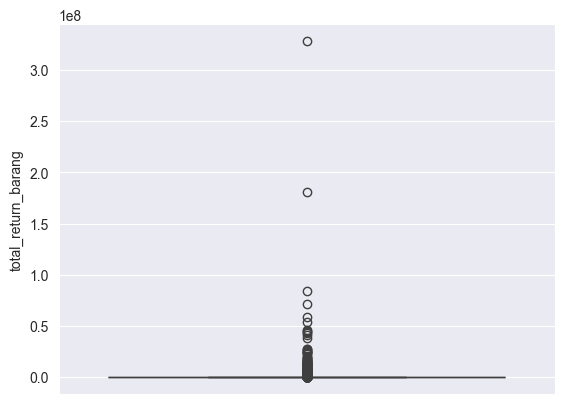

In [163]:
sns.boxplot(churn_model['total_return_barang'])

Setellah Scaller

<Axes: ylabel='total_return_barang'>

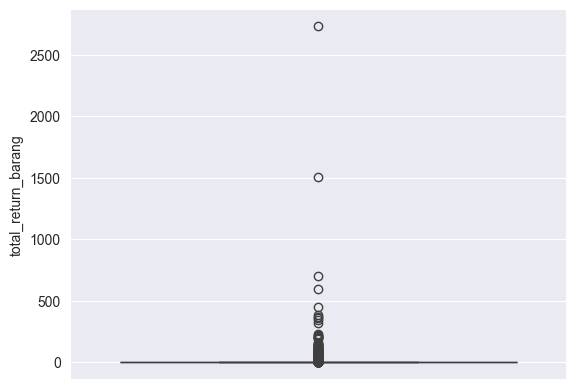

In [164]:
sns.boxplot(full_scaled['total_return_barang'])

In [165]:
from imblearn.over_sampling import SMOTE

In [166]:
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

In [167]:
full_smote = pd.concat([X_train_over, y_train_over], axis=1)

Efek oversampling (cth total amount & credit limit)
Sebelum oversampling 

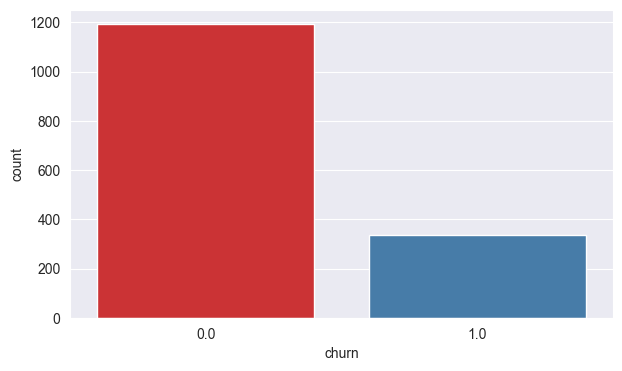

In [168]:
plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')

churn_counts = churn_model['churn'].value_counts()
churn_order = churn_counts.sort_values(ascending=False).index
sns.countplot(x='churn', hue='churn', data=churn_model, palette='Set1', order=churn_order, legend=False)
plt.show()

Sesudah oversampling    

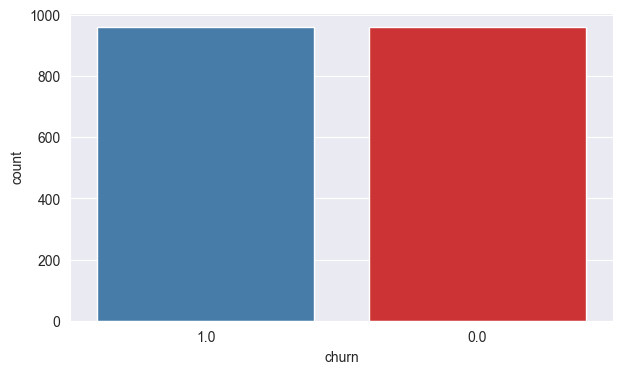

In [169]:
plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')

churn_counts = full_smote['churn'].value_counts()
churn_order = churn_counts.sort_values(ascending=False).index
sns.countplot(x='churn', hue='churn', data=full_smote, palette='Set1', order=churn_order, legend=False)
plt.show()

In [170]:
df_eda.columns

Index(['BP Code', 'BP Name', 'Shipping Type', 'Group Code', 'BP Type',
       'Active', 'Payment Terms Code', 'Price List No.', 'Credit Limit',
       'Sales Employee Code', 'Creation Date', 'Churn', 'Return Barang',
       'Total Return Barang', 'Potongan Penjualan', 'Total Potongan Penjualan',
       'Total Amount', 'Total Transaction', 'Total Unique Item',
       'Top Category', 'kategori_count', 'Ship-to-Province', 'reward_2022',
       'reward_2023_p1', 'reward_2023_p2', 'Number of Months',
       'First Sales Date', 'Last Sales Date', 'New Creation Date'],
      dtype='object')

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
from sklearn.model_selection import learning_curve

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_over)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_over)
    strat_k_fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    
    print("Accuracy (Train Set): %.3f" % accuracy_score(y_train_over, y_pred_train))
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.3f" % precision_score(y_train_over, y_pred_train))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.3f" % recall_score(y_train_over, y_pred_train))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.3f" % f1_score(y_train_over, y_pred_train))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print()
    print('-------CROSS-VALIDATION-------')
    score_acc = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): %.3f' % score_acc['train_score'].mean())
    print('Accuracy (crossval test): %.3f' % score_acc['test_score'].mean())
    score_pre = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='precision', return_train_score=True)
    print('Precision (crossval train): %.3f' % score_pre['train_score'].mean())
    print('Precision (crossval test): %.3f' % score_pre['test_score'].mean())
    score_re = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='recall', return_train_score=True)
    print('Recall (crossval train): %.3f' % score_re['train_score'].mean())
    print('Recall (crossval test): %.3f' % score_re['test_score'].mean())
    score_f1 = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='f1', return_train_score=True)
    print('F1-Score (crossval train): %.3f' % score_f1['train_score'].mean())
    print('F1-Score (crossval test): %.3f' % score_f1['test_score'].mean())
    score = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): %.3f' % score['train_score'].mean())
    print('roc_auc (crossval test): %.3f' % score['test_score'].mean())

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [172]:
def plot_learning_curve(estimator, title, X_train_over, y_train_over, X_test, y_test, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Sizes")
    plt.ylabel("ROC_AUC Score")

    train_scores = cross_val_score(estimator, X_train_over, y_train_over, cv=cv, scoring='roc_auc')
    test_scores = cross_val_score(estimator, X_test, y_test, cv=cv, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores)
    test_scores_mean = np.mean(test_scores)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train_over, y_train_over, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    for i, j in zip(train_sizes, train_scores_mean):
        plt.text(i, j, format(j, '.3f'), ha='center', va='bottom', rotation=45)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
    for i, j in zip(train_sizes, test_scores_mean):
        plt.text(i, j, format(j, '.3f'), ha='center', va='bottom', rotation=45)

    plt.legend(loc="best")
    return plt

In [173]:
strat_k_fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [174]:
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)
eval_classification(lr)


Accuracy (Train Set): 0.675
Accuracy (Test Set): 0.768
Precision (Train Set): 0.631
Precision (Test Set): 1.000
Recall (Train Set): 0.843
Recall (Test Set): 0.027
F1-Score (Train Set): 0.721
F1-Score (Test Set): 0.053
roc_auc (train-proba): 0.744
roc_auc (test-proba): 0.521

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.673
Accuracy (crossval test): 0.674
Precision (crossval train): 0.630
Precision (crossval test): 0.632
Recall (crossval train): 0.837
Recall (crossval test): 0.835
F1-Score (crossval train): 0.719
F1-Score (crossval test): 0.719
roc_auc (crossval train): 0.742
roc_auc (crossval test): 0.739


In [175]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_over, y_train_over)
eval_classification(dt)


Accuracy (Train Set): 0.898
Accuracy (Test Set): 0.752
Precision (Train Set): 0.856
Precision (Test Set): 0.364
Recall (Train Set): 0.956
Recall (Test Set): 0.055
F1-Score (Train Set): 0.903
F1-Score (Test Set): 0.095
roc_auc (train-proba): 0.950
roc_auc (test-proba): 0.512

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.906
Accuracy (crossval test): 0.878
Precision (crossval train): 0.878
Precision (crossval test): 0.849
Recall (crossval train): 0.946
Recall (crossval test): 0.922
F1-Score (crossval train): 0.910
F1-Score (crossval test): 0.883
roc_auc (crossval train): 0.956
roc_auc (crossval test): 0.931


In [176]:
rf = RandomForestClassifier(max_depth=4, random_state=42)
rf.fit(X_train_over, y_train_over)
eval_classification(rf)

Accuracy (Train Set): 0.905
Accuracy (Test Set): 0.761
Precision (Train Set): 0.877
Precision (Test Set): 0.000
Recall (Train Set): 0.941
Recall (Test Set): 0.000
F1-Score (Train Set): 0.908
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.966
roc_auc (test-proba): 0.686

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.906
Accuracy (crossval test): 0.889
Precision (crossval train): 0.881
Precision (crossval test): 0.867
Recall (crossval train): 0.938
Recall (crossval test): 0.920
F1-Score (crossval train): 0.909
F1-Score (crossval test): 0.892
roc_auc (crossval train): 0.966
roc_auc (crossval test): 0.951


In [177]:
xgb = XGBClassifier(max_depth=5,random_state=42)
xgb.fit(X_train_over, y_train_over)
eval_classification(xgb)

Accuracy (Train Set): 1.000
Accuracy (Test Set): 0.735
Precision (Train Set): 1.000
Precision (Test Set): 0.167
Recall (Train Set): 1.000
Recall (Test Set): 0.027
F1-Score (Train Set): 1.000
F1-Score (Test Set): 0.047
roc_auc (train-proba): 1.000
roc_auc (test-proba): 0.535

-------CROSS-VALIDATION-------
Accuracy (crossval train): 1.000
Accuracy (crossval test): 0.930
Precision (crossval train): 1.000
Precision (crossval test): 0.925
Recall (crossval train): 1.000
Recall (crossval test): 0.936
F1-Score (crossval train): 1.000
F1-Score (crossval test): 0.931
roc_auc (crossval train): 1.000
roc_auc (crossval test): 0.978


In [178]:
knn = KNeighborsClassifier()
knn.fit(X_train_over, y_train_over)
eval_classification(knn)

Accuracy (Train Set): 0.892
Accuracy (Test Set): 0.683
Precision (Train Set): 0.842
Precision (Test Set): 0.250
Recall (Train Set): 0.965
Recall (Test Set): 0.164
F1-Score (Train Set): 0.899
F1-Score (Test Set): 0.198
roc_auc (train-proba): 0.979
roc_auc (test-proba): 0.551

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.884
Accuracy (crossval test): 0.835
Precision (crossval train): 0.837
Precision (crossval test): 0.787
Recall (crossval train): 0.955
Recall (crossval test): 0.921
F1-Score (crossval train): 0.892
F1-Score (crossval test): 0.848
roc_auc (crossval train): 0.974
roc_auc (crossval test): 0.918


In [179]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_over, y_train_over)
eval_classification(ada)

Accuracy (Train Set): 0.933
Accuracy (Test Set): 0.755
Precision (Train Set): 0.924
Precision (Test Set): 0.375
Recall (Train Set): 0.943
Recall (Test Set): 0.041
F1-Score (Train Set): 0.933
F1-Score (Test Set): 0.074
roc_auc (train-proba): 0.986
roc_auc (test-proba): 0.604

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.938
Accuracy (crossval test): 0.907
Precision (crossval train): 0.931
Precision (crossval test): 0.902
Recall (crossval train): 0.946
Recall (crossval test): 0.915
F1-Score (crossval train): 0.938
F1-Score (crossval test): 0.908
roc_auc (crossval train): 0.988
roc_auc (crossval test): 0.966


In [180]:
lgbm = LGBMClassifier(objective= 'binary', 
    metric= 'auc', 
    boosting_type= 'gbdt', 
    num_leaves= 31, 
    learning_rate= 0.05, 
    feature_fraction= 0.9 )
lgbm.fit(X_train_over, y_train_over)
eval_classification(lgbm)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 959, number of negative: 959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2650
[LightGBM] [Info] Number of data points in the train set: 1918, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[Light

In [181]:
svm = SVC(kernel='rbf',
               gamma=0.1,
               C=10.0,
               probability = True)
svm.fit(X_train_over, y_train_over)
eval_classification(svm)

Accuracy (Train Set): 0.987
Accuracy (Test Set): 0.761
Precision (Train Set): 0.978
Precision (Test Set): 0.000
Recall (Train Set): 0.996
Recall (Test Set): 0.000
F1-Score (Train Set): 0.987
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.995
roc_auc (test-proba): 0.500

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.988
Accuracy (crossval test): 0.910
Precision (crossval train): 0.980
Precision (crossval test): 0.921
Recall (crossval train): 0.996
Recall (crossval test): 0.898
F1-Score (crossval train): 0.988
F1-Score (crossval test): 0.909
roc_auc (crossval train): 0.996
roc_auc (crossval test): 0.963


In [182]:
catb = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)
catb.fit(X_train, y_train)
eval_classification(catb)

0:	learn: 0.5999602	total: 146ms	remaining: 584ms
1:	learn: 0.5265751	total: 148ms	remaining: 222ms
2:	learn: 0.4673134	total: 150ms	remaining: 99.7ms
3:	learn: 0.4203782	total: 151ms	remaining: 37.8ms
4:	learn: 0.3798707	total: 153ms	remaining: 0us
Accuracy (Train Set): 0.500
Accuracy (Test Set): 0.886
Precision (Train Set): 0.000
Precision (Test Set): 0.779
Recall (Train Set): 0.000
Recall (Test Set): 0.726
F1-Score (Train Set): 0.000
F1-Score (Test Set): 0.752
roc_auc (train-proba): 0.519
roc_auc (test-proba): 0.919

-------CROSS-VALIDATION-------
0:	learn: 0.6067206	total: 22.3ms	remaining: 89.4ms
1:	learn: 0.5368802	total: 25.5ms	remaining: 38.2ms
2:	learn: 0.4755297	total: 28.1ms	remaining: 18.7ms
3:	learn: 0.4264958	total: 30.1ms	remaining: 7.51ms
4:	learn: 0.3956981	total: 32ms	remaining: 0us
0:	learn: 0.5964871	total: 2.5ms	remaining: 10ms
1:	learn: 0.5221335	total: 5.13ms	remaining: 7.7ms
2:	learn: 0.4766476	total: 7.3ms	remaining: 4.87ms
3:	learn: 0.4339504	total: 9.19ms	rem

0:	learn: 0.6090676	total: 15.1ms	remaining: 60.3ms
1:	learn: 0.5342290	total: 17.3ms	remaining: 25.9ms
2:	learn: 0.4878082	total: 19.4ms	remaining: 12.9ms
3:	learn: 0.4420762	total: 21.5ms	remaining: 5.36ms
4:	learn: 0.4075568	total: 23.7ms	remaining: 0us
0:	learn: 0.6023359	total: 6.43ms	remaining: 25.7ms
1:	learn: 0.5301033	total: 8.36ms	remaining: 12.5ms
2:	learn: 0.4815369	total: 10.4ms	remaining: 6.92ms
3:	learn: 0.4334941	total: 12.7ms	remaining: 3.17ms
4:	learn: 0.4020146	total: 14.7ms	remaining: 0us
0:	learn: 0.6144856	total: 4.71ms	remaining: 18.8ms
1:	learn: 0.5481661	total: 6.64ms	remaining: 9.96ms
2:	learn: 0.4997380	total: 8.7ms	remaining: 5.8ms
3:	learn: 0.4573937	total: 10.9ms	remaining: 2.72ms
4:	learn: 0.4173326	total: 12.8ms	remaining: 0us
0:	learn: 0.6081780	total: 2.5ms	remaining: 10ms
1:	learn: 0.5381447	total: 5.26ms	remaining: 7.9ms
2:	learn: 0.4767162	total: 8.19ms	remaining: 5.46ms
3:	learn: 0.4360262	total: 10.5ms	remaining: 2.61ms
4:	learn: 0.3984656	total: 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


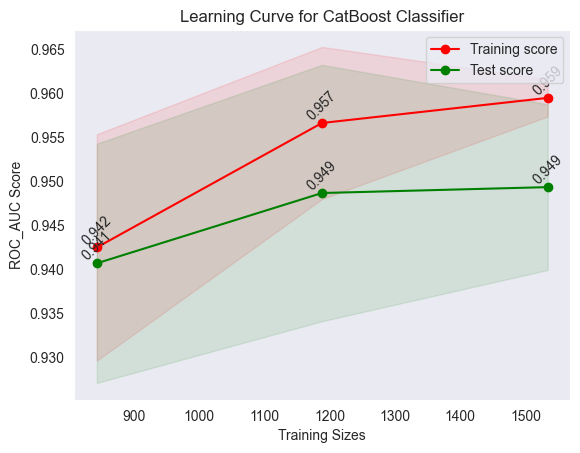

In [183]:
title = "Learning Curve for CatBoost Classifier"
plot = plot_learning_curve(catb, title, X_train_over, y_train_over, X_test, y_test)
plt.show()

In [184]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [185]:
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_dist, cv=strat_k_fold, n_iter=10)

# melakukan fit dengan data latih
random_search.fit(X_train_over, y_train_over)

# mencetak parameter terbaik
print("Parameter terbaik: ", random_search.best_params_)

Parameter terbaik:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 16}


In [186]:
rf_tuned = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf_tuned.fit(X_train_over, y_train_over)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.997
Accuracy (Test Set): 0.761
Precision (Train Set): 0.994
Precision (Test Set): 0.000
Recall (Train Set): 1.000
Recall (Test Set): 0.000
F1-Score (Train Set): 0.997
F1-Score (Test Set): 0.000
roc_auc (train-proba): 1.000
roc_auc (test-proba): 0.584

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.998
Accuracy (crossval test): 0.924
Precision (crossval train): 0.996
Precision (crossval test): 0.913
Recall (crossval train): 1.000
Recall (crossval test): 0.937
F1-Score (crossval train): 0.998
F1-Score (crossval test): 0.925
roc_auc (crossval train): 1.000
roc_auc (crossval test): 0.981


In [187]:
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_dist, cv=strat_k_fold, n_iter=10)

# melakukan fit dengan data latih
random_search.fit(X_train_over, y_train_over)

# mencetak parameter terbaik
print("Parameter terbaik: ", random_search.best_params_)

Parameter terbaik:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 16}


In [188]:
xgb_tuned = XGBClassifier(**random_search.best_params_, random_state=42)
xgb_tuned.fit(X_train_over, y_train_over)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.997
Accuracy (Test Set): 0.761
Precision (Train Set): 0.994
Precision (Test Set): 0.000
Recall (Train Set): 1.000
Recall (Test Set): 0.000
F1-Score (Train Set): 0.997
F1-Score (Test Set): 0.000
roc_auc (train-proba): 1.000
roc_auc (test-proba): 0.584

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.998
Accuracy (crossval test): 0.924
Precision (crossval train): 0.996
Precision (crossval test): 0.913
Recall (crossval train): 1.000
Recall (crossval test): 0.937
F1-Score (crossval train): 0.998
F1-Score (crossval test): 0.925
roc_auc (crossval train): 1.000
roc_auc (crossval test): 0.981


In [189]:
param_grid = {
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create the Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Perform Grid Search
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='neg_log_loss', cv=10)
grid_result = grid_search.fit(X_train, y_train)
# mencetak parameter terbaik
print("Parameter terbaik: ", grid_result.best_params_)

Parameter terbaik:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [190]:
dt_tuned = DecisionTreeClassifier(**grid_result.best_params_, random_state=42)
dt_tuned.fit(X_train_over, y_train_over)
eval_classification(dt_tuned)

Accuracy (Train Set): 0.898
Accuracy (Test Set): 0.752
Precision (Train Set): 0.856
Precision (Test Set): 0.364
Recall (Train Set): 0.956
Recall (Test Set): 0.055
F1-Score (Train Set): 0.903
F1-Score (Test Set): 0.095
roc_auc (train-proba): 0.950
roc_auc (test-proba): 0.512

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.906
Accuracy (crossval test): 0.879
Precision (crossval train): 0.877
Precision (crossval test): 0.850
Recall (crossval train): 0.946
Recall (crossval test): 0.922
F1-Score (crossval train): 0.909
F1-Score (crossval test): 0.884
roc_auc (crossval train): 0.955
roc_auc (crossval test): 0.933


In [191]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# Create the KNN model
knn_classifier = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train)

# mencetak parameter terbaik
print("Parameter terbaik:", grid_result.best_params_)

Parameter terbaik: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [192]:
knn_tuned = KNeighborsClassifier(**grid_result.best_params_)
knn_tuned.fit(X_train_over, y_train_over)
eval_classification(knn_tuned)

Accuracy (Train Set): 0.906
Accuracy (Test Set): 0.680
Precision (Train Set): 0.872
Precision (Test Set): 0.245
Recall (Train Set): 0.952
Recall (Test Set): 0.164
F1-Score (Train Set): 0.910
F1-Score (Test Set): 0.197
roc_auc (train-proba): 0.977
roc_auc (test-proba): 0.517

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.894
Accuracy (crossval test): 0.857
Precision (crossval train): 0.856
Precision (crossval test): 0.817
Recall (crossval train): 0.946
Recall (crossval test): 0.921
F1-Score (crossval train): 0.899
F1-Score (crossval test): 0.866
roc_auc (crossval train): 0.971
roc_auc (crossval test): 0.935


In [193]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}
# Create the AdaBoost model
ada_boost_classifier = AdaBoostClassifier()

# Perform Grid Search
grid_search = GridSearchCV(ada_boost_classifier, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Parameter terbaik:", grid_result.best_params_)

Parameter terbaik: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 200}


In [194]:
ada_tuned = AdaBoostClassifier(**grid_result.best_params_, random_state=42)
ada_tuned.fit(X_train_over, y_train_over)
eval_classification(ada_tuned)

Accuracy (Train Set): 0.926
Accuracy (Test Set): 0.761
Precision (Train Set): 0.907
Precision (Test Set): 0.000
Recall (Train Set): 0.950
Recall (Test Set): 0.000
F1-Score (Train Set): 0.928
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.979
roc_auc (test-proba): 0.591

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.925
Accuracy (crossval test): 0.910
Precision (crossval train): 0.905
Precision (crossval test): 0.896
Recall (crossval train): 0.948
Recall (crossval test): 0.928
F1-Score (crossval train): 0.926
F1-Score (crossval test): 0.912
roc_auc (crossval train): 0.980
roc_auc (crossval test): 0.968


In [195]:
#batal, training lama
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']
}
svc_classifier = SVC()
# Perform Grid Search
grid_search = GridSearchCV(svc_classifier, param_grid, refit = True, verbose = 3)
grid_result = grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best parameters:", grid_result.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [196]:
svc_tuned = SVC(**grid_result.best_params_, random_state=42, probability=True)
svc_tuned.fit(X_train_over, y_train_over)
eval_classification(svc_tuned)

Accuracy (Train Set): 0.757
Accuracy (Test Set): 0.761
Precision (Train Set): 0.984
Precision (Test Set): 0.000
Recall (Train Set): 0.521
Recall (Test Set): 0.000
F1-Score (Train Set): 0.682
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.982
roc_auc (test-proba): 0.500

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.740
Accuracy (crossval test): 0.715
Precision (crossval train): 0.986
Precision (crossval test): 0.982
Recall (crossval train): 0.486
Recall (crossval test): 0.438
F1-Score (crossval train): 0.651
F1-Score (crossval test): 0.604
roc_auc (crossval train): 0.984
roc_auc (crossval test): 0.938


In [197]:
def get_model_name(model):
    model_mapping = {
        lr: 'Logistic Regression',
        dt: 'Decision Tree',
        rf: 'Random Forest',
        xgb: 'XGBoost',
        knn: 'KNN',
        ada: 'AdaBoost',
        lgbm: 'LGBM',
        svm: 'SVM',
        catb: 'Catboost',
        rf_tuned: 'Random Forest Tuned',
        xgb_tuned: 'XGBoost Tuned',
        dt_tuned: 'Decision Tree Tuned',
        knn_tuned: 'KNN Tuned',
        ada_tuned: 'AdaBoost Tuned',
        svc_tuned: 'SVM Tuned'
    }
    return model_mapping.get(model, 'Unknown Model')

In [198]:

roc_auc_list_train = []
roc_auc_list_test = []
def roc_auc_all_score(model):
    roc_auc_train = cross_val_score(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='roc_auc')
    roc_auc_test = cross_val_score(model, X_test, y_test, cv=strat_k_fold, scoring='roc_auc')
    value_train = {get_model_name(model):roc_auc_train.mean()}
    value_test = {get_model_name(model):roc_auc_test.mean()}
    roc_auc_list_train.append(value_train)
    roc_auc_list_test.append(value_test)
# score = cross_validate(lr, X_train_over, y_train_over, cv=strat_k_fold, scoring='roc_auc', return_train_score=True)
# roc_auc_train = ['train_score'].mean()
# roc_auc_test = ['test_score'].mean()
# value_train = {'Logistic Regression':roc_auc_train}
# value_test = {'Logistic Regression':roc_auc_test}
# roc_auc_list_train.append(value_train)
# roc_auc_list_test.append(value_test)

In [199]:
list_model = [lr, dt, rf, xgb, knn, ada, lgbm, svm,rf_tuned, xgb_tuned, dt_tuned, knn_tuned, ada_tuned, svc_tuned]


In [200]:
def get_model_name(model):
    model_mapping = {
        lr: 'Logistic Regression',
        dt: 'Decision Tree',
        rf: 'Random Forest',
        xgb: 'XGBoost',
        knn: 'KNN',
        ada: 'AdaBoost',
        lgbm: 'LGBM',
        svm: 'SVM',
        
        rf_tuned: 'Random Forest Tuned',
        xgb_tuned: 'XGBoost Tuned',
        dt_tuned: 'Decision Tree Tuned',
        knn_tuned: 'KNN Tuned',
        ada_tuned: 'AdaBoost Tuned',
        svc_tuned: 'SVM Tuned'
    }
    return model_mapping.get(model, 'Unknown Model')

In [201]:
for model in list_model:
    roc_auc_all_score(model)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 767, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Number of data points in the train set: 1534, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0

In [202]:
roc_auc_list_train

[{'Logistic Regression': 0.7392211416975712},
 {'Decision Tree': 0.9309744576925174},
 {'Random Forest': 0.9506973985602093},
 {'XGBoost': 0.9781217902396016},
 {'KNN': 0.9183967701288903},
 {'AdaBoost': 0.9660856574271015},
 {'LGBM': 0.9789789098858348},
 {'SVM': 0.9631939331551773},
 {'Random Forest Tuned': 0.9809286831006399},
 {'XGBoost Tuned': 0.9770875088623472},
 {'Decision Tree Tuned': 0.9328489151577953},
 {'KNN Tuned': 0.9353433392642888},
 {'AdaBoost Tuned': 0.9678192973067554},
 {'SVM Tuned': 0.9383551739065228}]

In [203]:
roc_auc_list_test

[{'Logistic Regression': 0.7060869565217391},
 {'Decision Tree': 0.8515431038280251},
 {'Random Forest': 0.8959799127791728},
 {'XGBoost': 0.9105810316726135},
 {'KNN': 0.5728307123034228},
 {'AdaBoost': 0.9093687502753184},
 {'LGBM': 0.9277670587198802},
 {'SVM': 0.5},
 {'Random Forest Tuned': 0.9051891987137133},
 {'XGBoost Tuned': 0.9029760803488834},
 {'Decision Tree Tuned': 0.8605004184837671},
 {'KNN Tuned': 0.5558953350072684},
 {'AdaBoost Tuned': 0.9139240562089777},
 {'SVM Tuned': 0.5}]

In [204]:
def get_model_name(model):
    model_mapping = {
        lr: 'Logistic Regression',
        dt: 'Decision Tree',
        rf: 'Random Forest',
        xgb: 'XGBoost',
        knn: 'KNN',
        ada: 'AdaBoost',
        lgbm: 'LGBM',
        svm: 'SVM',
        rf_tuned: 'Random Forest Tuned',
        xgb_tuned: 'XGBoost Tuned',
        dt_tuned: 'Decision Tree Tuned',
        knn_tuned: 'KNN Tuned',
        ada_tuned: 'AdaBoost Tuned',
        svc_tuned: 'SVM Tuned'
    }
    return model_mapping.get(model, 'Unknown Model')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


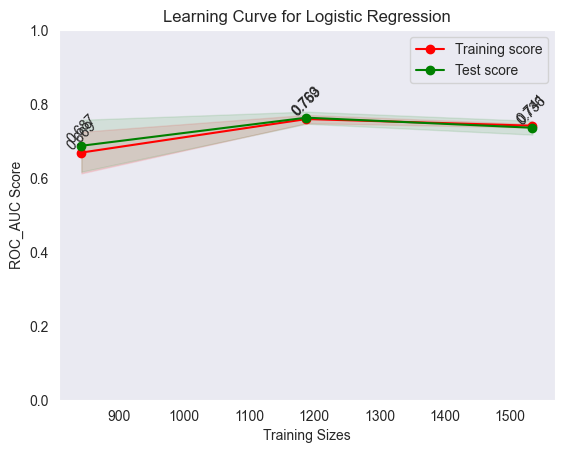

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


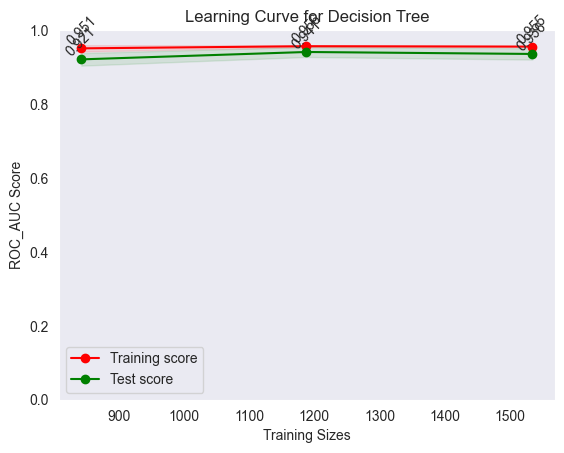

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


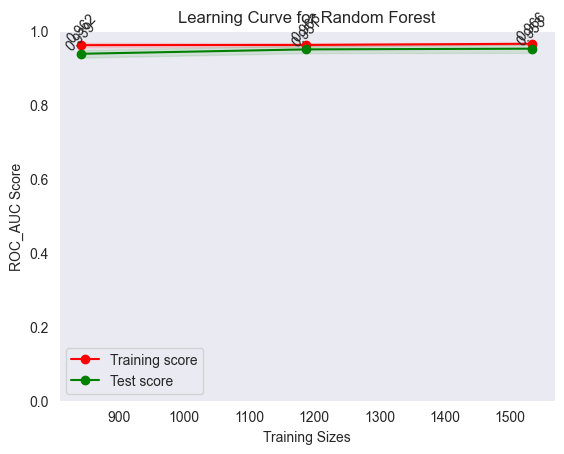

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


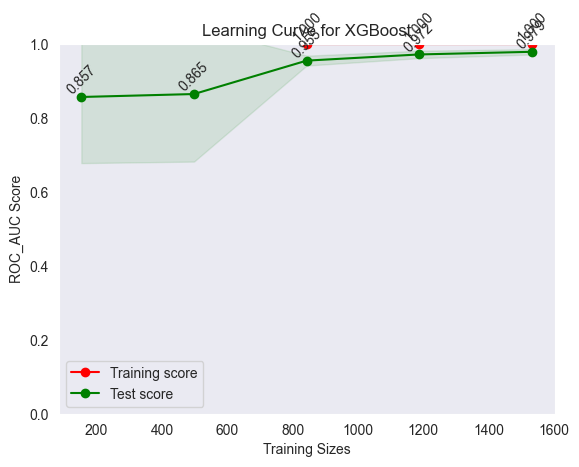

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


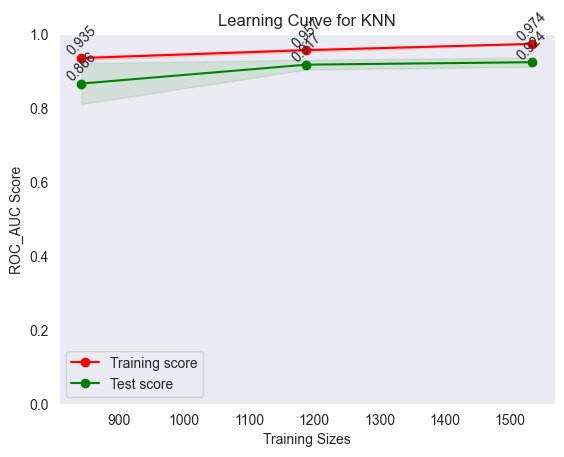

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


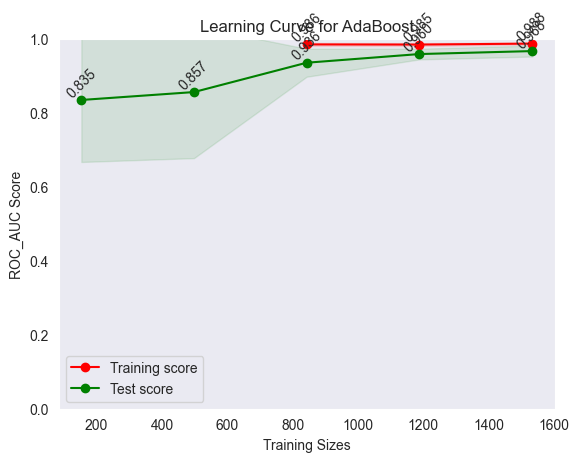

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 767, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2568
[LightGBM] [Info] Number of data points in the train set: 1534, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


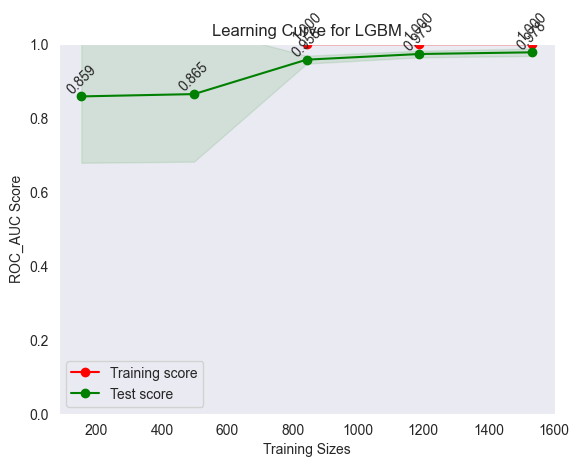

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


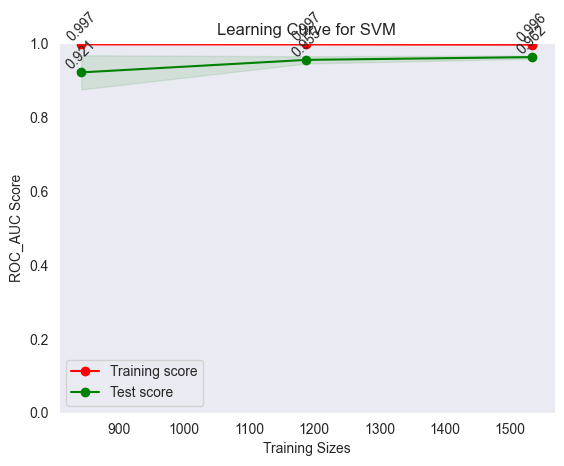

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


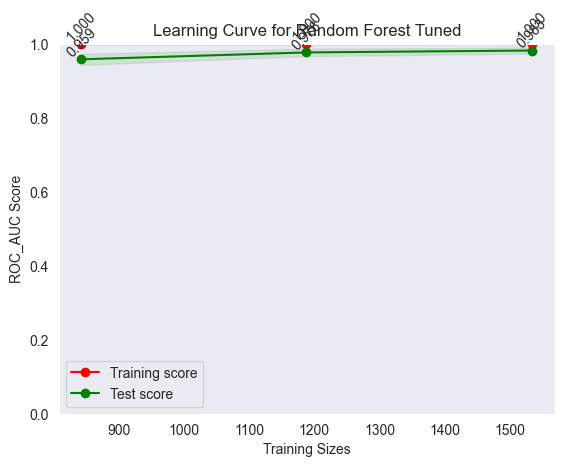

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


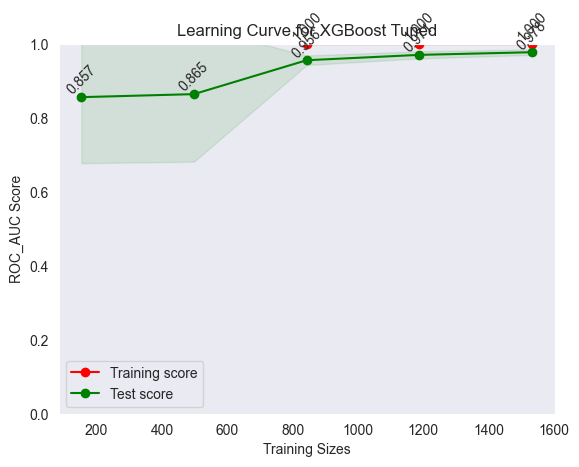

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


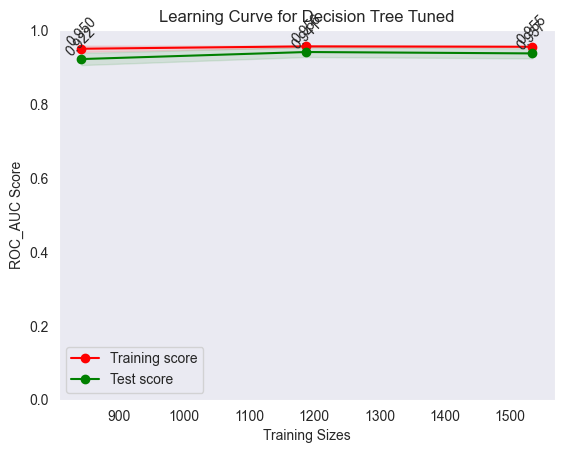

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


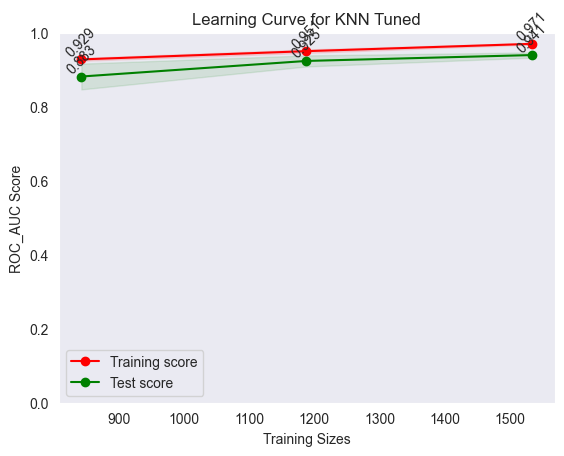

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


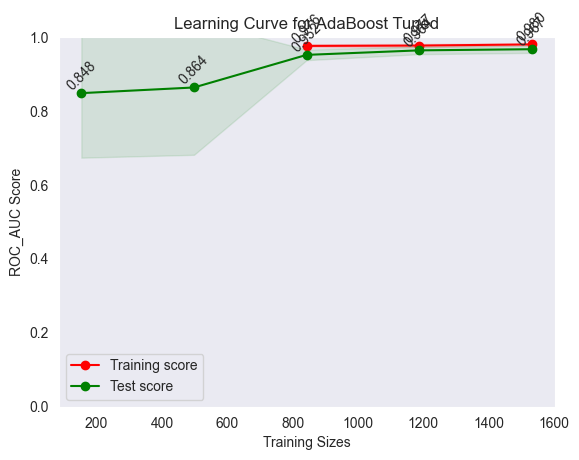

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


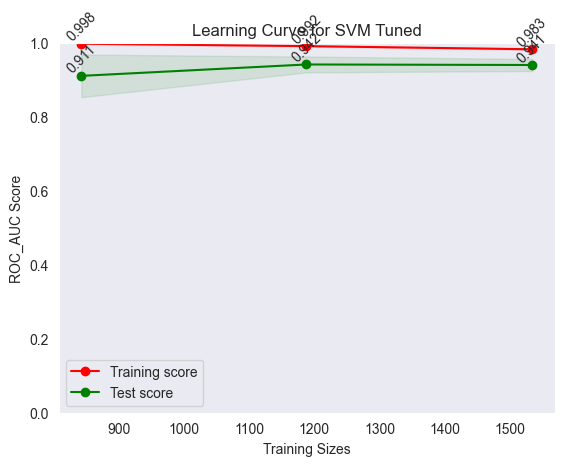

In [205]:
for model in list_model:
    title = "Learning Curve for " + get_model_name(model) 
    plot = plot_learning_curve(model, title, X_train_over, y_train_over, X_test, y_test)
    plt.ylim([0,1])
    plt.show()

In [206]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [207]:
def matriks_kebingungan(model,title):
    y_pred_cv = cross_val_predict(model, X_train_over, y_train_over, cv=strat_k_fold)
    confusion_matrix_cv = confusion_matrix(y_train_over, y_pred_cv)
    fig = px.imshow(confusion_matrix_cv, text_auto=".0f", color_continuous_scale='ice',
                template='plotly_dark',width=500,height=500,
                labels={"x": "Predicted Churn", "y": "Actual Churn"},
                x=["Not Churn", "Churn"],
                y=["Not Churn", "Churn"])
    fig.update_layout(title=title)
    fig.show()

In [226]:
for model in list_model:
    model_name = get_model_name(model)  # Replace with actual function to get model name
    matriks_kebingungan(model, title=f"Confusion Matrix for {model_name}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 767, number of negative: 767
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Number of data points in the train set: 1534, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0

3 Model Terbaik berdasarkan confussion matrix

1. Decision Tree
2. Adaboost
3. LGBM

Decision Tree beresiko gagal memprediksi data baru karena akurasi terlalu tinggi

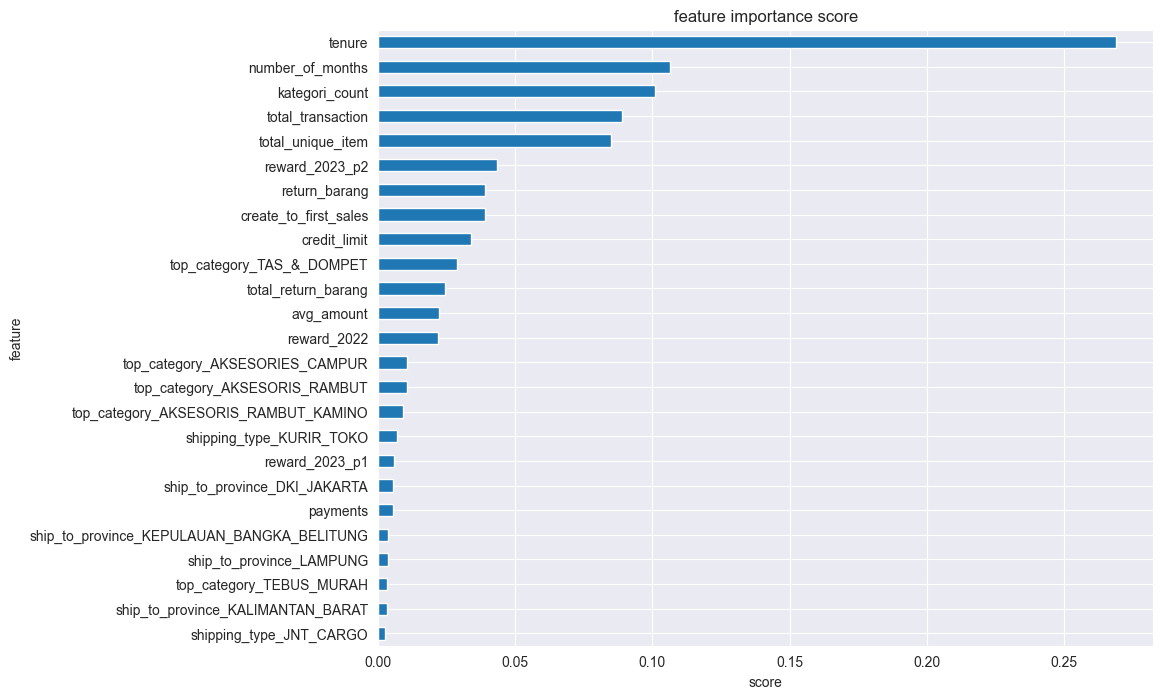

In [209]:
show_feature_importance(rf)

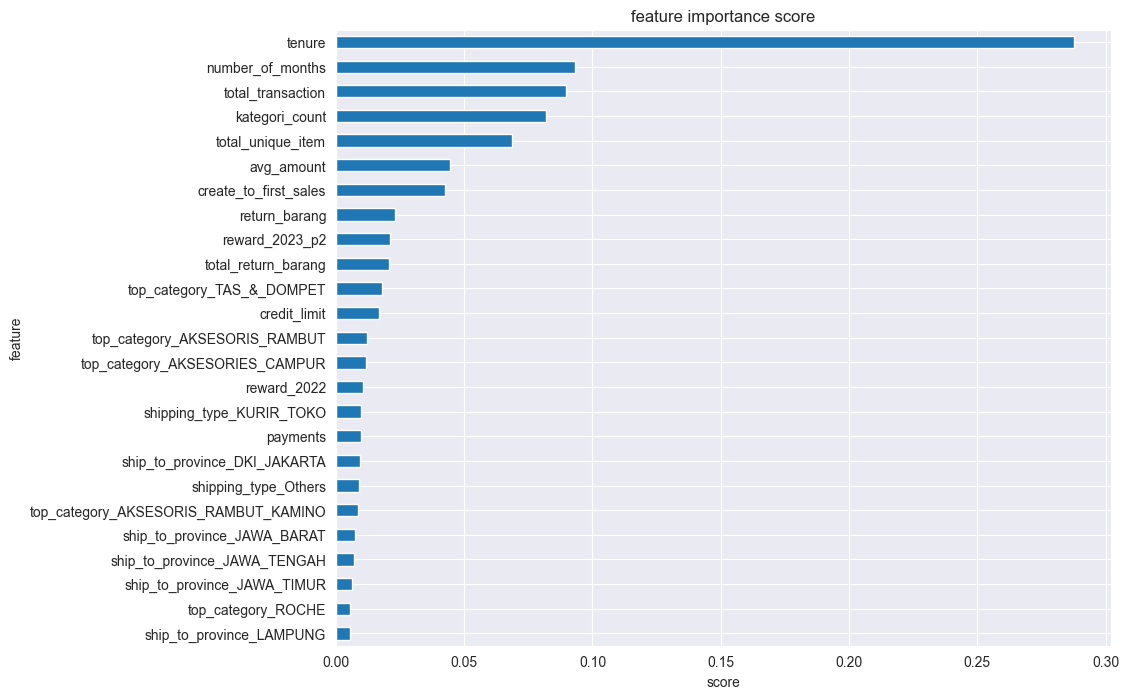

In [210]:
show_feature_importance(rf_tuned)

In [230]:
# from explainerdashboard import ClassifierExplainer, ExplainerDashboard
# explainer = ClassifierExplainer(knn_tuned, X_test, y_test)

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [231]:
# ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


100%|██████████| 306/306 [08:42<00:00,  1.71s/it]

Calculating prediction probabilities...
Calculating metrics...


Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.100.168:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_b9020745-f4cc-46de-85be-c8d14bbc610b (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000028F5A81C790>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

In [232]:
#List nama model
#list_model = [lr, dt, rf, xgb, knn, ada, lgbm, svm,rf_tuned, xgb_tuned, dt_tuned, knn_tuned, ada_tuned, svc_tuned]
# Menggabungkan data latih dan data uji
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])


churn_probabilities = knn.predict_proba(X_combined)[:, 1]

customer_add['churn_prob_rf'] = churn_probabilities

customer_add['Churn Prediction'] = np.where(customer_add['churn_prob_rf'] > 0.5, 'Y', 'N')

# Menampilkan 10 Pelanggan dengan Probabilitas Churn Tertinggi
customer_add.sort_values(by='churn_prob_rf', ascending=False).head(3)

BP Code                      BP Name Shipping Type Group Code   
987  KSE-00013      TOKO SB ACC BANJARMASIN        Others         C6  \
707  JTH-00123                 CANTIK STORE        Others         C4   
693  JTH-00107  PT. RAMAI SANTOSO SEJAHTERA    SURYA PAGI        C10   

      BP Type Active Payment Terms Code      Price List No.  Credit Limit   
987  Customer    Yes            14 Days  Harga Jual - Lusin   20000000.00  \
707  Customer    Yes             0 Days  Harga Jual - Lusin          0.00   
693  Customer    Yes            30 Days  Harga Jual - Lusin   30000000.00   

    Sales Employee Code Creation Date Churn  Return Barang   
987               Rizki      27-05-22     N              3  \
707     Shifa Anggraeni      18-11-23     N              0   
693        Leppi Dianti      23-08-23     N              0   

     Total Return Barang  Potongan Penjualan  Total Potongan Penjualan   
987            303775.00                   0                      0.00  \
707                 0.00                   0                      0.00   
693                 0.00                   0                      0.00   

     Total Amount  Total Transaction  Total Unique Item      Top Category   
987  104997600.00              30.00             221.00      ALAT MAKE UP  \
707    2060700.00               1.00              24.00  AKSESORIS RAMBUT   
693   32883000.00              12.00             116.00  AKSESORIS RAMBUT   

     kategori_count    Ship-to-Province  reward_2022  reward_2023_p1   
987           79.00  KALIMANTAN SELATAN         0.00            0.00  \
707            9.00         JAWA TENGAH         0.00            0.00   
693           61.00         JAWA TENGAH         0.00            0.00   

     reward_2023_p2  Number of Months First Sales Date Last Sales Date   
987            0.00             11.00       2022-08-05      2024-01-27  \
707            0.00              1.00       2023-11-23      2023-11-23   
693            0.00              4.00       2023-09-04      2024-01-26   

    New Creation Date  churn_prob_rf Churn Prediction  
987        2022-05-27           1.00                Y  
707        2023-11-18           1.00                Y  
693        2023-08-23           1.00                Y

<Axes: title={'center': 'Histogram of Churn Probability'}, ylabel='Frequency'>

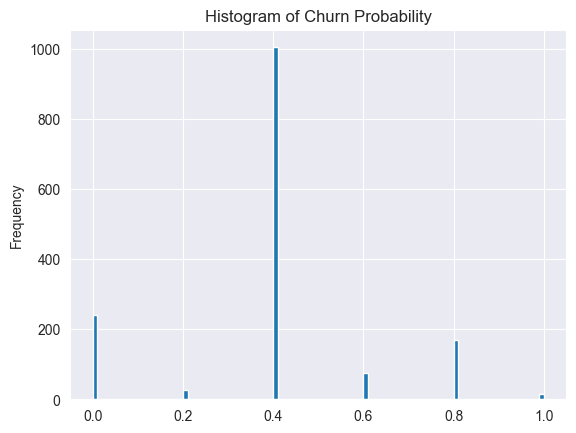

In [233]:
customer_add['churn_prob_rf'].plot(kind='hist', bins=100, title='Histogram of Churn Probability')

In [234]:
#X_train menjadi X_train_over, X_test, y_train menjadi y_train_over, y_test
def matriks_kebingungan_test(model, title):
    y_pred_test = model.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
    fig = px.imshow(confusion_matrix_test, text_auto=".0f", color_continuous_scale='ice',
                    template='plotly_dark', width=500, height=500,
                    labels={"x": "Predicted Churn", "y": "Actual Churn"},
                    x=["Not Churn", "Churn"],
                    y=["Not Churn", "Churn"])
    fig.update_layout(title=title)
    fig.show()

In [235]:
for model in list_model:
    model_name = get_model_name(model)  # Replace with actual function to get model name
    matriks_kebingungan_test(model, title=f"Confusion Matrix for {model_name}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [217]:
customer_add.head()

BP Code               BP Name Shipping Type Group Code   BP Type Active   
0  ACH-00001          INDRA (ACEH)        Others         C0  Customer    Yes  \
1  ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer    Yes   
2  ACH-00003                ZAZIRA        Others         C4  Customer    Yes   
3  ACH-00004  TOKO BINTANG PERMATA        Others          C  Customer    Yes   
4  ACH-00005                 IQBAL        Others         C8  Customer    Yes   

  Payment Terms Code      Price List No.  Credit Limit Sales Employee Code   
0             0 Days  Harga Jual - Lusin          0.00     Shifa Anggraeni  \
1            14 Days  Harga Jual - Lusin   30000000.00        Opik Hidayat   
2             0 Days  Harga Jual - Lusin          0.00     Shifa Anggraeni   
3            14 Days  Harga Jual - Lusin   20000000.00            Saepudin   
4             0 Days  Harga Jual - Lusin          0.00                Dina   

  Creation Date Churn  Return Barang  Total Return Barang  Potongan Penjualan   
0      03-05-22     Y              0                 0.00                   0  \
1      03-05-22     N              1             51000.00                   0   
2      03-05-22     N              1            330000.00                   0   
3      03-05-22     N              0                 0.00                   0   
4      03-05-22     N              0                 0.00                   0   

   Total Potongan Penjualan  Total Amount  Total Transaction   
0                      0.00   26743500.00               6.00  \
1                      0.00  300811175.00              97.00   
2                      0.00   81977262.00              16.00   
3                      0.00   71799000.00              35.00   
4                      0.00  109386000.00              23.00   

   Total Unique Item       Top Category  kategori_count Ship-to-Province   
0              71.00  AKSESORIES CAMPUR           23.00             ACEH  \
1             724.00       TAS & DOMPET          258.00             ACEH   
2             290.00  AKSESORIES CAMPUR          115.00             ACEH   
3             250.00       TAS & DOMPET          153.00             ACEH   
4             147.00       TAS & DOMPET           75.00             ACEH   

   reward_2022  reward_2023_p1  reward_2023_p2  Number of Months   
0         0.00            0.00            0.00              4.00  \
1         0.00            0.00            1.00             25.00   
2         0.00            0.00            0.00             11.00   
3         0.00            0.00            0.00             15.00   
4         0.00            0.00            0.00             13.00   

  First Sales Date Last Sales Date New Creation Date  churn_prob_rf   
0       2022-01-22      2022-06-02        2022-01-22           0.40  \
1       2022-01-24      2024-03-02        2022-01-24           0.40   
2       2022-02-19      2024-01-05        2022-02-19           0.00   
3       2022-01-22      2024-03-12        2022-01-22           0.40   
4       2022-02-28      2024-02-20        2022-02-28           0.40   

  Churn Prediction  
0                N  
1                N  
2                N  
3                N  
4                N

In [267]:
def churn_result(model):
    churn_probabilities = model.predict_proba(X_combined)[:, 1]

    customer_add['churn_prob_rf'] = churn_probabilities

    customer_add['Churn Prediction'] = np.where(customer_add['churn_prob_rf'] > 0.5, 'Y', 'N')


In [248]:
def plot_churn(model):
    churn_result(model)
    # EDA Churn Menggunakan Pie Chart (Percentage)
    data_churn = customer_add['Churn Prediction'].value_counts()['Y']
    data_no_churn = customer_add['Churn Prediction'].value_counts()['N']

    plt.figure(figsize=(8, 4))
    data = [data_churn, data_no_churn]
    explode = [0.1, 0.01]
    labels = ['Churn', 'No Churn']
    colors = ['red', 'cyan']

    plt.pie(data, labels=labels, colors=colors, autopct='%0.2f%%', explode=explode)
    plt.title('Churn Percentage', fontsize=15)
    plt.show()

In [249]:
def churn_histogram(model):
    churn_result(model)
    customer_add['churn_prob_rf'].plot(kind='hist', bins=100, title='Histogram of Churn Probability')

In [255]:
def count_accuracy(model):
    churn_result(model)
    positive = customer_add[customer_add['Churn']==customer_add['Churn Prediction']].shape[0]
    all = customer_add.shape[0]
    print(positive/all)

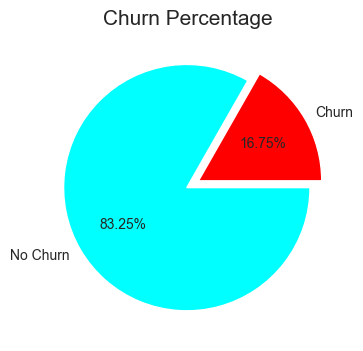

In [268]:
# model = [rf_tuned, xgb_tuned, dt_tuned, knn_tuned, ada_tuned, svc_tuned]
# for i in model:
#     plot_churn(i)
plot_churn(knn)

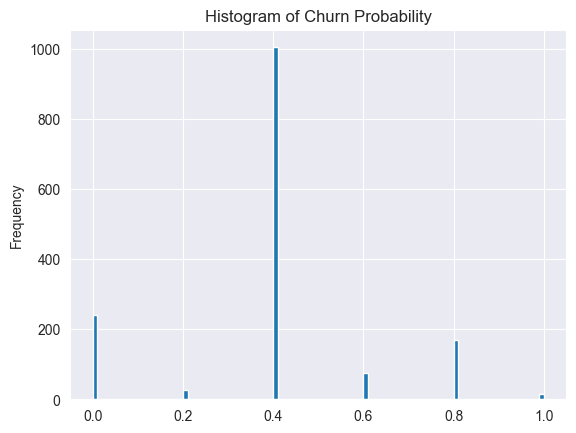

In [269]:
churn_histogram(knn)

In [270]:
count_accuracy(knn)

0.668848167539267


In [271]:
customer_add['Churn Prediction'].value_counts()

Churn Prediction
N    1272
Y     256
Name: count, dtype: int64

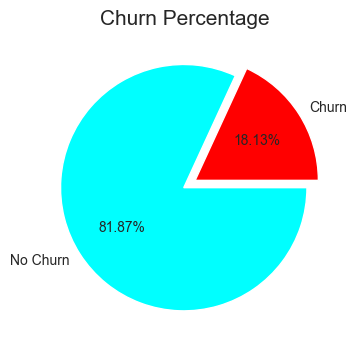

In [272]:
plot_churn(knn_tuned)

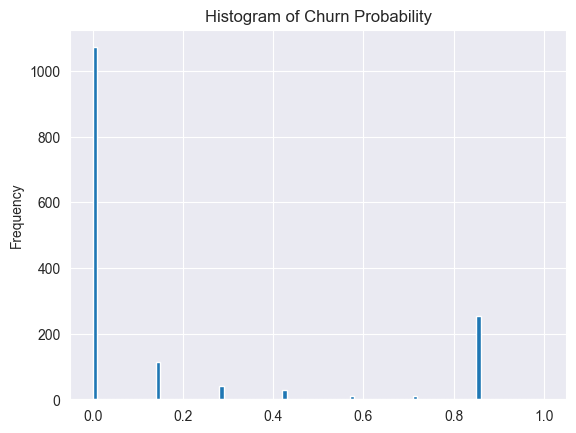

In [273]:
churn_histogram(knn_tuned)

In [274]:
count_accuracy(knn_tuned)

0.6655759162303665


In [275]:
customer_add['Churn Prediction'].value_counts()

Churn Prediction
N    1251
Y     277
Name: count, dtype: int64

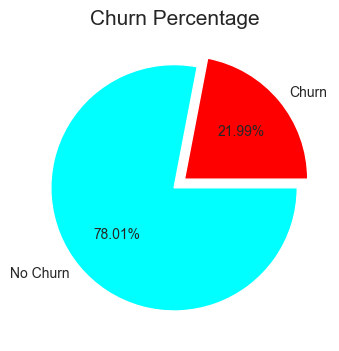

In [ ]:
# EDA Churn Menggunakan Pie Chart (Percentage)
data_churn = customer_add['Churn'].value_counts()['Y']
data_no_churn = customer_add['Churn'].value_counts()['N']

plt.figure(figsize=(8, 4))
data = [data_churn, data_no_churn]
explode = [0.1, 0.01]
labels = ['Churn', 'No Churn']
colors = ['red', 'cyan']

plt.pie(data, labels=labels, colors=colors, autopct='%0.2f%%', explode=explode)
plt.title('Churn Percentage', fontsize=15)
plt.show()

In [ ]:
customer_add

BP Code               BP Name Shipping Type Group Code   BP Type   
0     ACH-00001          INDRA (ACEH)           KSI         C0  Customer  \
1     ACH-00002            NUSA INDAH   LARIS CARGO         C2  Customer   
2     ACH-00003                ZAZIRA    WIRA AGUNG         C4  Customer   
3     ACH-00004  TOKO BINTANG PERMATA           KSI          C  Customer   
4     ACH-00005                 IQBAL           KSI         C8  Customer   
...         ...                   ...           ...        ...       ...   
1523  K03-00018             JKT ACONG    KURIR TOKO        K03  Customer   
1524  K03-00033         TOKO SUCI ACC     IPN CARGO        K03  Customer   
1525  K03-00035              TOKO GIO      PANORAMA        K03  Customer   
1526  K03-00038         TOKO FITA ACC     IPN CARGO        K03  Customer   
1527  KSE-00016     SETIA BANJARMASIN            ZR         C3  Customer   

     Active Payment Terms Code      Price List No.  Credit Limit   
0       Yes             0 Days  Harga Jual - Lusin          0.00  \
1       Yes            14 Days  Harga Jual - Lusin   30000000.00   
2       Yes             0 Days  Harga Jual - Lusin          0.00   
3       Yes            14 Days  Harga Jual - Lusin   20000000.00   
4       Yes             0 Days  Harga Jual - Lusin          0.00   
...     ...                ...                 ...           ...   
1523     No             0 Days  Harga Jual - Lusin          0.00   
1524     No             7 Days  Harga Jual - Lusin          0.00   
1525     No             7 Days  Harga Jual - Lusin          0.00   
1526     No             0 Days  Harga Jual - Lusin          0.00   
1527     No             0 Days  Harga Jual - Lusin          0.00   

     Sales Employee Code Creation Date Churn  Return Barang   
0        Shifa Anggraeni      03-05-22     Y              0  \
1           Opik Hidayat      03-05-22     N              1   
2        Shifa Anggraeni      03-05-22     N              1   
3               Saepudin      03-05-22     N              0   
4                   Dina      03-05-22     N              0   
...                  ...           ...   ...            ...   
1523               Sania      03-05-22     Y              0   
1524               Sania      03-05-22     Y              0   
1525               Sania      03-05-22     Y              0   
1526               Sania      03-05-22     Y              0   
1527             Febiola      03-05-22     Y              0   

      Total Return Barang  Potongan Penjualan  Total Potongan Penjualan   
0                    0.00                   0                      0.00  \
1                51000.00                   0                      0.00   
2               330000.00                   0                      0.00   
3                    0.00                   0                      0.00   
4                    0.00                   0                      0.00   
...                   ...                 ...                       ...   
1523                 0.00                   0                      0.00   
1524                 0.00                   0                      0.00   
1525                 0.00                   0                      0.00   
1526                 0.00                   0                      0.00   
1527                 0.00                   0                      0.00   

      Total Amount  Total Transaction  Total Unique Item       Top Category   
0      26743500.00               6.00              71.00  AKSESORIES CAMPUR  \
1     300811175.00              97.00             724.00       TAS & DOMPET   
2      81977262.00              16.00             290.00  AKSESORIES CAMPUR   
3      71799000.00              35.00             250.00       TAS & DOMPET   
4     109386000.00              23.00             147.00       TAS & DOMPET   
...            ...                ...                ...                ...   
1523    2083500.00               2.00               2.00  AKSESORIE

In [ ]:
cust_data

payments  credit_limit  churn  return_barang  total_return_barang   
0           0          0.00      1              0                 0.00  \
1          14   30000000.00      0              1             51000.00   
2           0          0.00      0              1            330000.00   
3          14   20000000.00      0              0                 0.00   
4           0          0.00      0              0                 0.00   
...       ...           ...    ...            ...                  ...   
1523        0          0.00      1              0                 0.00   
1524        7          0.00      1              0                 0.00   
1525        7          0.00      1              0                 0.00   
1526        0          0.00      1              0                 0.00   
1527        0          0.00      1              0                 0.00   

      potongan_penjualan  total_potongan_penjualan  total_unique_item   
0                      0                      0.00              71.00  \
1                      0                      0.00             724.00   
2                      0                      0.00             290.00   
3                      0                      0.00             250.00   
4                      0                      0.00             147.00   
...                  ...                       ...                ...   
1523                   0                      0.00               2.00   
1524                   0                      0.00              37.00   
1525                   0                      0.00               1.00   
1526                   0                      0.00              26.00   
1527                   0                      0.00              51.00   

           top_category  kategori_count    ship_to_province  reward_2022   
0     AKSESORIES CAMPUR           23.00                ACEH         0.00  \
1          TAS & DOMPET          258.00                ACEH         0.00   
2     AKSESORIES CAMPUR          115.00                ACEH         0.00   
3          TAS & DOMPET          153.00                ACEH         0.00   
4          TAS & DOMPET           75.00                ACEH         0.00   
...                 ...             ...                 ...          ...   
1523  AKSESORIES CAMPUR            2.00         DKI JAKARTA         0.00   
1524  AKSESORIES CAMPUR           13.00      SUMATERA BARAT         0.00   
1525       ALAT MAKE UP            1.00      SUMATERA BARAT         0.00   
1526   AKSESORIS RAMBUT           32.00      SUMATERA BARAT         0.00   
1527       TAS & DOMPET           39.00  KALIMANTAN SELATAN         0.00   

      reward_2023_p1  reward_2023_p2  tenure  avg_amount   
0               0.00            0.00   26.63  6685875.00  \
1               0.00            1.00   26.57 12032447.00   
2               0.00            0.00   25.70  7452478.36   
3               0.00            0.00   26.63  4786600.00   
4               0.00            0.00   25.40  8414307.69   
...              ...             ...     ...         ...   
1523            0.00            0.00   19.17  1041750.00   
1524            0.00            0.00   26.93 13042333.33   
1525            0.00            0.00   25.60  2175000.00   
1526            0.00            0.00   26.47        0.00   
1527            0.00            0.00   25.87 24705000.00   

      top_category_AKSESORIES CAMPUR  top_category_AKSESORIS   
0                               True                   False  \
1                              False                   False   
2                               True                   False   
3                              False                   False   
4                              False                   False   
...                              ...                     ...   
1523                            True                   False   
1524                            True                   False   
1525                         